## Problem statement: 
A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value. For example, you want to sell a house and you don’t know the price which you can take — it can’t be too low or too high. To find house price you usually try to find similar properties in your neighbourhood and based on gathered data you will try to assess your house price. 


## Objective:
Take advantage of all of the feature variables available below, use it to analyse and predict house prices. 


## Data Dictionary

1.	__cid:__ a notation for a house
2.	__dayhours:__ Date house was sold
3.	__price:__ Price is prediction target
4.	__room_bed:__ Number of Bedrooms/House
5.	__room_bath:__ Number of bathrooms/bedrooms
6.	__living_measure:__ square footage of the home
7.	__lot_measure:__ quare footage of the lot
8.	__ceil:__ Total floors (levels) in house
9.	__coast:__ House which has a view to a waterfront
10.	__sight:__ Has been viewed
11.	__condition:__ How good the condition is (Overall)
12.	__quality:__ grade given to the housing unit, based on grading system
13.	__ceil_measure:__ square footage of house apart from basement
14.	__basement_measure:__ square footage of the basement
15.	__yr_built:__ Built Year
16.	__yr_renovated:__ Year when house was renovated
17.	__zipcode:__ zip
18.	__lat:__ Latitude coordinate
19.	__long:__ Longitude coordinate
20.	__living_measure15:__ Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
21.	__lot_measure15:__ lotSize area in 2015(implies-- some renovations)
22.	__furnished:__ Based on the quality of room 
23. __total_area:__ Measure of both living and lot

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline 
sns.set_palette("deep")
pd.pandas.set_option('display.max_columns',None)
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

In [3]:
print(os.__file__)

C:\Users\niranja.dhavan\Anaconda3\lib\os.py


In [4]:
pwd

'C:\\Users\\niranja.dhavan\\Desktop\\Capstone\\Final Wor dDraft\\Final'

In [5]:
df = pd.read_csv('innercity.csv')

In [6]:
df.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000  600000       4.0       1.75          3050.0   
1  3145600250  20150317T000000  190000       2.0       1.00           670.0   
2  7129303070  20140820T000000  735000       4.0       2.75          3040.0   
3  7338220280  20141010T000000  257000       3.0       2.50          1740.0   
4  7950300670  20150218T000000  450000       2.0       1.00          1120.0   

   lot_measure ceil coast  sight condition  quality  ceil_measure  basement  \
0       9440.0    1     0    0.0         3      8.0        1800.0    1250.0   
1       3101.0    1     0    0.0         4      6.0         670.0       0.0   
2       2415.0    2     1    4.0         3      8.0        3040.0       0.0   
3       3721.0    2     0    0.0         3      8.0        1740.0       0.0   
4       4590.0    1     0    0.0         3      7.0        1120.0       0.0   

  yr_built  yr_renovated  zipcode      lat      long  living_measure15  \
0     1966             0    98034  47.7228  -122.183            2020.0   
1     1948             0    98118  47.5546  -122.274            1660.0   
2     1966             0    98118  47.5188  -122.256            2620.0   
3     2009             0    98002  47.3363  -122.213            2030.0   
4     1924             0    98118  47.5663  -122.285            1120.0   

   lot_measure15  furnished total_area  
0         8660.0        0.0      12490  
1         4100.0        0.0       3771  
2         2433.0        0.0       5455  
3         3794.0        0.0       5461  
4         5100.0        0.0       5710

In [7]:
df.tail()

cid         dayhours    price  room_bed  room_bath  \
21608   203600600  20150310T000000   685530       4.0       2.50   
21609   625049281  20140521T000000   535000       2.0       1.00   
21610   424069018  20140905T000000   998000       3.0       3.75   
21611  7258200055  20150206T000000   262000       4.0       2.50   
21612  8805900430  20141229T000000  1150000       4.0       2.50   

       living_measure  lot_measure ceil coast  sight condition  quality  \
21608          3130.0      60467.0    2     0    0.0         3      9.0   
21609          1030.0       4841.0    1     0    0.0         3      7.0   
21610          3710.0      34412.0    2     0    0.0         3     10.0   
21611          1560.0       7800.0    2     0    0.0         3      7.0   
21612          1940.0       4875.0    2     0    0.0         4      9.0   

       ceil_measure  basement yr_built  yr_renovated  zipcode      lat  \
21608        3130.0       0.0     1996             0    98014  47.6618   
21609         920.0     110.0     1939             0    98103  47.6860   
21610        2910.0     800.0     1978             0    98075  47.5888   
21611        1560.0       0.0     1997             0    98168  47.5140   
21612        1940.0       0.0     1925             0    98112  47.6427   

           long  living_measure15  lot_measure15  furnished total_area  
21608  -121.962            2780.0        44224.0        1.0      63597  
21609  -122.341            1530.0         4944.0        0.0       5871  
21610   -122.04            2390.0        34412.0        1.0      38122  
21611  -122.316            1160.0         7800.0        0.0       9360  
21612  -122.304            1790.0         4875.0        1.0       6815

## Data Understanding

In [8]:
# print the number of records and features/aspects we have in the provided file
df.shape

(21613, 23)

We have more than 21613 records having 23 features

In [9]:
# let's check out the columns/features we have in the dataset
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

####  We can see from above that there are certain variables that are showing up as object data type even though the data in them is of numeric types. These variables are:
* <font color = 'blue'>__ceil__</font>
* <font color = 'blue'>__coast__</font>
* <font color = 'blue'>__condition__</font>
* <font color = 'blue'>__yr_built__</font>
* <font color = 'blue'>__long__</font>
* <font color = 'blue'>__total_area__</font>

#### We need to check these variables for contamination by characters.

In [11]:
l = ['ceil','coast','condition','yr_built','long','total_area']
for i in l:
    print(i.upper())
    print(df[i].unique())
# We can see that the above variables are contaminated by the character $

CEIL
['1' '2' '3' '1.5' '2.5' '$' nan '3.5']
COAST
['0' '1' '$' nan]
CONDITION
['3' '4' '5' '2' nan '1' '$']
YR_BUILT
['1966' '1948' '2009' '1924' '1994' '2005' '1978' '1983' '2012' '1912'
 '1990' '1967' '1919' '1908' '1950' '2000' '2013' '1943' '1922' '1977'
 '2004' '1935' '1964' '1945' '1987' '2008' '1940' '2003' '1988' '1985'
 '1998' '1995' '1946' '1984' '1958' '1963' '1942' '2014' '1971' '1936'
 '1954' '1923' '2002' '1972' '2007' '1930' '1962' '1999' '1953' '1965'
 '2010' '1997' '2006' '1979' '1996' '1992' '1968' '1980' '1981' '1969'
 '2001' '1929' '1952' '1916' '1976' '1974' '1920' '1931' '1975' '1960'
 '1900' '$' '1986' '1989' '1906' '1955' '1956' '1915' '1941' '1993' '2011'
 '1925' '1947' '1991' '1926' '1927' '1951' '1961' '1932' '1917' '1928'
 '1959' '1921' '1911' '1949' '1982' '1913' '1957' '1914' '1938' '1973'
 '1937' '1944' '1970' '1901' '1907' '1939' '1918' '1934' '1904' '2015'
 '1909' '1910' '1905' '1902' '1933' '1903' nan]
LONG
['-122.183' '-122.274' '-122.256' '-122.213'

As we checked that there are Dollar in above variables. Hence it is showing the above varaibles as Object Datatype. 

We will replace dollars by np.nan & convert the datatype. 

In [12]:
# Replacing the $ with nan so that it shows up as a missing value
df.replace('$',np.nan,inplace=True)

In [13]:
# Rechecking once more if any characters then.
for i in l:
    print(i.upper())
    print(df[i].unique())

CEIL
['1' '2' '3' '1.5' '2.5' nan '3.5']
COAST
['0' '1' nan]
CONDITION
['3' '4' '5' '2' nan '1']
YR_BUILT
['1966' '1948' '2009' '1924' '1994' '2005' '1978' '1983' '2012' '1912'
 '1990' '1967' '1919' '1908' '1950' '2000' '2013' '1943' '1922' '1977'
 '2004' '1935' '1964' '1945' '1987' '2008' '1940' '2003' '1988' '1985'
 '1998' '1995' '1946' '1984' '1958' '1963' '1942' '2014' '1971' '1936'
 '1954' '1923' '2002' '1972' '2007' '1930' '1962' '1999' '1953' '1965'
 '2010' '1997' '2006' '1979' '1996' '1992' '1968' '1980' '1981' '1969'
 '2001' '1929' '1952' '1916' '1976' '1974' '1920' '1931' '1975' '1960'
 '1900' nan '1986' '1989' '1906' '1955' '1956' '1915' '1941' '1993' '2011'
 '1925' '1947' '1991' '1926' '1927' '1951' '1961' '1932' '1917' '1928'
 '1959' '1921' '1911' '1949' '1982' '1913' '1957' '1914' '1938' '1973'
 '1937' '1944' '1970' '1901' '1907' '1939' '1918' '1934' '1904' '2015'
 '1909' '1910' '1905' '1902' '1933' '1903']
LONG
['-122.183' '-122.274' '-122.256' '-122.213' '-122.285' nan 

In [14]:
# Converting the relevant variables back into numeric form 
for i in l:
    df[i]=df[i].astype('float64')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21541 non-null  float64
 8   coast             21582 non-null  float64
 9   sight             21556 non-null  float64
 10  condition         21528 non-null  float64
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21598 non-null  float64
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [16]:
df.isnull().sum().sort_values(ascending = False)

living_measure15    166
room_bed            108
room_bath           108
condition            85
ceil                 72
total_area           68
sight                57
lot_measure          42
long                 34
coast                31
furnished            29
lot_measure15        29
living_measure       17
yr_built             15
quality               1
basement              1
ceil_measure          1
yr_renovated          0
zipcode               0
lat                   0
dayhours              0
price                 0
cid                   0
dtype: int64

In [17]:
missing_values = df.isna().sum().sort_values(ascending = False)

missing_values = missing_values[missing_values>0]
missing_values.sort_values(inplace=True)

Text(0.5, 1.0, 'Missing Values Per Variable')

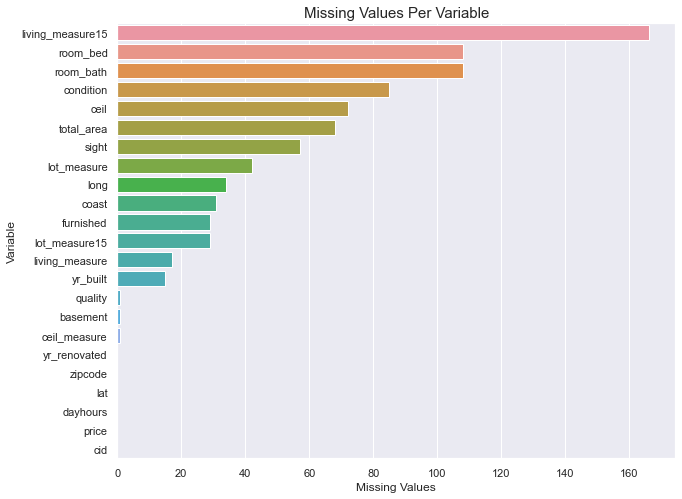

In [18]:
miss = df.isnull().sum().sort_values(ascending = False)
fig,axes = plt.subplots(figsize=(10,8))
sns.barplot(y = miss.index,x = miss.values,ci=0)
axes.set_xlabel("Missing Values")
axes.set_ylabel("Variable")
axes.set_title('Missing Values Per Variable',fontsize=15)

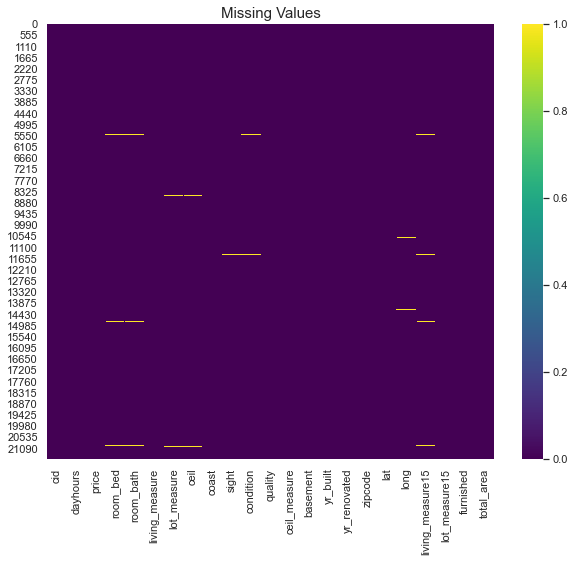

In [19]:
plt.subplots(figsize=(10,8))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Missing Values', fontsize=15)
plt.show()

Dropping the Null Values from above dataset. As there as nominal null values.

In [20]:
# Checking the number of rows that will get dropped if we drop the missing values
print('Number of rows to be dropped: {}'.format(df.shape[0]-df.dropna().shape[0]))
print('Percentage of rows to be dropped: {:.2f}%'.format((df.shape[0]-df.dropna().shape[0])*100/df.shape[0]))

Number of rows to be dropped: 325
Percentage of rows to be dropped: 1.50%


In [21]:
df.dropna(inplace=True)

In [22]:
df.shape

(21288, 23)

In [23]:
df.head(10)

cid         dayhours    price  room_bed  room_bath  living_measure  \
0   3876100940  20150427T000000   600000       4.0       1.75          3050.0   
1   3145600250  20150317T000000   190000       2.0       1.00           670.0   
2   7129303070  20140820T000000   735000       4.0       2.75          3040.0   
3   7338220280  20141010T000000   257000       3.0       2.50          1740.0   
4   7950300670  20150218T000000   450000       2.0       1.00          1120.0   
6    510002519  20140715T000000   466000       2.0       1.50          1140.0   
7   1624059224  20140618T000000  1160000       4.0       3.50          4680.0   
8   5469503280  20140721T000000   449950       4.0       2.50          3100.0   
9   2787460430  20141028T000000   299950       2.0       1.75          1460.0   
10  7853361370  20140502T000000   555000       4.0       2.50          3310.0   

    lot_measure  ceil  coast  sight  condition  quality  ceil_measure  \
0        9440.0   1.0    0.0    0.0        3.0      8.0        1800.0   
1        3101.0   1.0    0.0    0.0        4.0      6.0         670.0   
2        2415.0   2.0    1.0    4.0        3.0      8.0        3040.0   
3        3721.0   2.0    0.0    0.0        3.0      8.0        1740.0   
4        4590.0   1.0    0.0    0.0        3.0      7.0        1120.0   
6        1058.0   3.0    0.0    0.0        3.0      7.0        1140.0   
7        9700.0   2.0    0.0    0.0        3.0     10.0        3360.0   
8       10000.0   2.0    0.0    0.0        3.0      9.0        3100.0   
9       10506.0   1.0    0.0    0.0        3.0      7.0        1460.0   
10       6500.0   2.0    0.0    0.0        3.0      8.0        3310.0   

    basement  yr_built  yr_renovated  zipcode      lat     long  \
0     1250.0    1966.0             0    98034  47.7228 -122.183   
1        0.0    1948.0             0    98118  47.5546 -122.274   
2        0.0    1966.0             0    98118  47.5188 -122.256   
3        0.0    2009.0             0    98002  47.3363 -122.213   
4        0.0    1924.0             0    98118  47.5663 -122.285   
6        0.0    2005.0             0    98103  47.6608 -122.333   
7     1320.0    2005.0             0    98006  47.5703 -122.165   
8        0.0    1978.0             0    98042  47.3741 -122.150   
9        0.0    1983.0             0    98031  47.4048 -122.178   
10       0.0    2012.0             0    98065  47.5150 -121.870   

    living_measure15  lot_measure15  furnished  total_area  
0             2020.0         8660.0        0.0     12490.0  
1             1660.0         4100.0        0.0      3771.0  
2             2620.0         2433.0        0.0      5455.0  
3             2030.0         3794.0        0.0      5461.0  
4             1120.0         5100.0        0.0      5710.0  
6             1170.0         1116.0        0.0      2198.0  
7             2800.0        12343.0        1.0     14380.0  
8             1850.0         9438.0        1.0     13100.0  
9             1460.0         8153.0        0.0     11966.0  
10            2380.0         5000.0        0.0      9810.0

In [24]:
duplicate = df[df.duplicated()] 
duplicate

Empty DataFrame
Columns: [cid, dayhours, price, room_bed, room_bath, living_measure, lot_measure, ceil, coast, sight, condition, quality, ceil_measure, basement, yr_built, yr_renovated, zipcode, lat, long, living_measure15, lot_measure15, furnished, total_area]
Index: []

In [25]:
duplicate.shape

(0, 23)

Basis above we can see that there are no duplicated values in the dataset.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21288 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21288 non-null  int64  
 1   dayhours          21288 non-null  object 
 2   price             21288 non-null  int64  
 3   room_bed          21288 non-null  float64
 4   room_bath         21288 non-null  float64
 5   living_measure    21288 non-null  float64
 6   lot_measure       21288 non-null  float64
 7   ceil              21288 non-null  float64
 8   coast             21288 non-null  float64
 9   sight             21288 non-null  float64
 10  condition         21288 non-null  float64
 11  quality           21288 non-null  float64
 12  ceil_measure      21288 non-null  float64
 13  basement          21288 non-null  float64
 14  yr_built          21288 non-null  float64
 15  yr_renovated      21288 non-null  int64  
 16  zipcode           21288 non-null  int64 

In [27]:
df.describe().T

count          mean           std           min  \
cid               21288.0  4.577499e+09  2.876915e+09  1.000102e+06   
price             21288.0  5.399826e+05  3.656028e+05  7.500000e+04   
room_bed          21288.0  3.370678e+00  9.301225e-01  0.000000e+00   
room_bath         21288.0  2.114395e+00  7.686656e-01  0.000000e+00   
living_measure    21288.0  2.080089e+03  9.176964e+02  2.900000e+02   
lot_measure       21288.0  1.510815e+04  4.142870e+04  5.200000e+02   
ceil              21288.0  1.494927e+00  5.404853e-01  1.000000e+00   
coast             21288.0  7.468997e-03  8.610203e-02  0.000000e+00   
sight             21288.0  2.342165e-01  7.658749e-01  0.000000e+00   
condition         21288.0  3.409245e+00  6.505383e-01  1.000000e+00   
quality           21288.0  7.657976e+00  1.176386e+00  1.000000e+00   
ceil_measure      21288.0  1.788949e+03  8.275861e+02  2.900000e+02   
basement          21288.0  2.911401e+02  4.424759e+02  0.000000e+00   
yr_built          21288.0  1.971035e+03  2.938817e+01  1.900000e+03   
yr_renovated      21288.0  8.372177e+01  4.001276e+02  0.000000e+00   
zipcode           21288.0  9.807792e+04  5.351473e+01  9.800100e+04   
lat               21288.0  4.756000e+01  1.385784e-01  4.715590e+01   
long              21288.0 -1.222139e+02  1.408669e-01 -1.225190e+02   
living_measure15  21288.0  1.987143e+03  6.857953e+02  3.990000e+02   
lot_measure15     21288.0  1.276167e+04  2.725500e+04  6.510000e+02   
furnished         21288.0  1.970594e-01  3.977869e-01  0.000000e+00   
total_area        21288.0  1.718824e+04  4.159631e+04  1.423000e+03   

                           25%           50%           75%           max  
cid               2.122049e+09  3.904921e+09  7.305300e+09  9.900000e+09  
price             3.210202e+05  4.500000e+05  6.450000e+05  7.700000e+06  
room_bed          3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
room_bath         1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
living_measure    1.430000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
lot_measure       5.040000e+03  7.620000e+03  1.068250e+04  1.651359e+06  
ceil              1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
coast             0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
sight             0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition         3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
quality           7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
ceil_measure      1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
basement          0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built          1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated      0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode           9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat               4.747067e+01  4.757170e+01  4.767793e+01  4.777760e+01  
long             -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
living_measure15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
lot_measure15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05  
furnished         0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
total_area        7.037750e+03  9.580000e+03  1.299600e+04  1.652659e+06

### Feature Engineering

In [28]:
House_price = df.copy()

In [29]:
House_price.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000  600000       4.0       1.75          3050.0   
1  3145600250  20150317T000000  190000       2.0       1.00           670.0   
2  7129303070  20140820T000000  735000       4.0       2.75          3040.0   
3  7338220280  20141010T000000  257000       3.0       2.50          1740.0   
4  7950300670  20150218T000000  450000       2.0       1.00          1120.0   

   lot_measure  ceil  coast  sight  condition  quality  ceil_measure  \
0       9440.0   1.0    0.0    0.0        3.0      8.0        1800.0   
1       3101.0   1.0    0.0    0.0        4.0      6.0         670.0   
2       2415.0   2.0    1.0    4.0        3.0      8.0        3040.0   
3       3721.0   2.0    0.0    0.0        3.0      8.0        1740.0   
4       4590.0   1.0    0.0    0.0        3.0      7.0        1120.0   

   basement  yr_built  yr_renovated  zipcode      lat     long  \
0    1250.0    1966.0             0    98034  47.7228 -122.183   
1       0.0    1948.0             0    98118  47.5546 -122.274   
2       0.0    1966.0             0    98118  47.5188 -122.256   
3       0.0    2009.0             0    98002  47.3363 -122.213   
4       0.0    1924.0             0    98118  47.5663 -122.285   

   living_measure15  lot_measure15  furnished  total_area  
0            2020.0         8660.0        0.0     12490.0  
1            1660.0         4100.0        0.0      3771.0  
2            2620.0         2433.0        0.0      5455.0  
3            2030.0         3794.0        0.0      5461.0  
4            1120.0         5100.0        0.0      5710.0

In [30]:
House_price['dayhours']= [x.strip().replace('T000000','') for x in df.dayhours]

In [31]:
# House_price['dayhours'] = pd.to_datetime(House_price.dayhours)
#House_price.head(5)

In [32]:
House_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21288 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21288 non-null  int64  
 1   dayhours          21288 non-null  object 
 2   price             21288 non-null  int64  
 3   room_bed          21288 non-null  float64
 4   room_bath         21288 non-null  float64
 5   living_measure    21288 non-null  float64
 6   lot_measure       21288 non-null  float64
 7   ceil              21288 non-null  float64
 8   coast             21288 non-null  float64
 9   sight             21288 non-null  float64
 10  condition         21288 non-null  float64
 11  quality           21288 non-null  float64
 12  ceil_measure      21288 non-null  float64
 13  basement          21288 non-null  float64
 14  yr_built          21288 non-null  float64
 15  yr_renovated      21288 non-null  int64  
 16  zipcode           21288 non-null  int64 

In [33]:
# House_price['year_sold'] = House_price.dayhours.dt.year

In [34]:
House_price['having_basement'] = House_price['basement'].apply(lambda x: 0 if x==0 else 1)
House_price['Is_renovated'] = House_price['yr_renovated'].apply(lambda x: 0 if x==0 else 1)

In [35]:
# Calculating the Age of property at time of Sale accounting for renovation
House_price['Sale_Year'] = House_price['dayhours'].str[0:4]
House_price['Sale_Year'] = House_price['Sale_Year'].astype('int64')
House_price.head()

cid  dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940  20150427  600000       4.0       1.75          3050.0   
1  3145600250  20150317  190000       2.0       1.00           670.0   
2  7129303070  20140820  735000       4.0       2.75          3040.0   
3  7338220280  20141010  257000       3.0       2.50          1740.0   
4  7950300670  20150218  450000       2.0       1.00          1120.0   

   lot_measure  ceil  coast  sight  condition  quality  ceil_measure  \
0       9440.0   1.0    0.0    0.0        3.0      8.0        1800.0   
1       3101.0   1.0    0.0    0.0        4.0      6.0         670.0   
2       2415.0   2.0    1.0    4.0        3.0      8.0        3040.0   
3       3721.0   2.0    0.0    0.0        3.0      8.0        1740.0   
4       4590.0   1.0    0.0    0.0        3.0      7.0        1120.0   

   basement  yr_built  yr_renovated  zipcode      lat     long  \
0    1250.0    1966.0             0    98034  47.7228 -122.183   
1       0.0    1948.0             0    98118  47.5546 -122.274   
2       0.0    1966.0             0    98118  47.5188 -122.256   
3       0.0    2009.0             0    98002  47.3363 -122.213   
4       0.0    1924.0             0    98118  47.5663 -122.285   

   living_measure15  lot_measure15  furnished  total_area  having_basement  \
0            2020.0         8660.0        0.0     12490.0                1   
1            1660.0         4100.0        0.0      3771.0                0   
2            2620.0         2433.0        0.0      5455.0                0   
3            2030.0         3794.0        0.0      5461.0                0   
4            1120.0         5100.0        0.0      5710.0                0   

   Is_renovated  Sale_Year  
0             0       2015  
1             0       2015  
2             0       2014  
3             0       2014  
4             0       2015

In [36]:
A = House_price[House_price['yr_renovated'] ==0].copy()
B = House_price[House_price['yr_renovated'] !=0].copy()
A['AGE_AT_SALE'] = A['Sale_Year']-A['yr_built']
B['AGE_AT_SALE'] = B['Sale_Year']-B['yr_renovated']
House_price=pd.concat([A,B],axis=0)

In [37]:
House_price.head()

cid  dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940  20150427  600000       4.0       1.75          3050.0   
1  3145600250  20150317  190000       2.0       1.00           670.0   
2  7129303070  20140820  735000       4.0       2.75          3040.0   
3  7338220280  20141010  257000       3.0       2.50          1740.0   
4  7950300670  20150218  450000       2.0       1.00          1120.0   

   lot_measure  ceil  coast  sight  condition  quality  ceil_measure  \
0       9440.0   1.0    0.0    0.0        3.0      8.0        1800.0   
1       3101.0   1.0    0.0    0.0        4.0      6.0         670.0   
2       2415.0   2.0    1.0    4.0        3.0      8.0        3040.0   
3       3721.0   2.0    0.0    0.0        3.0      8.0        1740.0   
4       4590.0   1.0    0.0    0.0        3.0      7.0        1120.0   

   basement  yr_built  yr_renovated  zipcode      lat     long  \
0    1250.0    1966.0             0    98034  47.7228 -122.183   
1       0.0    1948.0             0    98118  47.5546 -122.274   
2       0.0    1966.0             0    98118  47.5188 -122.256   
3       0.0    2009.0             0    98002  47.3363 -122.213   
4       0.0    1924.0             0    98118  47.5663 -122.285   

   living_measure15  lot_measure15  furnished  total_area  having_basement  \
0            2020.0         8660.0        0.0     12490.0                1   
1            1660.0         4100.0        0.0      3771.0                0   
2            2620.0         2433.0        0.0      5455.0                0   
3            2030.0         3794.0        0.0      5461.0                0   
4            1120.0         5100.0        0.0      5710.0                0   

   Is_renovated  Sale_Year  AGE_AT_SALE  
0             0       2015         49.0  
1             0       2015         67.0  
2             0       2014         48.0  
3             0       2014          5.0  
4             0       2015         91.0

In the above piece of code we have combined the variables <font color = 'blue'>__Sale_Year__</font>,<font color = 'blue'>__yr_built__</font> and <font color = 'blue'>__yr_renovated__</font>, to calculate the effective age of the property(<font color = 'blue'>__AGE_AT_SALE__</font>) when sold.

In [39]:
# Areas 
A = House_price[House_price['Sale_Year']==2014].copy()
A.drop(['living_measure15','lot_measure15'],axis=1,inplace=True)
A.head()

cid  dayhours    price  room_bed  room_bath  living_measure  \
2  7129303070  20140820   735000       4.0       2.75          3040.0   
3  7338220280  20141010   257000       3.0       2.50          1740.0   
6   510002519  20140715   466000       2.0       1.50          1140.0   
7  1624059224  20140618  1160000       4.0       3.50          4680.0   
8  5469503280  20140721   449950       4.0       2.50          3100.0   

   lot_measure  ceil  coast  sight  condition  quality  ceil_measure  \
2       2415.0   2.0    1.0    4.0        3.0      8.0        3040.0   
3       3721.0   2.0    0.0    0.0        3.0      8.0        1740.0   
6       1058.0   3.0    0.0    0.0        3.0      7.0        1140.0   
7       9700.0   2.0    0.0    0.0        3.0     10.0        3360.0   
8      10000.0   2.0    0.0    0.0        3.0      9.0        3100.0   

   basement  yr_built  yr_renovated  zipcode      lat     long  furnished  \
2       0.0    1966.0             0    98118  47.5188 -122.256        0.0   
3       0.0    2009.0             0    98002  47.3363 -122.213        0.0   
6       0.0    2005.0             0    98103  47.6608 -122.333        0.0   
7    1320.0    2005.0             0    98006  47.5703 -122.165        1.0   
8       0.0    1978.0             0    98042  47.3741 -122.150        1.0   

   total_area  having_basement  Is_renovated  Sale_Year  AGE_AT_SALE  
2      5455.0                0             0       2014         48.0  
3      5461.0                0             0       2014          5.0  
6      2198.0                0             0       2014          9.0  
7     14380.0                1             0       2014          9.0  
8     13100.0                0             0       2014         36.0

In [40]:
B = House_price[House_price['Sale_Year']!=2014].copy()
B['total_area'] = B['living_measure15']+B['lot_measure15']
B['ceil_measure_perc'] = B['ceil_measure']/B['living_measure']
B['basement_perc'] = B['basement']/B['living_measure']
B['ceil_measure'] = B['ceil_measure_perc']*B['living_measure15']
B['basement'] = B['basement_perc']*B['living_measure15']
B['living_measure'] = B['living_measure15']
B['lot_measure'] = B['lot_measure15']
B.drop(['lot_measure15','living_measure15','ceil_measure_perc', 'basement_perc'],axis=1,inplace=True)
B.head()

cid  dayhours   price  room_bed  room_bath  living_measure  \
0   3876100940  20150427  600000       4.0       1.75          2020.0   
1   3145600250  20150317  190000       2.0       1.00          1660.0   
4   7950300670  20150218  450000       2.0       1.00          1120.0   
11   809001070  20150123  550000       3.0       1.00          1880.0   
13  1311800130  20150123  162500       3.0       1.50          1390.0   

    lot_measure  ceil  coast  sight  condition  quality  ceil_measure  \
0        8660.0   1.0    0.0    0.0        3.0      8.0   1192.131148   
1        4100.0   1.0    0.0    0.0        4.0      6.0   1660.000000   
4        5100.0   1.0    0.0    0.0        3.0      7.0   1120.000000   
11       3600.0   1.5    0.0    0.0        3.0      8.0   1880.000000   
13       7665.0   1.0    0.0    0.0        3.0      7.0   1390.000000   

      basement  yr_built  yr_renovated  zipcode      lat     long  furnished  \
0   827.868852    1966.0             0    98034  47.7228 -122.183        0.0   
1     0.000000    1948.0             0    98118  47.5546 -122.274        0.0   
4     0.000000    1924.0             0    98118  47.5663 -122.285        0.0   
11    0.000000    1912.0             0    98109  47.6347 -122.352        0.0   
13    0.000000    1967.0             0    98001  47.3369 -122.275        0.0   

    total_area  having_basement  Is_renovated  Sale_Year  AGE_AT_SALE  
0      10680.0                1             0       2015         49.0  
1       5760.0                0             0       2015         67.0  
4       6220.0                0             0       2015         91.0  
11      5480.0                0             0       2015        103.0  
13      9055.0                0             0       2015         48.0

In [41]:
House_price = pd.concat([A,B],axis=0)
House_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21288 entries, 2 to 21573
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cid              21288 non-null  int64  
 1   dayhours         21288 non-null  object 
 2   price            21288 non-null  int64  
 3   room_bed         21288 non-null  float64
 4   room_bath        21288 non-null  float64
 5   living_measure   21288 non-null  float64
 6   lot_measure      21288 non-null  float64
 7   ceil             21288 non-null  float64
 8   coast            21288 non-null  float64
 9   sight            21288 non-null  float64
 10  condition        21288 non-null  float64
 11  quality          21288 non-null  float64
 12  ceil_measure     21288 non-null  float64
 13  basement         21288 non-null  float64
 14  yr_built         21288 non-null  float64
 15  yr_renovated     21288 non-null  int64  
 16  zipcode          21288 non-null  int64  
 17  lat         

In [46]:
House_price.head()

cid  dayhours    price  room_bed  room_bath  living_measure  \
2  7129303070  20140820   735000       4.0       2.75          3040.0   
3  7338220280  20141010   257000       3.0       2.50          1740.0   
6   510002519  20140715   466000       2.0       1.50          1140.0   
7  1624059224  20140618  1160000       4.0       3.50          4680.0   
8  5469503280  20140721   449950       4.0       2.50          3100.0   

   lot_measure  ceil  coast  sight  condition  quality  ceil_measure  \
2       2415.0   2.0    1.0    4.0        3.0      8.0        3040.0   
3       3721.0   2.0    0.0    0.0        3.0      8.0        1740.0   
6       1058.0   3.0    0.0    0.0        3.0      7.0        1140.0   
7       9700.0   2.0    0.0    0.0        3.0     10.0        3360.0   
8      10000.0   2.0    0.0    0.0        3.0      9.0        3100.0   

   basement  yr_built  yr_renovated  zipcode      lat     long  furnished  \
2       0.0    1966.0             0    98118  47.5188 -122.256        0.0   
3       0.0    2009.0             0    98002  47.3363 -122.213        0.0   
6       0.0    2005.0             0    98103  47.6608 -122.333        0.0   
7    1320.0    2005.0             0    98006  47.5703 -122.165        1.0   
8       0.0    1978.0             0    98042  47.3741 -122.150        1.0   

   total_area  having_basement  Is_renovated  Sale_Year  AGE_AT_SALE  \
2      5455.0                0             0       2014         48.0   
3      5461.0                0             0       2014          5.0   
6      2198.0                0             0       2014          9.0   
7     14380.0                1             0       2014          9.0   
8     13100.0                0             0       2014         36.0   

   PRICE_PER_LA  MED_PRICE_ZIP  OVERPRICED  
2    241.776316       367500.0           1  
3    147.701149       235000.0           1  
6    408.771930       550000.0           0  
7    247.863248       762684.5           1  
8    145.145161       292500.0           1

In [47]:
House_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21288 entries, 2 to 21573
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cid              21288 non-null  int64  
 1   dayhours         21288 non-null  object 
 2   price            21288 non-null  int64  
 3   room_bed         21288 non-null  float64
 4   room_bath        21288 non-null  float64
 5   living_measure   21288 non-null  float64
 6   lot_measure      21288 non-null  float64
 7   ceil             21288 non-null  float64
 8   coast            21288 non-null  float64
 9   sight            21288 non-null  float64
 10  condition        21288 non-null  float64
 11  quality          21288 non-null  float64
 12  ceil_measure     21288 non-null  float64
 13  basement         21288 non-null  float64
 14  yr_built         21288 non-null  float64
 15  yr_renovated     21288 non-null  int64  
 16  zipcode          21288 non-null  int64  
 17  lat         

## Exploratory Data Analysis

In this section, we will explore the data using visualizations. This will allow us to understand the data and the relationships between variables better, which will help us build a better model.

Target Variable Distribution
Our dataset contains a lot of variables, but the most important one for us to explore is the target variable. We need to understand its distribution.

### Target Variable Distribution

Text(0.5, 0.98, 'Price Variable Anaylsis')

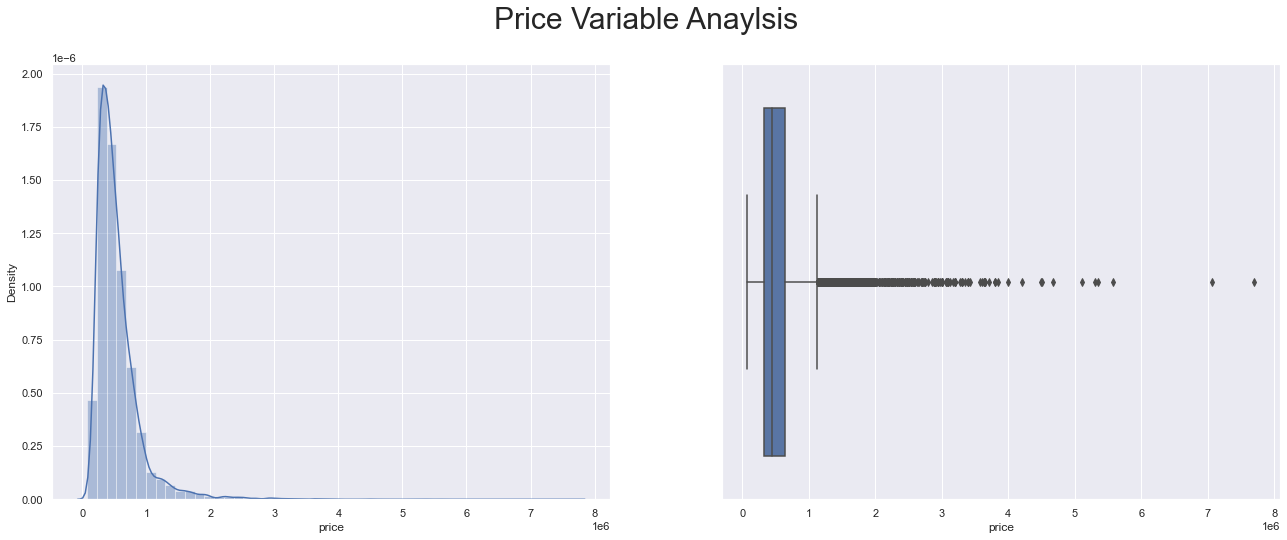

In [48]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(House_price['price'], ax=ax[0])
sns.boxplot(House_price['price'],  orient='h', ax=ax[1])
fig.suptitle("Price Variable Anaylsis", size=30)

## Let's do some visual data analysis of the features

### Univariate Analysis - By BoxPlot

#### Analyzing Feature: cid

In [49]:
cid_count=House_price.cid.value_counts()
cid_count[cid_count>1].shape

(174,)

In [50]:
cid_count.unique()

array([3, 2, 1], dtype=int64)

We have 174 properties that were sold more than once in the given data

####  Analyzing Feature: dayhours

In [51]:
House_price=House_price.copy()
House_price.dayhours=pd.to_datetime(House_price.dayhours,format='%Y%m%d')
House_price['month_year']=House_price['dayhours'].apply(lambda x: x.strftime('%B-%Y'))
House_price['month_year'].head()

2     August-2014
3    October-2014
6       July-2014
7       June-2014
8       July-2014
Name: month_year, dtype: object

In [52]:
House_price['month_year'].value_counts()

April-2015        2195
July-2014         2177
June-2014         2145
August-2014       1909
October-2014      1846
March-2015        1846
May-2014          1755
September-2014    1744
December-2014     1448
November-2014     1387
February-2015     1235
January-2015       962
May-2015           639
Name: month_year, dtype: int64

We can see, most houses sold in April, July month.

So the time line of the sale data of the properties is from May-2014 to May-2015 and April month have the highest mean price.

In [53]:
House_price.groupby(['month_year'])['price'].agg('mean')

month_year
April-2015        560721.528929
August-2014       537194.398638
December-2014     525351.143646
February-2015     507562.736032
January-2015      526653.388773
July-2014         544703.648599
June-2014         558507.773893
March-2015        544761.888407
May-2014          547862.734473
May-2015          556905.774648
November-2014     520576.167267
October-2014      540643.094800
September-2014    526258.572248
Name: price, dtype: float64

#### Analyzing Feature: Price (Target Variable)

As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

Text(0.5, 0.98, 'Price Variable Anaylsis')

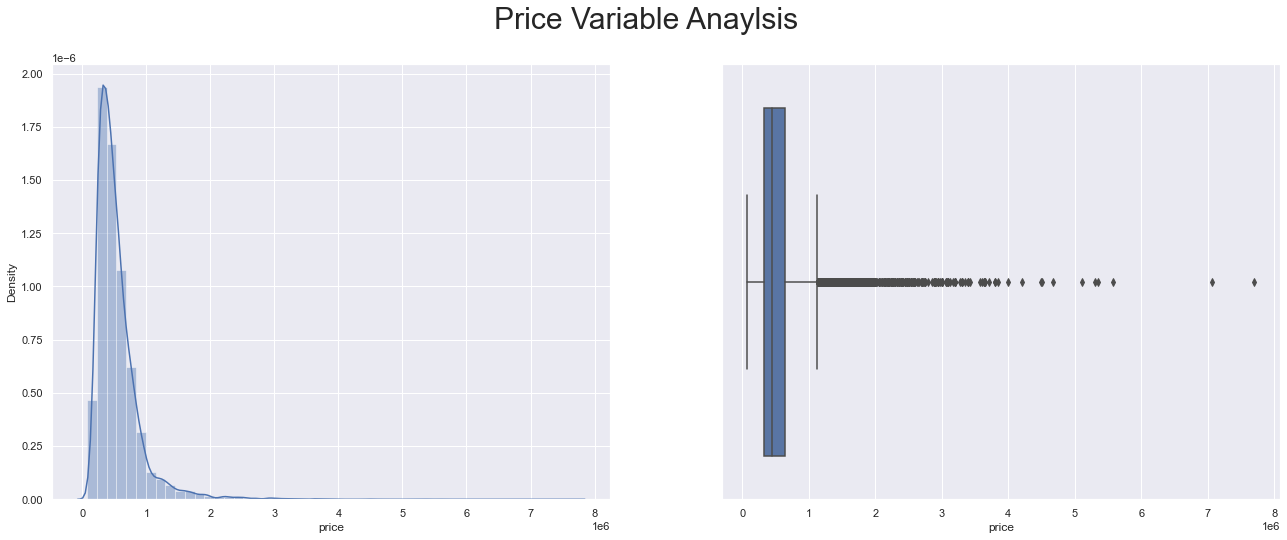

In [54]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(House_price['price'], ax=ax[0])
sns.boxplot(House_price['price'],  orient='h', ax=ax[1])
fig.suptitle("Price Variable Anaylsis", size=30)

The Price Variable distribution seems to be right-skewed.

In [55]:
House_price.price.describe()

count    2.128800e+04
mean     5.399826e+05
std      3.656028e+05
min      7.500000e+04
25%      3.210202e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [56]:
#Let's look at the distribution of price at different percentiles
print("0.5% properties have a price lower than {0: .2f}".format(np.percentile(House_price["price"], 0.5)))
print("  1% properties have a price lower than {0: .2f}".format(np.percentile(House_price["price"], 1)))
print("  5% properties have a price lower than {0: .2f}".format(np.percentile(House_price["price"], 5)))
print(" 10% properties have a price lower than {0: .2f}".format(np.percentile(House_price["price"], 10)))
print(" 90% properties have a price lower than {0: .2f}".format(np.percentile(House_price["price"], 90)))
print(" 95% properties have a price lower than {0: .2f}".format(np.percentile(House_price["price"], 95)))
print(" 99% properties have a price lower than {0: .2f}".format(np.percentile(House_price["price"], 99)))
print("99.5% properties have a price lower than {0: .2f}".format(np.percentile(House_price["price"], 99.5)))

0.5% properties have a price lower than  134435.00
  1% properties have a price lower than  153935.39
  5% properties have a price lower than  210000.00
 10% properties have a price lower than  245000.00
 90% properties have a price lower than  887325.00
 95% properties have a price lower than  1160000.00
 99% properties have a price lower than  1970000.00
99.5% properties have a price lower than  2455650.00


#### Analyzing Feature: room_bed

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

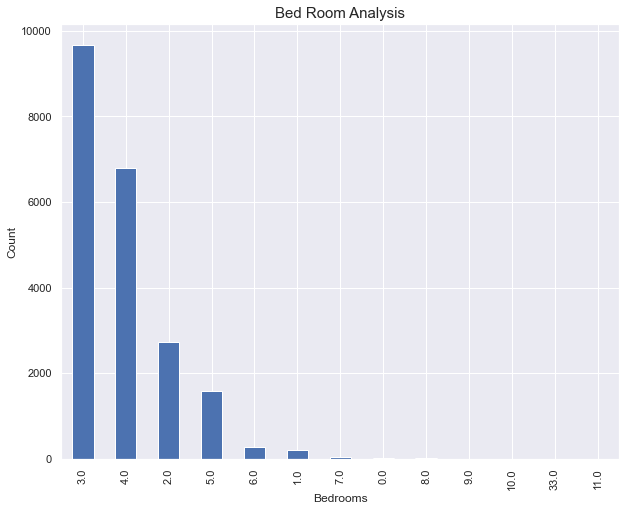

In [57]:
plt.figure(figsize=(10,8))
House_price['room_bed'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.title("Bed Room Analysis", size=15)
sns.despine

In [58]:
House_price['room_bed'].value_counts()

3.0     9672
4.0     6783
2.0     2720
5.0     1577
6.0      266
1.0      196
7.0       38
0.0       13
8.0       12
9.0        6
10.0       3
33.0       1
11.0       1
Name: room_bed, dtype: int64

The value of 33 seems to be outlier we need to check the data point before imputing the same

#### Analyzing Feature: room_bath

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

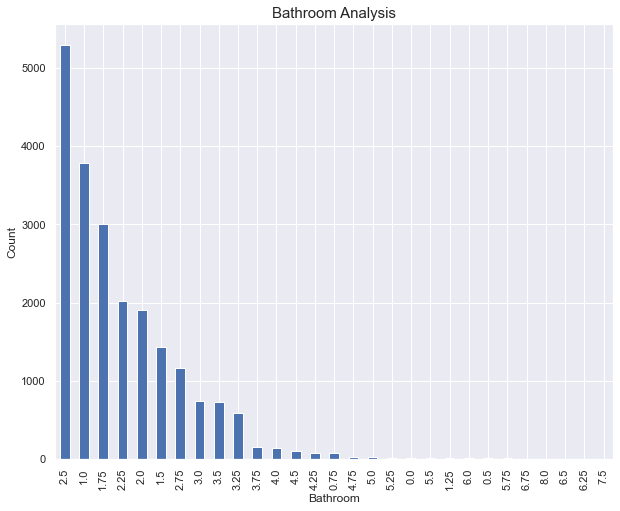

In [59]:
plt.figure(figsize=(10,8))
House_price['room_bath'].value_counts().plot(kind='bar')
plt.title('number of Bathroom')
plt.xlabel('Bathroom')
plt.ylabel('Count')
plt.title("Bathroom Analysis", size=15)
sns.despine

In [60]:
House_price[House_price['room_bath']>6]

cid   dayhours    price  room_bed  room_bath  living_measure  \
1222   9175600025 2014-10-07   800000       7.0       6.75          7480.0   
5928    424049043 2014-08-11   450000       9.0       7.50          4050.0   
7928   1225069038 2014-05-05  2280000       7.0       8.00         13540.0   
14364  2524069097 2014-05-09  2240000       5.0       6.50          7270.0   
20746  6072800246 2014-07-02  3300000       5.0       6.25          8020.0   
1068   6762700020 2014-10-13  7700000       6.0       8.00         12050.0   
1245   1924059029 2014-06-17  4670000       5.0       6.75          9640.0   
20193  2303900035 2014-06-11  2890000       5.0       6.25          8670.0   
9132    424069279 2015-03-28  1180000       6.0       6.50          2710.0   

       lot_measure  ceil  coast  sight  condition  quality  ceil_measure  \
1222       41664.0   2.0    0.0    2.0        3.0     11.0   5080.000000   
5928        6504.0   2.0    0.0    0.0        3.0      7.0   4050.000000   
7928      307752.0   3.0    0.0    4.0        3.0     12.0   9410.000000   
14364     130017.0   2.0    0.0    0.0        3.0     12.0   6420.000000   
20746      21738.0   2.0    0.0    0.0        3.0     11.0   8020.000000   
1068       27600.0   2.5    0.0    3.0        4.0     13.0   8570.000000   
1245       13068.0   1.0    1.0    4.0        3.0     12.0   4820.000000   
20193      64033.0   2.0    0.0    4.0        3.0     13.0   6120.000000   
9132       12550.0   2.0    0.0    0.0        3.0     11.0   2095.271565   

          basement  yr_built  yr_renovated  zipcode      lat     long  \
1222   2400.000000    1953.0             0    98166  47.4643 -122.368   
5928      0.000000    1996.0             0    98144  47.5923 -122.301   
7928   4130.000000    1999.0             0    98053  47.6675 -121.986   
14364   850.000000    2010.0             0    98027  47.5371 -121.982   
20746     0.000000    2001.0             0    98006  47.5675 -122.189   
1068   3480.000000    1910.0          1987    98102  47.6298 -122.323   
1245   4820.000000    1983.0          2009    98040  47.5570 -122.210   
20193  2550.000000    1965.0          2003    98177  47.7295 -122.372   
9132    614.728435    2007.0             0    98075  47.5947 -122.039   

       furnished  total_area  having_basement  Is_renovated  Sale_Year  \
1222         1.0     49144.0                1             0       2014   
5928         0.0     10554.0                0             0       2014   
7928         1.0    321292.0                1             0       2014   
14364        1.0    137287.0                1             0       2014   
20746        1.0     29758.0                0             0       2014   
1068         1.0     39650.0                1             1       2014   
1245         1.0     22708.0                1             1       2014   
20193        1.0     72703.0                1             1       2014   
9132         1.0     15260.0                1             0       2015   

       AGE_AT_SALE  PRICE_PER_LA  MED_PRICE_ZIP  OVERPRICED    month_year  
1222          61.0    106.951872       390000.0           1  October-2014  
5928          18.0    111.111111       450000.0           0   August-2014  
7928          15.0    168.389956       635000.0           1      May-2014  
14364          4.0    308.115543       568750.0           1      May-2014  
20746         13.0    411.471322       762684.5           1     July-2014  
1068          27.0    639.004149       720000.0           1  October-2014  
1245           5.0    484.439834       994000.0           1     June-2014  
20193         11.0    333.333333       550250.0           1     June-2014  
9132           8.0    435.424354       742000.0           1    March-2015

#### Analyzing Feature: Living measure

In [61]:
print("Skewness is :",House_price.living_measure.skew())

Skewness is : 1.5439314992606636


Text(0.5, 0.98, 'Living measure Variable Anaylsis')

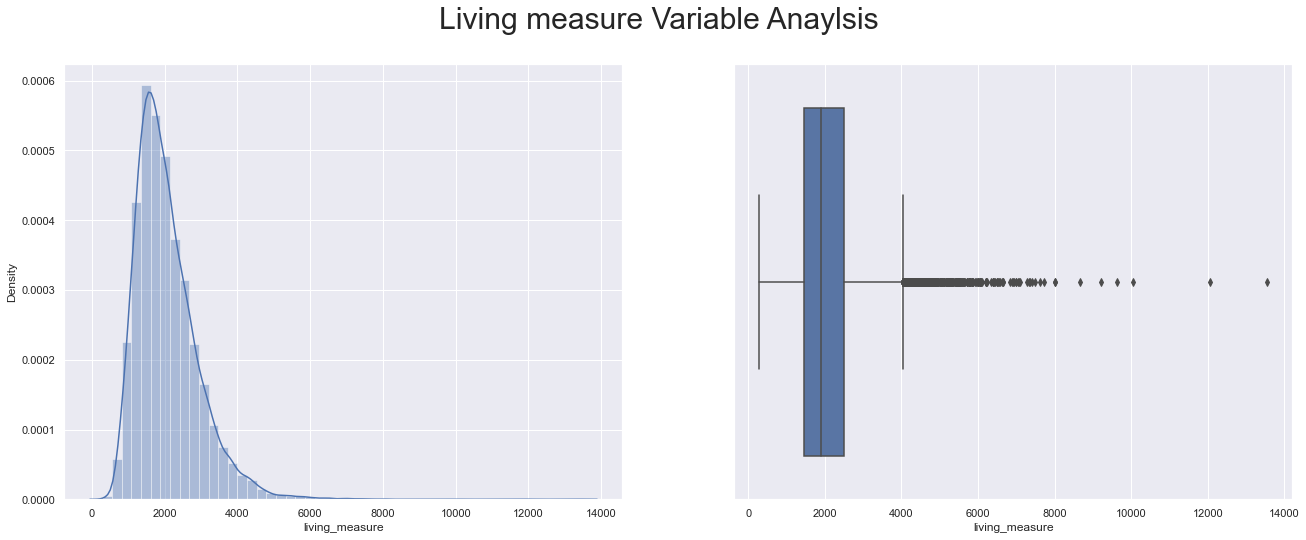

In [62]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(House_price['living_measure'], ax=ax[0])
sns.boxplot(House_price['living_measure'],  orient='h', ax=ax[1])
fig.suptitle("Living measure Variable Anaylsis", size=30)


In [63]:
House_price.living_measure.describe()

count    21288.000000
mean      2055.298102
std        856.061054
min        290.000000
25%       1460.000000
50%       1890.000000
75%       2490.000000
max      13540.000000
Name: living_measure, dtype: float64



Data distribution tells us, living_measure is right-skewed. There are many outliers in living_measure. Need to review further to treat the same.

#### Analyzing Feature: lot_measure

In [64]:
print("Skewness is :",House_price.lot_measure.skew())

Skewness is : 10.891107755980261


Text(0.5, 0.98, 'lot measure Variable Anaylsis')

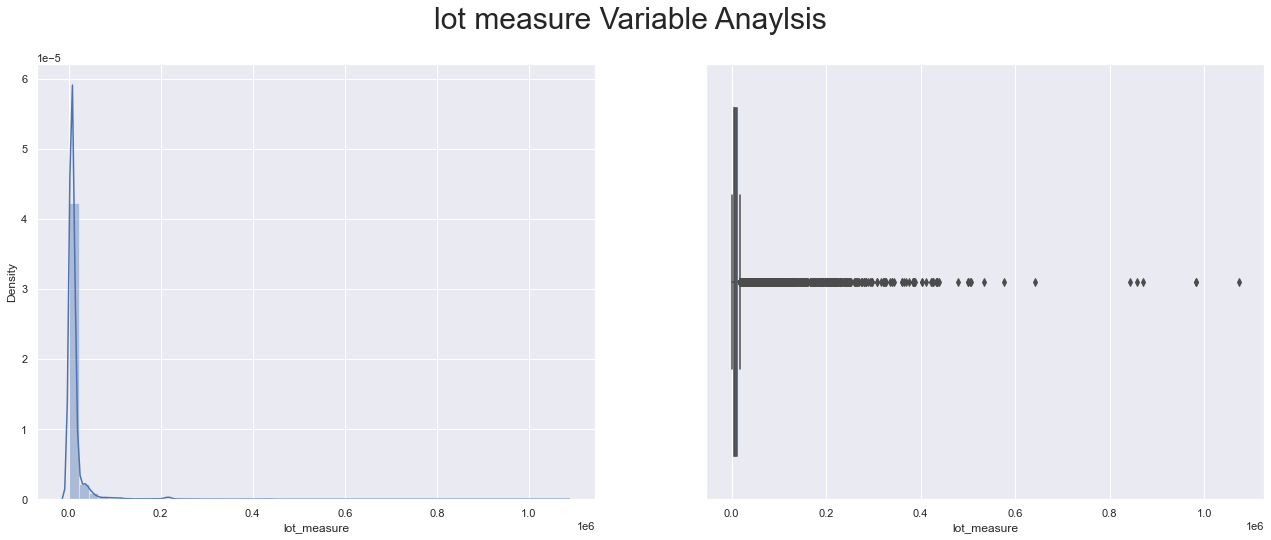

In [65]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(House_price['lot_measure'], ax=ax[0])
sns.boxplot(House_price['lot_measure'],  orient='h', ax=ax[1])
fig.suptitle("lot measure Variable Anaylsis", size=30)


In [66]:
House_price.lot_measure.describe()

count    2.128800e+04
mean     1.424296e+04
std      3.514723e+04
min      5.200000e+02
25%      5.086000e+03
50%      7.628000e+03
75%      1.045000e+04
max      1.074218e+06
Name: lot_measure, dtype: float64

There are many outliers in lot_measure. Need to review further to treat the same.

####  Analyzing Feature: ceil

In [67]:
House_price.ceil.value_counts()

1.0    10511
2.0     8116
1.5     1884
3.0      609
2.5      160
3.5        8
Name: ceil, dtype: int64

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

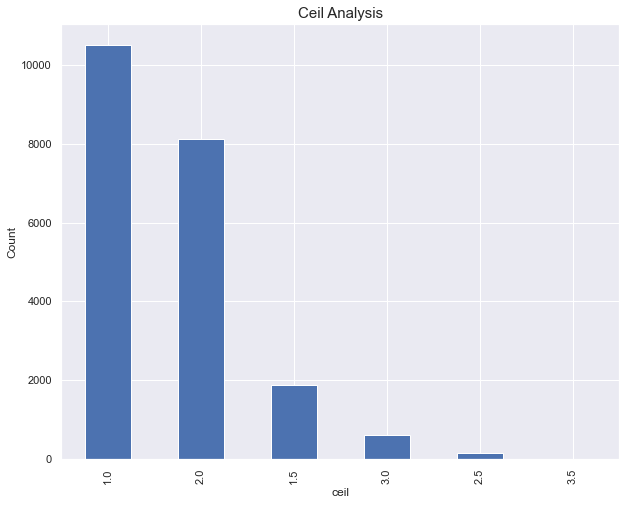

In [68]:
plt.figure(figsize=(10,8))
House_price['ceil'].value_counts().plot(kind='bar')
plt.title('ceil')
plt.xlabel('ceil')
plt.ylabel('Count')
plt.title("Ceil Analysis", size=15)
sns.despine

Basis above graph we can say that most properties have 1 and 2 floors

#### Analyzing Feature: coast

In [69]:
House_price.coast.value_counts()

0.0    21129
1.0      159
Name: coast, dtype: int64

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

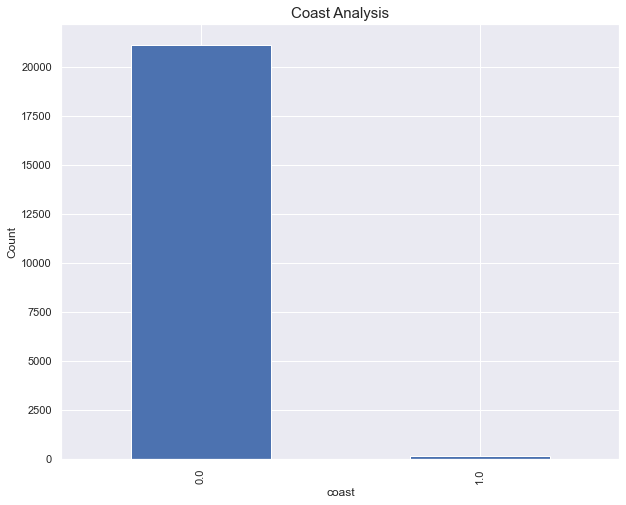

In [70]:
plt.figure(figsize=(10,8))
House_price['coast'].value_counts().plot(kind='bar')
plt.title('coast')
plt.xlabel('coast')
plt.ylabel('Count')
plt.title("Coast Analysis", size=15)
sns.despine

Most of the houses have non waterfall view.

#### Analyzing Feature: sight

In [71]:
House_price.sight.value_counts()

0.0    19194
2.0      950
3.0      500
1.0      330
4.0      314
Name: sight, dtype: int64

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

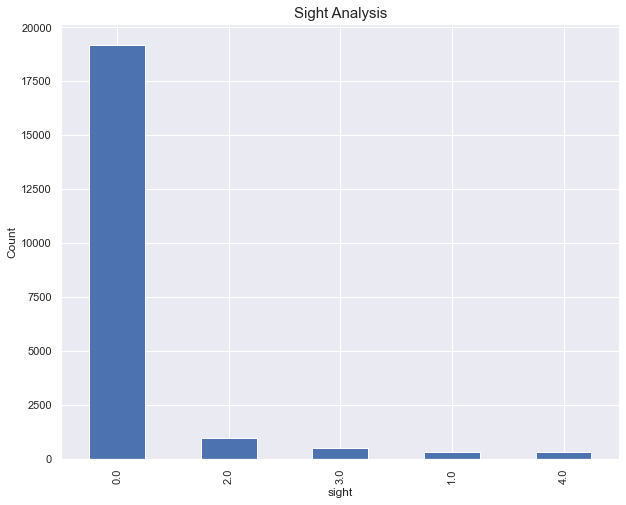

In [72]:
plt.figure(figsize=(10,8))
House_price['sight'].value_counts().plot(kind='bar')
plt.title('sight')
plt.xlabel('sight')
plt.ylabel('Count')
plt.title("Sight Analysis", size=15)
sns.despine

Most of houses are transacted without veiw the property.

#### Analyzing Feature: condition

In [73]:
House_price.condition.value_counts()

3.0    13820
4.0     5595
5.0     1673
2.0      171
1.0       29
Name: condition, dtype: int64

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

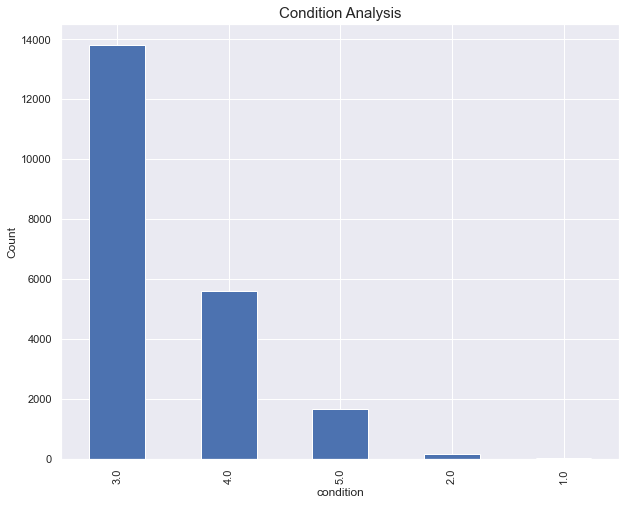

In [74]:
plt.figure(figsize=(10,8))
House_price['condition'].value_counts().plot(kind='bar')
plt.title('condition')
plt.xlabel('condition')
plt.ylabel('Count')
plt.title("Condition Analysis", size=15)
sns.despine


Basis Graph we can say that most of house are average maintained.

#### Analyzing Feature: quality

In [75]:
House_price.quality.value_counts()

7.0     8835
8.0     5979
9.0     2575
6.0     2007
10.0    1126
11.0     392
5.0      239
12.0      90
4.0       29
13.0      12
3.0        3
1.0        1
Name: quality, dtype: int64

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

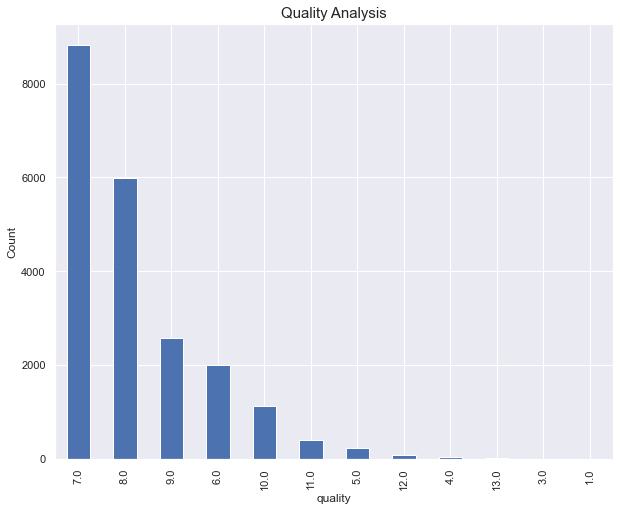

In [76]:
plt.figure(figsize=(10,8))
House_price['quality'].value_counts().plot(kind='bar')
plt.title('quality')
plt.xlabel('quality')
plt.ylabel('Count')
plt.title("Quality Analysis", size=15)
sns.despine

In [77]:
#checking the no. of data points with quality rating as 13
House_price[House_price['quality']>10]

cid   dayhours    price  room_bed  room_bath  living_measure  \
88     3627800050 2014-07-15  1380000       5.0       4.00          3760.0   
125    9477580110 2014-06-26   971971       4.0       3.75          3460.0   
134    4141000060 2014-12-05  1230000       4.0       2.50          3180.0   
178    3023069166 2014-07-08  1140000       5.0       4.00          7320.0   
184    3225079035 2014-06-18  1600000       6.0       5.00          6050.0   
...           ...        ...      ...       ...        ...             ...   
9931   1118000320 2015-05-08  3400000       4.0       4.00          4260.0   
14843  7960900060 2015-05-04  2900000       4.0       3.25          3890.0   
15616  9272200090 2015-02-04  1600000       4.0       4.50          2660.0   
18197  3126059027 2015-03-18  2650000       4.0       3.50          3210.0   
20043  3761700053 2015-01-05  2150000       3.0       2.75          4130.0   

       lot_measure  ceil  coast  sight  condition  quality  ceil_measure  \
88         22763.0   1.0    0.0    3.0        4.0     11.0   1910.000000   
125         6738.0   2.0    0.0    0.0        3.0     11.0   3460.000000   
134        10319.0   2.0    0.0    0.0        4.0     11.0   3180.000000   
178       217800.0   2.0    0.0    0.0        3.0     11.0   7320.000000   
184       230652.0   2.0    0.0    3.0        3.0     11.0   6050.000000   
...            ...   ...    ...    ...        ...      ...           ...   
9931       10408.0   2.0    0.0    0.0        3.0     11.0   3280.000000   
14843      20060.0   1.5    0.0    2.0        3.0     11.0   3658.910891   
15616       6000.0   2.0    0.0    4.0        4.0     11.0   1949.259259   
18197      15306.0   2.0    0.0    3.0        3.0     11.0   2390.425532   
20043      11875.0   3.0    1.0    4.0        3.0     11.0   4130.000000   

          basement  yr_built  yr_renovated  zipcode      lat     long  \
88     1850.000000    1969.0             0    98040  47.5333 -122.220   
125       0.000000    2013.0             0    98059  47.5060 -122.145   
134       0.000000    1986.0             0    98040  47.5372 -122.232   
178       0.000000    1992.0             0    98058  47.4473 -122.086   
184       0.000000    2001.0             0    98024  47.6033 -121.943   
...            ...       ...           ...      ...      ...      ...   
9931    980.000000    1939.0          2010    98112  47.6380 -122.288   
14843   231.089109    1982.0          2008    98004  47.6312 -122.223   
15616   710.740741    1910.0          1977    98116  47.5922 -122.388   
18197   819.574468    1958.0          1995    98033  47.6899 -122.217   
20043     0.000000    1989.0          2000    98034  47.7205 -122.260   

       furnished  total_area  having_basement  Is_renovated  Sale_Year  \
88           1.0     26523.0                1             0       2014   
125          1.0     10198.0                0             0       2014   
134          1.0     13499.0                0             0       2014   
178          1.0    225120.0                0             0       2014   
184          1.0    236702.0                0             0       2014   
...          ...         ...              ...           ...        ...   
9931         1.0     14668.0                1             1       2015   
14843        1.0     23950.0                1             1       2015   
15616        1.0      8660.0                1             1       2015   
18197        1.0     18516.0                1             1       2015   
20043        1.0     16005.0                0             1       2015   

       AGE_AT_SALE  PRICE_PER_LA  MED_PRICE_ZIP  OVERPRICED     month_year  
88            45.0    367.021277       994000.0           1      July-2014  
125            1.0    280.916474       435000.0           1      June-2014  
134           28.0    386.792453       994000.0           1  December-2014  
178           22.0    155.737705       334975.0           1      July-2014  
184          

There are only 494 propeties which have the highest quality rating Greater than 10. 

#### Analyzing Feature: ceil_measure

In [78]:
print("Skewness is :", House_price.ceil_measure.skew())

Skewness is : 1.3924703613147729


Text(0.5, 0.98, 'ceil_measure Variable Anaylsis')

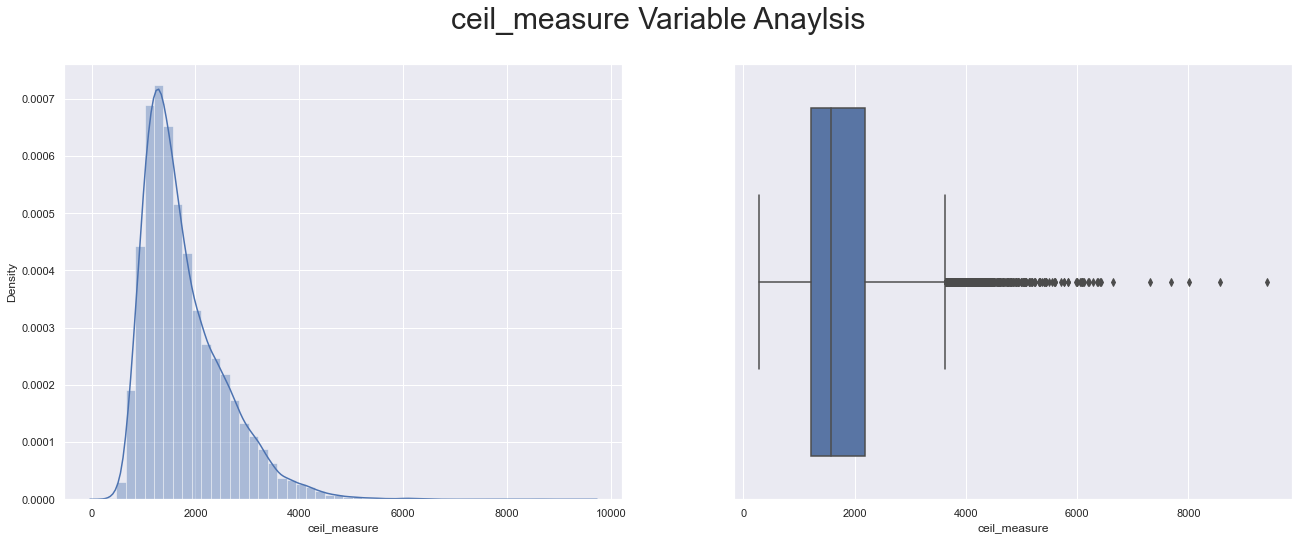

In [79]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(House_price['ceil_measure'], ax=ax[0])
sns.boxplot(House_price['ceil_measure'],  orient='h', ax=ax[1])
fig.suptitle("ceil_measure Variable Anaylsis", size=30)


The ceil_measure varaible seems to be Right skewed.

In [80]:
House_price.ceil_measure.describe()

count    21288.000000
mean      1775.542059
std        788.712008
min        290.000000
25%       1210.000000
50%       1570.000000
75%       2180.000000
max       9410.000000
Name: ceil_measure, dtype: float64

#### Analyzing Feature: basement

Text(0.5, 0.98, 'basement Variable Anaylsis')

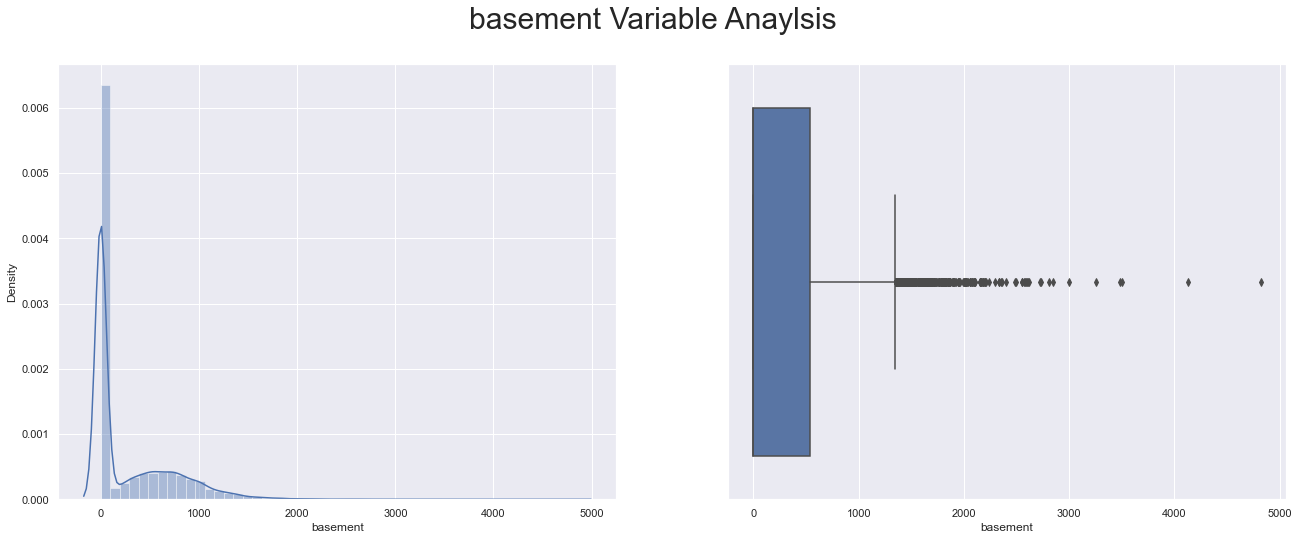

In [81]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(House_price['basement'], ax=ax[0])
sns.boxplot(House_price['basement'],  orient='h', ax=ax[1])
fig.suptitle("basement Variable Anaylsis", size=30)

In [82]:

House_price[House_price.basement==0].shape

(12945, 29)

In [83]:

House_price[House_price.basement>0].shape

(8343, 29)

We have most of properties without basement. Also We can clearly see, there are outliers. Need to check.

#### Analyzing Feature: having_basement


In [85]:
House_price.having_basement.value_counts()

0    12945
1     8343
Name: having_basement, dtype: int64

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

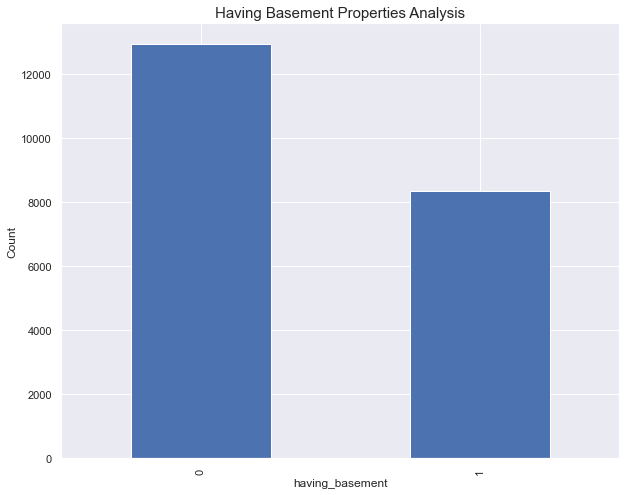

In [86]:
plt.figure(figsize=(10,8))
House_price['having_basement'].value_counts().plot(kind='bar')
plt.title('having_basement')
plt.xlabel('having_basement')
plt.ylabel('Count')
plt.title("Having Basement Properties Analysis", size=15)
sns.despine

There are most of properties without basement

#### Analyzing Feature: yr_built

In [87]:
House_price['yr_built'].value_counts()

2014.0    553
2006.0    449
2005.0    443
2004.0    427
2003.0    412
         ... 
1933.0     29
1901.0     28
1902.0     26
1935.0     24
1934.0     21
Name: yr_built, Length: 116, dtype: int64

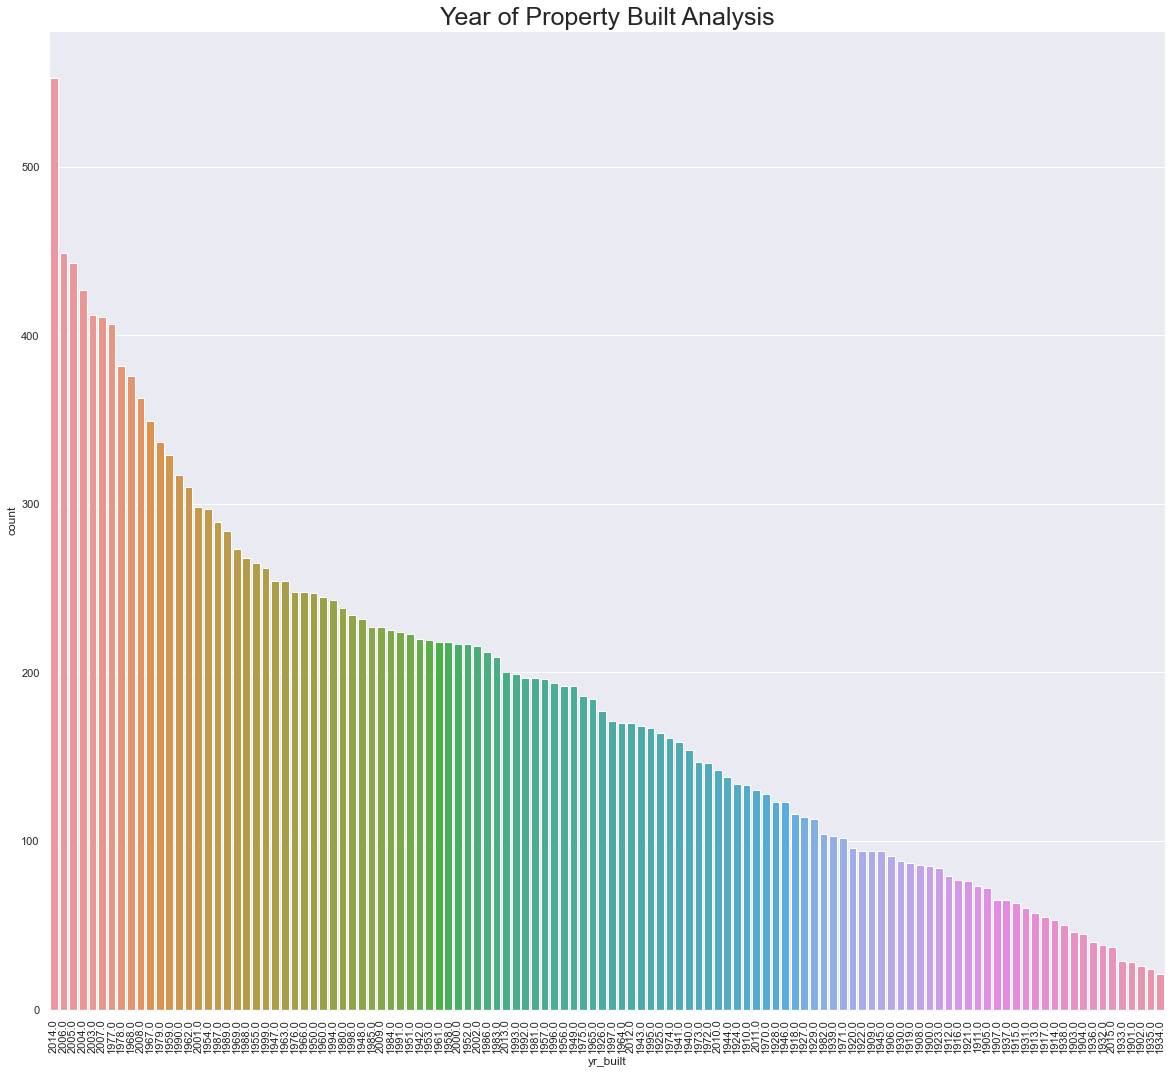

In [88]:
fig,axes = plt.subplots(figsize=(20,18))
sns.countplot(House_price['yr_built'],order = House_price['yr_built'].value_counts().index)
axes.set_xticklabels(House_price['yr_built'].value_counts().index,rotation=90)
plt.title("Year of Property Built Analysis", size=25)
plt.show()


The built year of the properties range from 1900 to 2014 and we can see upward trend with time

#### Analyzing Feature: yr_renovated

In [89]:
House_price.yr_renovated.value_counts()

0       20395
2014       89
2013       37
2003       36
2005       35
        ...  
1959        1
1934        1
1954        1
1951        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

We can see that there are many properties which are not renovated.

In [90]:
House_price[House_price['yr_renovated']>0].shape

(893, 29)

Only 893 houses were renovated out of 21288 houses

In [91]:
#house_df_reno=House_price[House_price['yr_renovated']>0]
#plt.figure(figsize=(10, 8))
#sns.hisplot(house_df_reno.yr_renovated)
#plt.title("Year of Property Renovated Analysis", size=15)

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

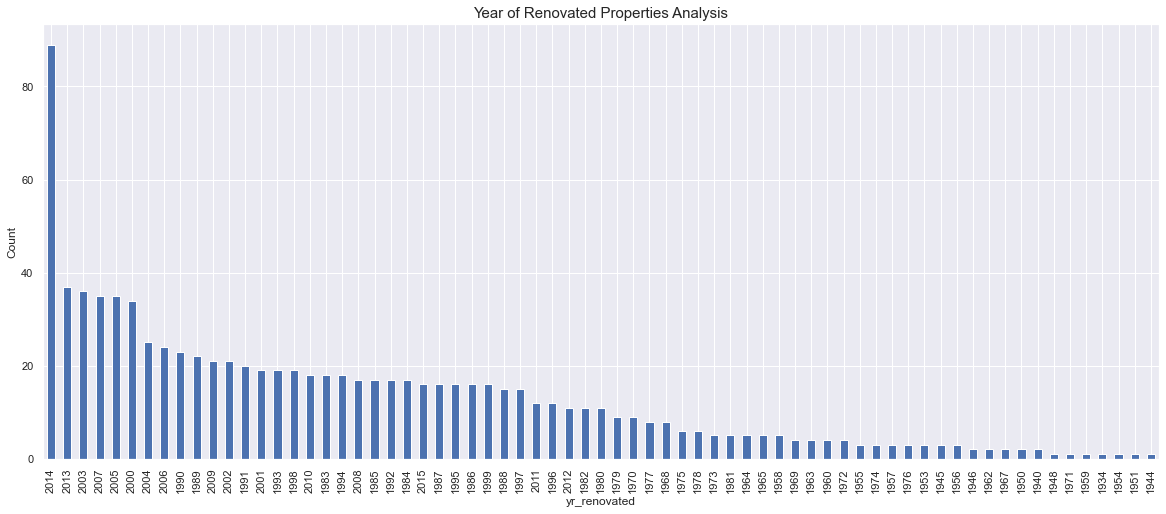

In [92]:
house_df_reno=House_price[House_price['yr_renovated']>0]
plt.figure(figsize=(20,8))
house_df_reno['yr_renovated'].value_counts().plot(kind='bar')
plt.title('yr_renovated')
plt.xlabel('yr_renovated')
plt.ylabel('Count')
plt.title("Year of Renovated Properties Analysis", size=15)
sns.despine

#### Analyzing Feature: Is_renovated

In [93]:
House_price.Is_renovated.value_counts()

0    20395
1      893
Name: Is_renovated, dtype: int64

In [94]:
House_price.furnished.value_counts()

0.0    17093
1.0     4195
Name: furnished, dtype: int64

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

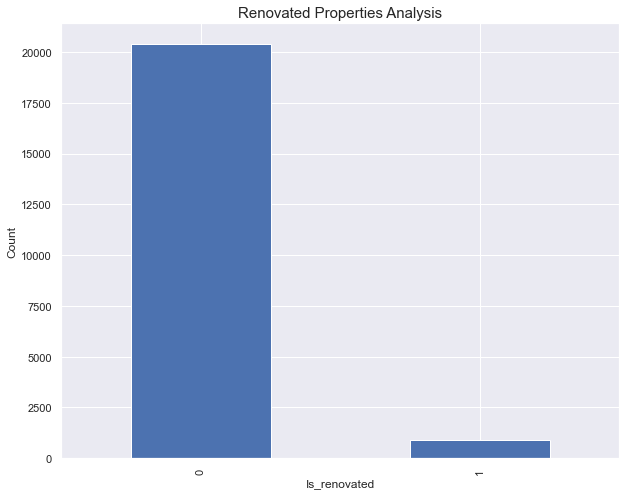

In [95]:
plt.figure(figsize=(10,8))
House_price['Is_renovated'].value_counts().plot(kind='bar')
plt.title('Is_renovated')
plt.xlabel('Is_renovated')
plt.ylabel('Count')
plt.title("Renovated Properties Analysis", size=15)
sns.despine

We have most of properties without Renovation

#### Analyzing Feature: zipcode

In [96]:
House_price['zipcode'].unique()

array([98118, 98002, 98103, 98006, 98042, 98031, 98065, 98058, 98105,
       98115, 98032, 98056, 98102, 98034, 98038, 98092, 98075, 98008,
       98011, 98014, 98023, 98053, 98001, 98198, 98126, 98052, 98116,
       98133, 98074, 98106, 98108, 98146, 98117, 98027, 98059, 98003,
       98155, 98040, 98072, 98055, 98070, 98028, 98166, 98077, 98030,
       98019, 98033, 98136, 98004, 98125, 98005, 98024, 98177, 98122,
       98168, 98029, 98007, 98178, 98107, 98188, 98039, 98144, 98010,
       98109, 98045, 98199, 98022, 98148, 98112, 98119], dtype=int64)

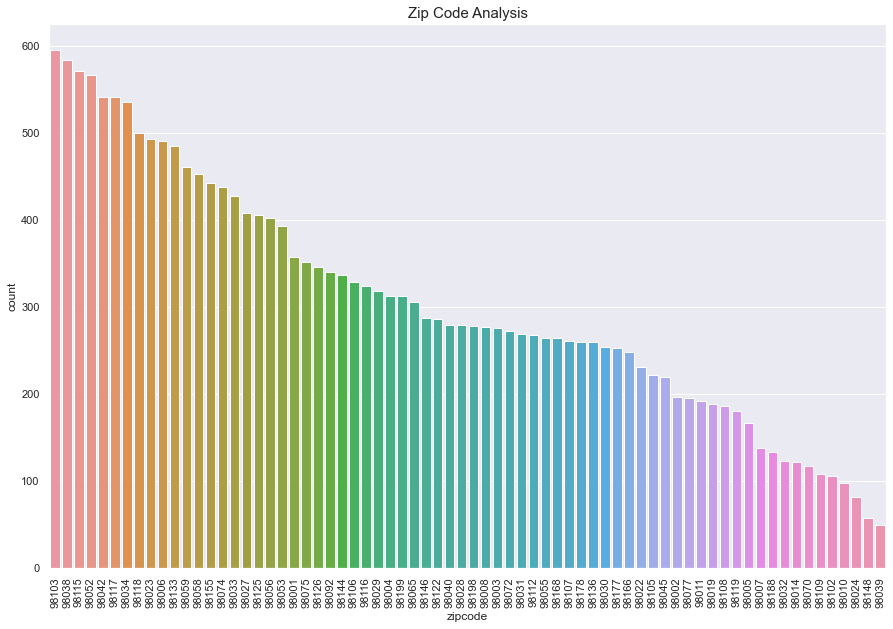

In [97]:

fig,axes = plt.subplots(figsize=(15,10))
sns.countplot(House_price['zipcode'],order = House_price['zipcode'].value_counts().index)
axes.set_xticklabels(House_price['zipcode'].value_counts().index,rotation=90)
plt.title("Zip Code Analysis", size=15)
plt.show()

In [98]:
USAZip = pd.read_excel("uszips_sorted.xlsx")
USAZip.head()

zipcode         city state_id  state_name
0    90001  Los Angeles       CA  California
1    90002  Los Angeles       CA  California
2    90003  Los Angeles       CA  California
3    90004  Los Angeles       CA  California
4    90005  Los Angeles       CA  California

In [99]:
House_price = House_price.merge(USAZip,how='left',on='zipcode')

In [100]:
House_price.shape

(21288, 32)

In [101]:
House_price.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'furnished', 'total_area', 'having_basement',
       'Is_renovated', 'Sale_Year', 'AGE_AT_SALE', 'PRICE_PER_LA',
       'MED_PRICE_ZIP', 'OVERPRICED', 'month_year', 'city', 'state_id',
       'state_name'],
      dtype='object')

In [102]:
House_price.state_id.value_counts()

WA    21288
Name: state_id, dtype: int64

In [103]:
House_price.state_name.value_counts()

Washington    21288
Name: state_name, dtype: int64

In [104]:
House_price.state_name.unique()

array(['Washington'], dtype=object)

In [105]:
House_price.city.unique()

array(['Seattle', 'Auburn', 'Bellevue', 'Kent', 'Snoqualmie', 'Renton',
       'Kirkland', 'Maple Valley', 'Sammamish', 'Bothell', 'Carnation',
       'Federal Way', 'Redmond', 'Issaquah', 'Mercer Island',
       'Woodinville', 'Vashon', 'Kenmore', 'Duvall', 'Fall City',
       'Medina', 'Black Diamond', 'North Bend', 'Enumclaw'], dtype=object)

In [106]:
House_price.city.value_counts()

Seattle          8835
Renton           1579
Bellevue         1383
Kent             1186
Kirkland          962
Redmond           959
Auburn            893
Sammamish         788
Federal Way       769
Issaquah          726
Maple Valley      583
Woodinville       467
Snoqualmie        305
Mercer Island     279
Kenmore           279
Enumclaw          231
North Bend        219
Bothell           192
Duvall            188
Carnation         121
Vashon            117
Black Diamond      97
Fall City          81
Medina             49
Name: city, dtype: int64

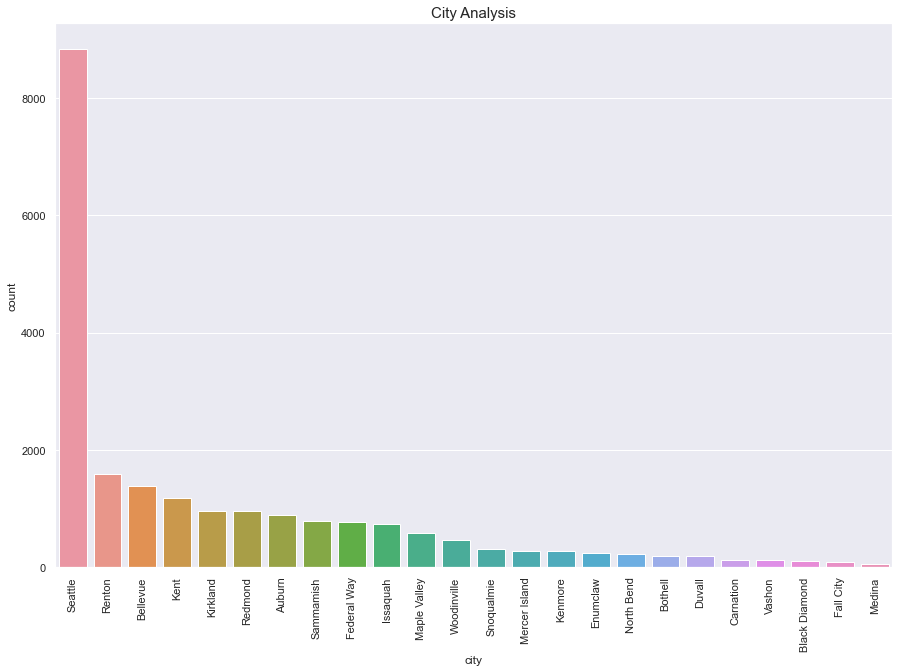

In [107]:
# Counts of properties in city
fig,axes = plt.subplots(figsize=(15,10))
sns.countplot(House_price['city'],order = House_price['city'].value_counts().index)
axes.set_xticklabels(House_price['city'].value_counts().index,rotation=90)
plt.title("City Analysis", size=15)
plt.show()

#### Analyzing Feature: Lat & Long Variables

In [108]:
BBbox = (House_price['long'].min(),House_price['long'].max(),House_price['lat'].min(),House_price['lat'].max())
BBbox

(-122.519, -121.315, 47.1559, 47.7776)

In [109]:
st_map = plt.imread('map.png')

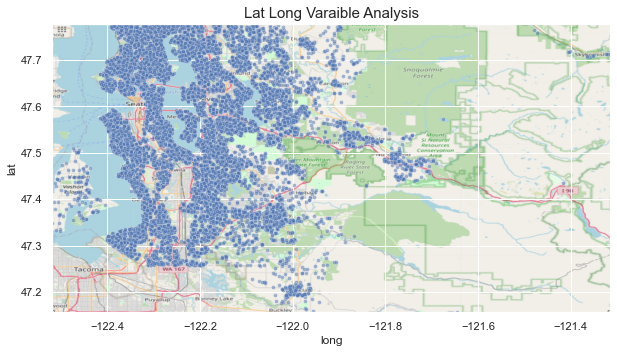

In [110]:
fig,axes = plt.subplots(figsize=(10,8))
sns.scatterplot(House_price['long'], House_price['lat'], zorder=1,alpha= 0.5,s=15)
axes.set_title('Lat Long Varaible Analysis', size=15)
axes.set_xlim(BBbox[0],BBbox[1])
axes.set_ylim(BBbox[2],BBbox[3])
axes.imshow(st_map, zorder=0, extent = BBbox, aspect= 'equal')

In [111]:
import folium
from folium.plugins import FastMarkerCluster

In [112]:
## Let's study Latitude and Longitue features 

lat = House_price['lat'].tolist()
lon = House_price['long'].tolist()
locations = list(zip(lat, lon))

map1 = folium.Map(location=[47.7776, -122.519], zoom_start=10)
FastMarkerCluster(locations).add_to(map1)
map1

#### Analyzing Feature: furnished

In [113]:
House_price.furnished.value_counts()


0.0    17093
1.0     4195
Name: furnished, dtype: int64

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

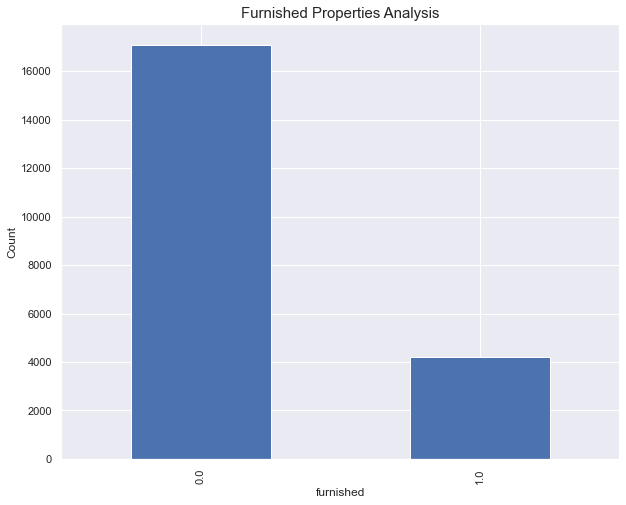

In [114]:
plt.figure(figsize=(10,8))
House_price['furnished'].value_counts().plot(kind='bar')
plt.title('furnished')
plt.xlabel('furnished')
plt.ylabel('Count')
plt.title("Furnished Properties Analysis", size=15)
sns.despine

Most properties are not furnished. furnished column need to be converted into categorical column

#### Analyzing Feature: total_area

In [115]:
print("Skewness is :",House_price.total_area.skew())

Skewness is : 10.795078306735624


Text(0.5, 0.98, 'Total Area Variable Anaylsis')

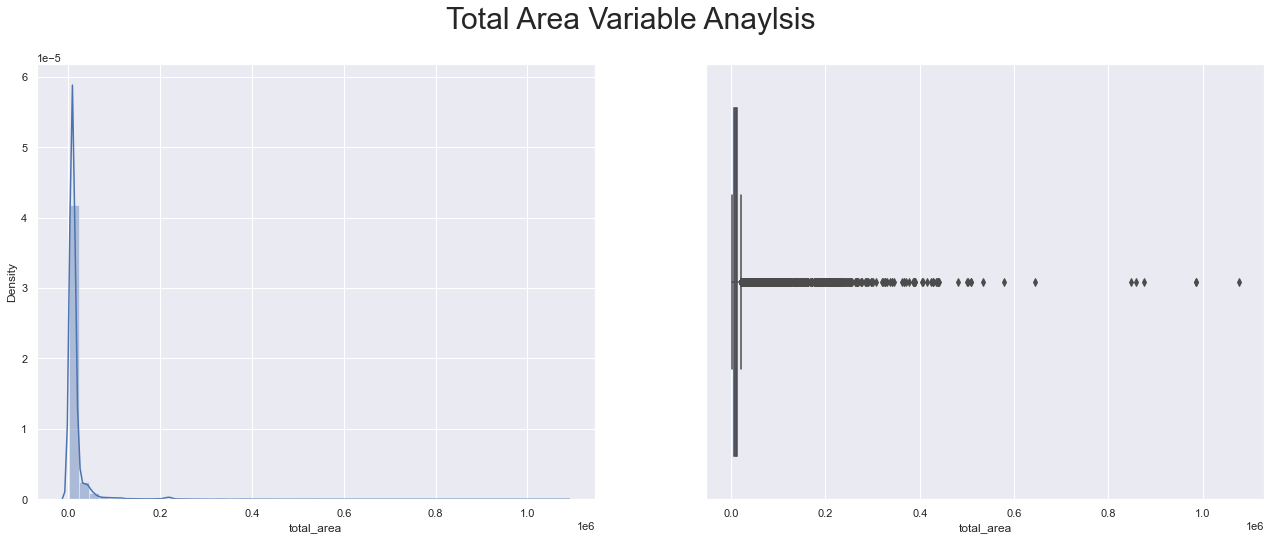

In [116]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(House_price['total_area'], ax=ax[0])
sns.boxplot(House_price['total_area'],  orient='h', ax=ax[1])
fig.suptitle("Total Area Variable Anaylsis", size=30)

In [117]:
House_price.total_area.describe()

count    2.128800e+04
mean     1.629826e+04
std      3.531037e+04
min      1.423000e+03
25%      7.027000e+03
50%      9.545000e+03
75%      1.274000e+04
max      1.077228e+06
Name: total_area, dtype: float64

### Analyzing Feature: Sale_Year

In [118]:
House_price.Sale_Year.value_counts()

2014    14411
2015     6877
Name: Sale_Year, dtype: int64

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

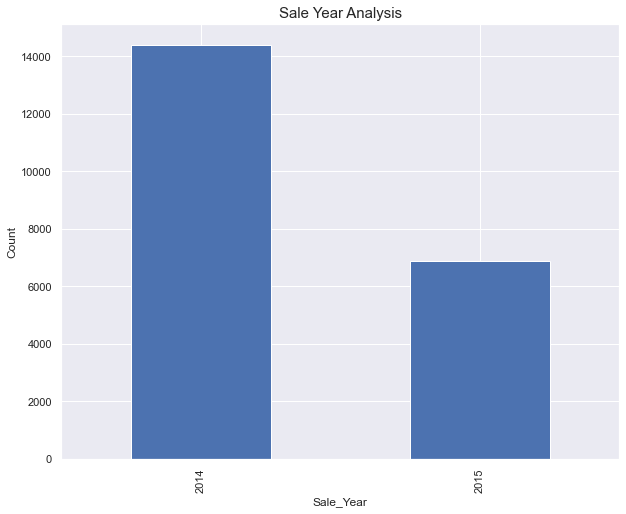

In [119]:
plt.figure(figsize=(10,8))
House_price['Sale_Year'].value_counts().plot(kind='bar')
plt.title('Sale_Year')
plt.xlabel('Sale_Year')
plt.ylabel('Count')
plt.title("Sale Year Analysis", size=15)
sns.despine

We Can see that most of properties were sold in 2014.

### Analyzing Feature: AGE_AT_SALE

In [120]:
House_price[House_price['AGE_AT_SALE']>0].shape

(20761, 32)

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

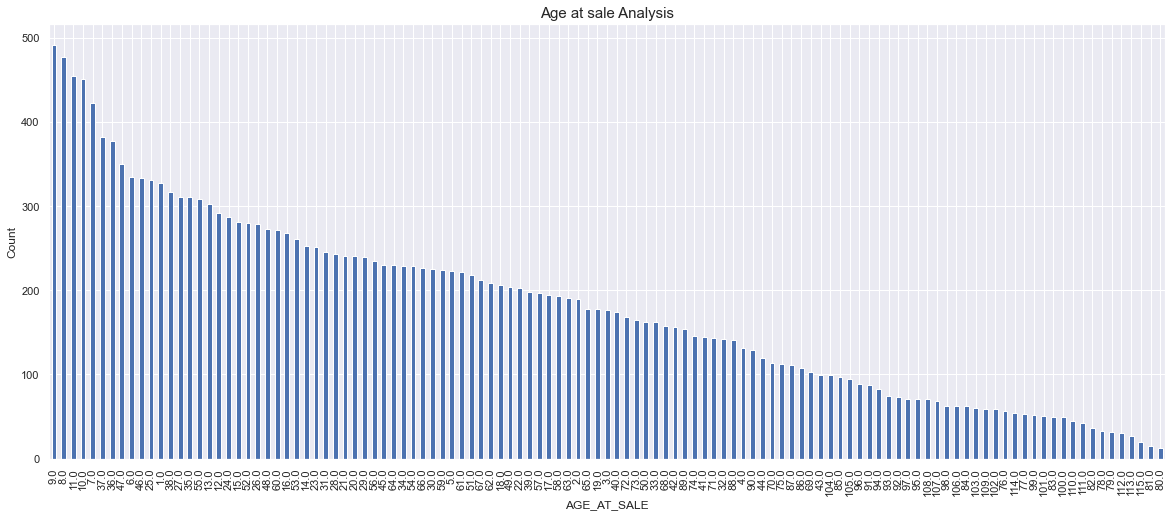

In [121]:
house_df_reno=House_price[House_price['AGE_AT_SALE']>0]
plt.figure(figsize=(20,8))
house_df_reno['AGE_AT_SALE'].value_counts().plot(kind='bar')
plt.title('AGE_AT_SALE')
plt.xlabel('AGE_AT_SALE')
plt.ylabel('Count')
plt.title("Age at sale Analysis", size=15)
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

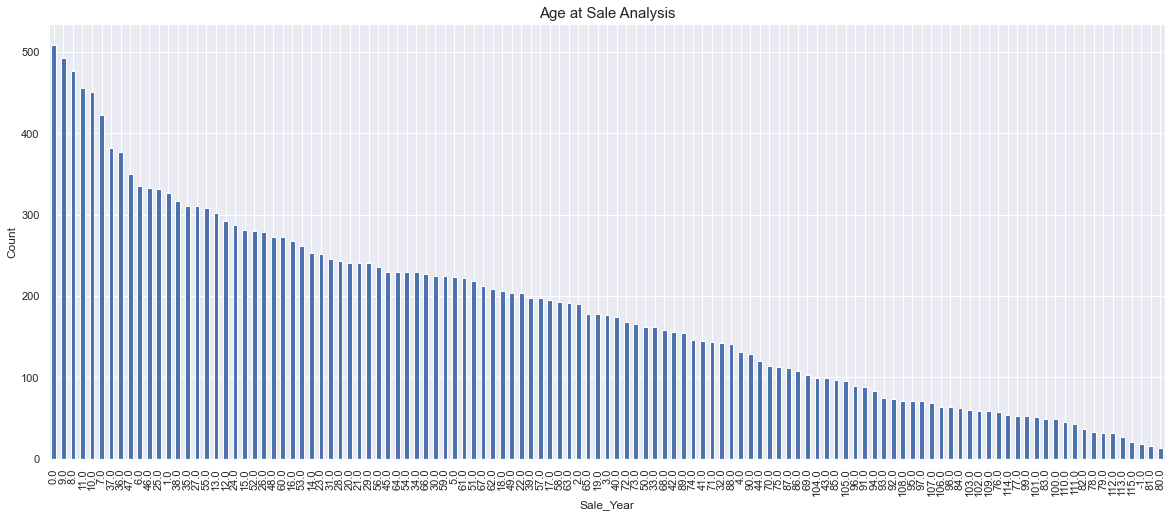

In [122]:
plt.figure(figsize=(20,8))
House_price['AGE_AT_SALE'].value_counts().plot(kind='bar')
plt.title('AGE_AT_SALE')
plt.xlabel('Sale_Year')
plt.ylabel('Count')
plt.title("Age at Sale Analysis", size=15)
sns.despine

Text(0.5, 0.98, 'Age At sale Variable Anaylsis')

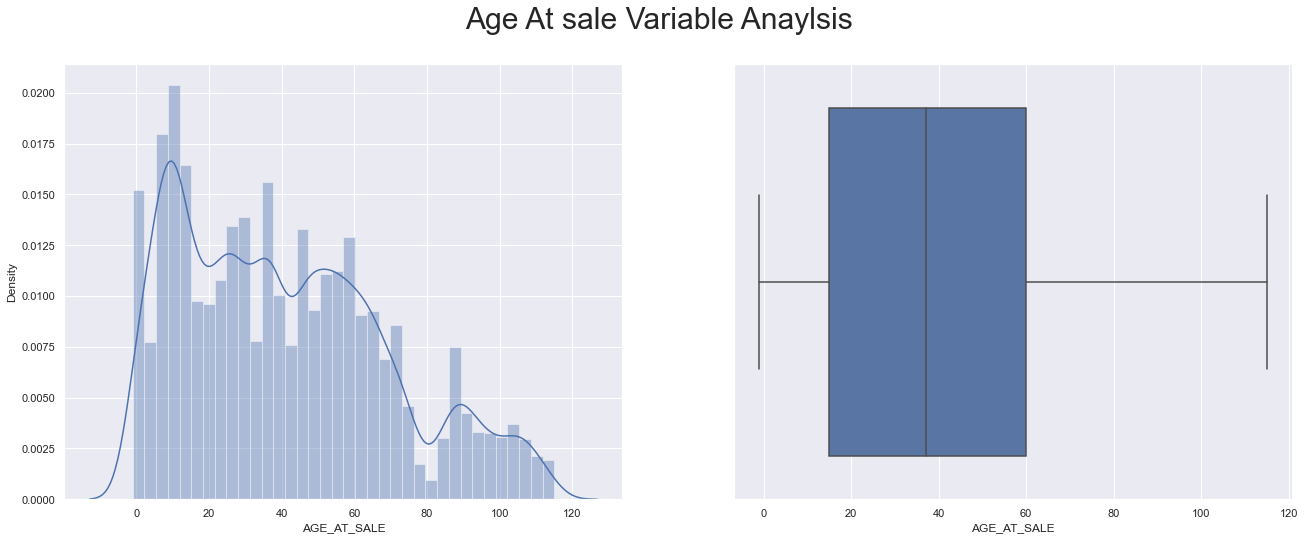

In [123]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(House_price['AGE_AT_SALE'], ax=ax[0])
sns.boxplot(House_price['AGE_AT_SALE'],  orient='h', ax=ax[1])
fig.suptitle("Age At sale Variable Anaylsis", size=30)


### Bi-Variate Analysis on Price Variable

#### PairPlot

In [124]:
#plt.figure(figsize=(20,6))
#sns.set_style('white')
#sns.set_style('ticks')
#sns.pairplot(House_price, diag_kind='reg')

In [125]:
# let's see correlation between the different features
house_corr = House_price.corr(method ='pearson')
house_corr

cid     price  room_bed  room_bath  living_measure  \
cid              1.000000 -0.017852  0.001543   0.005021       -0.011559   
price           -0.017852  1.000000  0.307878   0.523339        0.671899   
room_bed         0.001543  0.307878  1.000000   0.515356        0.521766   
room_bath        0.005021  0.523339  0.515356   1.000000        0.697174   
living_measure  -0.011559  0.671899  0.521766   0.697174        1.000000   
lot_measure     -0.135122  0.085695  0.032804   0.089321        0.178831   
ceil             0.019513  0.257425  0.174140   0.500267        0.329740   
coast           -0.004111  0.267841 -0.007003   0.062328        0.102112   
sight            0.011927  0.395860  0.079122   0.184941        0.281143   
condition       -0.024140  0.036027  0.027534  -0.126649       -0.064148   
quality          0.008325  0.668567  0.356000   0.664728        0.738702   
ceil_measure    -0.009373  0.560724  0.412380   0.612592        0.870428   
basement        -0.005906  0.313766  0.286571   0.268279        0.400168   
yr_built         0.021782  0.054680  0.153824   0.507183        0.308424   
yr_renovated    -0.016862  0.125734  0.017925   0.049069        0.046446   
zipcode         -0.007624 -0.053700 -0.153418  -0.205762       -0.216240   
lat             -0.001444  0.307757 -0.009576   0.024239        0.055627   
long             0.020535  0.022102  0.130219   0.223807        0.257612   
furnished       -0.009552  0.568530  0.259016   0.485051        0.621541   
total_area      -0.134778  0.101588  0.045302   0.105810        0.202248   
having_basement  0.002326  0.179454  0.161954   0.162224        0.164545   
Is_renovated    -0.016890  0.125381  0.017631   0.048576        0.046200   
Sale_Year        0.009198  0.003379 -0.008981  -0.027012       -0.072841   
AGE_AT_SALE     -0.017521 -0.105986 -0.164642  -0.538185       -0.330526   
PRICE_PER_LA    -0.008263  0.627673 -0.083045   0.044943       -0.052564   
MED_PRICE_ZIP    0.001017  0.632920  0.124625   0.234911        0.319907   
OVERPRICED      -0.001046  0.423756  0.335090   0.438709        0.522231   

                 lot_measure      ceil     coast     sight  condition  \
cid                -0.135122  0.019513 -0.004111  0.011927  -0.024140   
price               0.085695  0.257425  0.267841  0.395860   0.036027   
room_bed            0.032804  0.174140 -0.007003  0.079122   0.027534   
room_bath           0.089321  0.500267  0.062328  0.184941  -0.126649   
living_measure      0.178831  0.329740  0.102112  0.281143  -0.064148   
lot_measure         1.000000 -0.005562  0.029024  0.073975  -0.005545   
ceil               -0.005562  1.000000  0.024537  0.029143  -0.263780   
coast               0.029024  0.024537  1.000000  0.400189   0.015876   
sight               0.073975  0.029143  0.400189  1.000000   0.045966   
condition          -0.005545 -0.263780  0.015876  0.045966   1.000000   
quality             0.117898  0.458087  0.082732  0.250502  -0.146728   
ceil_measure        0.182780  0.494968  0.068796  0.155447  -0.164473   
basement            0.021076 -0.255167  0.078252  0.278682   0.176566   
yr_built            0.059246  0.489754 -0.025091 -0.052430  -0.362824   
yr_renovated        0.010382  0.004000  0.090314  0.101397  -0.059361   
zipcode            -0.138412 -0.058980  0.030598  0.085166   0.004133   
lat                -0.089088  0.050506 -0.014728  0.005912  -0.015474   
long                0.234863  0.124355 -0.041771 -0.078661  -0.106845   
furnished           0.124216  0.347258  0.069495  0.220111  -0.123405   
total_area          0.999715  0.002458  0.031365  0.080449  -0.007075   
having_basement    -0.035068 -0.257831  0.035412  0.181044   0.136481   
Is_renovated        0.010495  0.003915  0.090708  0.101531  -0.058877   
Sale_Year          -0.029583 -0.022509 -0.003925  0.001219  -0.044530   
AGE_AT_SALE        -0.060486 -0.504952 -0.000263  0.018133   0.396183   
PRICE_PER_LA       -0.024703  0.069708  0.195409  0.233559   0.09839

Text(0.5, 1.0, 'Correlation Matrix')

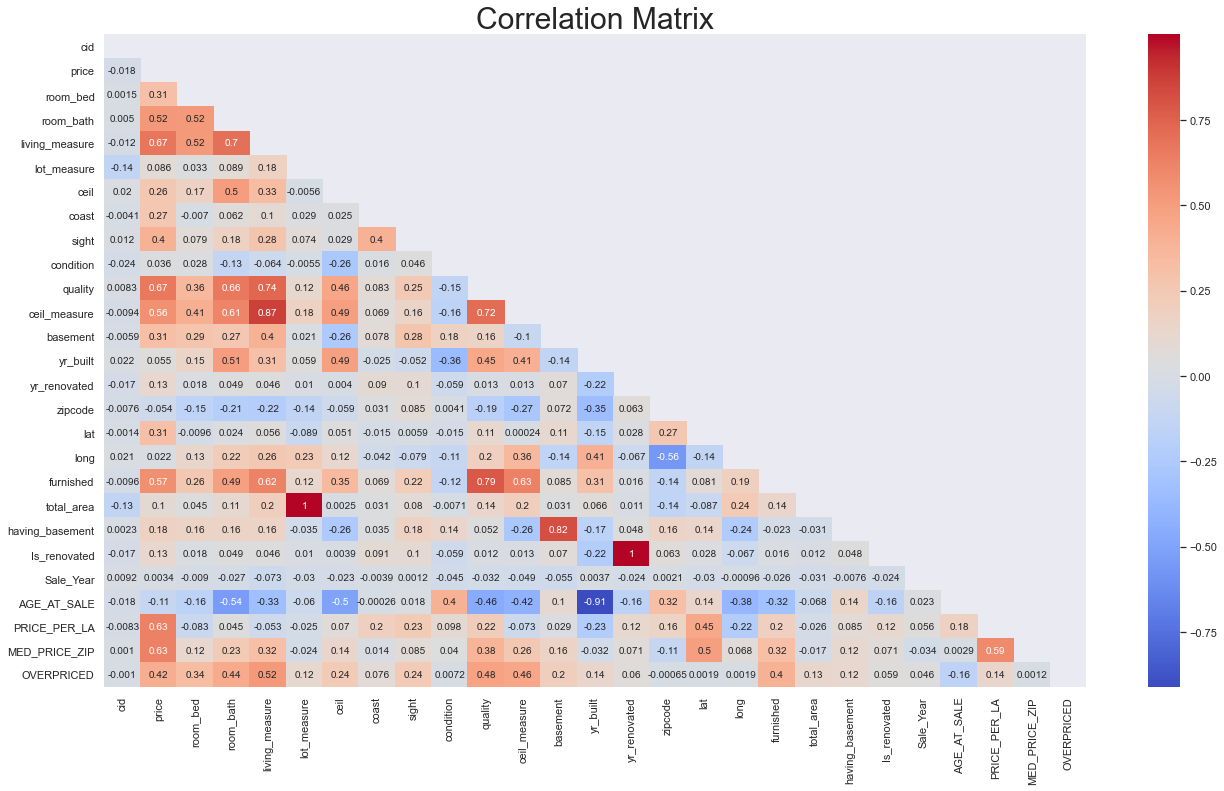

In [126]:
# Plotting heatmap
plt.subplots(figsize =(22, 12)) 
sns.heatmap(house_corr,cmap="coolwarm",annot=True, mask = np.triu(np.ones_like(house_corr, dtype=bool)))
plt.title("Correlation Matrix", size=30)

We have linear relationships in featues as we got to know from above Heat map.

Text(0.5, 1.0, 'Correlation with Price Variable')

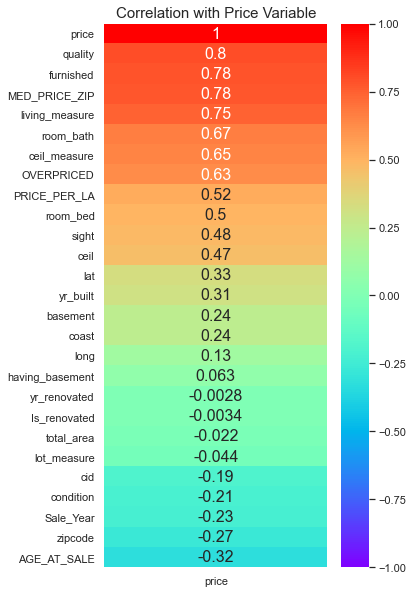

In [127]:
top_features = house_corr.corr()[['price']].sort_values(by=['price'],ascending=False).head(30)
plt.figure(figsize=(5,10))
sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=-1)
plt.title("Correlation with Price Variable", size=15)

In [128]:
# list of numerical variables
numerical_features = [feature for feature in House_price.columns if House_price[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
House_price[numerical_features].head()

Number of numerical variables:  28


cid   dayhours    price  room_bed  room_bath  living_measure  \
0  7129303070 2014-08-20   735000       4.0       2.75          3040.0   
1  7338220280 2014-10-10   257000       3.0       2.50          1740.0   
2   510002519 2014-07-15   466000       2.0       1.50          1140.0   
3  1624059224 2014-06-18  1160000       4.0       3.50          4680.0   
4  5469503280 2014-07-21   449950       4.0       2.50          3100.0   

   lot_measure  ceil  coast  sight  condition  quality  ceil_measure  \
0       2415.0   2.0    1.0    4.0        3.0      8.0        3040.0   
1       3721.0   2.0    0.0    0.0        3.0      8.0        1740.0   
2       1058.0   3.0    0.0    0.0        3.0      7.0        1140.0   
3       9700.0   2.0    0.0    0.0        3.0     10.0        3360.0   
4      10000.0   2.0    0.0    0.0        3.0      9.0        3100.0   

   basement  yr_built  yr_renovated  zipcode      lat     long  furnished  \
0       0.0    1966.0             0    98118  47.5188 -122.256        0.0   
1       0.0    2009.0             0    98002  47.3363 -122.213        0.0   
2       0.0    2005.0             0    98103  47.6608 -122.333        0.0   
3    1320.0    2005.0             0    98006  47.5703 -122.165        1.0   
4       0.0    1978.0             0    98042  47.3741 -122.150        1.0   

   total_area  having_basement  Is_renovated  Sale_Year  AGE_AT_SALE  \
0      5455.0                0             0       2014         48.0   
1      5461.0                0             0       2014          5.0   
2      2198.0                0             0       2014          9.0   
3     14380.0                1             0       2014          9.0   
4     13100.0                0             0       2014         36.0   

   PRICE_PER_LA  MED_PRICE_ZIP  OVERPRICED  
0    241.776316       367500.0           1  
1    147.701149       235000.0           1  
2    408.771930       550000.0           0  
3    247.863248       762684.5           1  
4    145.145161       292500.0           1

In [129]:
## Numerical variables are usually of 2 type
## Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(House_price[feature].unique())<30]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 12


In [130]:
discrete_feature

['room_bed',
 'room_bath',
 'ceil',
 'coast',
 'sight',
 'condition',
 'quality',
 'furnished',
 'having_basement',
 'Is_renovated',
 'Sale_Year',
 'OVERPRICED']

In [131]:
House_price[discrete_feature].head()

room_bed  room_bath  ceil  coast  sight  condition  quality  furnished  \
0       4.0       2.75   2.0    1.0    4.0        3.0      8.0        0.0   
1       3.0       2.50   2.0    0.0    0.0        3.0      8.0        0.0   
2       2.0       1.50   3.0    0.0    0.0        3.0      7.0        0.0   
3       4.0       3.50   2.0    0.0    0.0        3.0     10.0        1.0   
4       4.0       2.50   2.0    0.0    0.0        3.0      9.0        1.0   

   having_basement  Is_renovated  Sale_Year  OVERPRICED  
0                0             0       2014           1  
1                0             0       2014           1  
2                0             0       2014           0  
3                1             0       2014           1  
4                0             0       2014           1

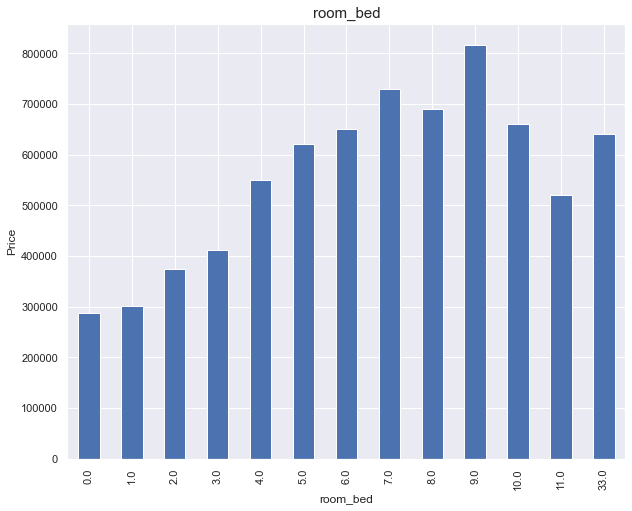

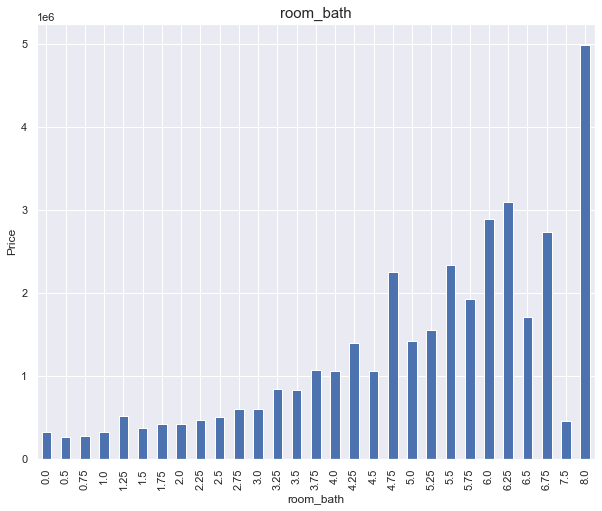

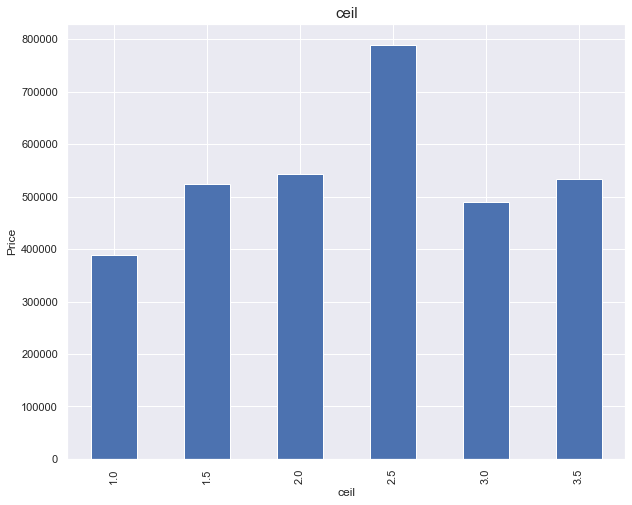

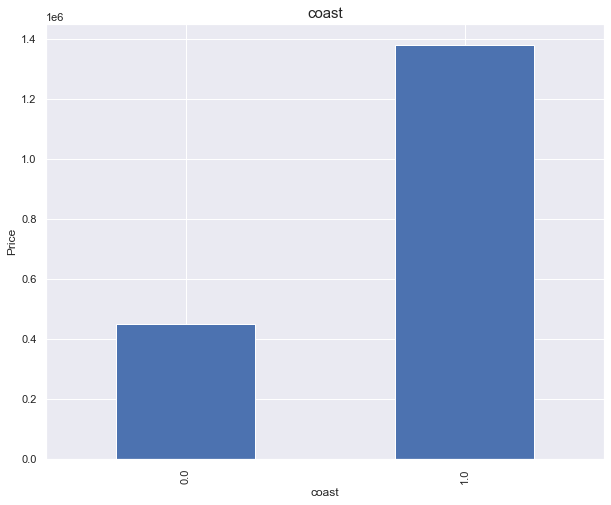

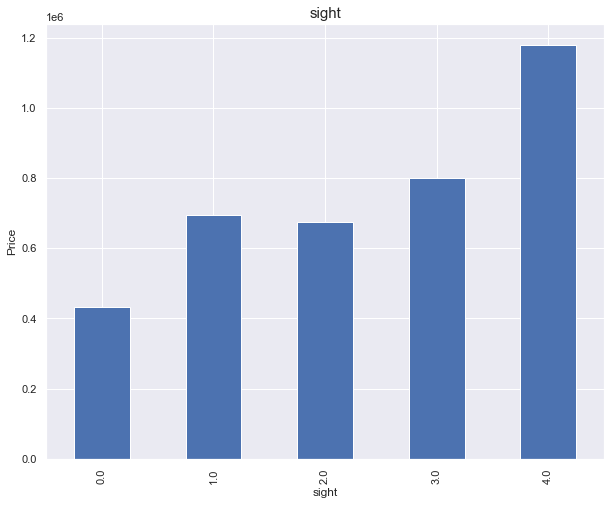

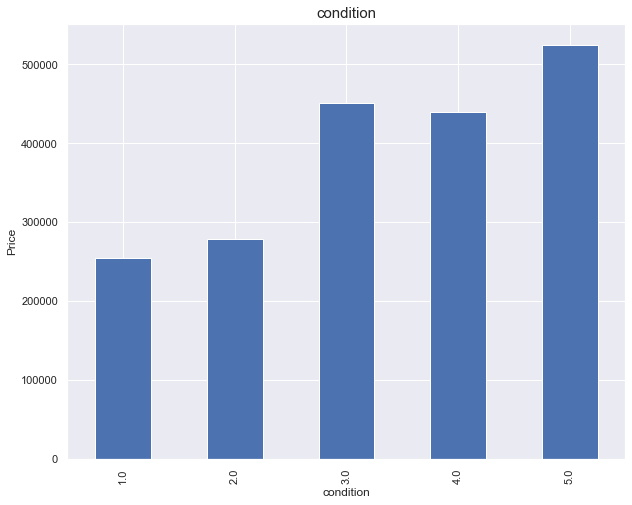

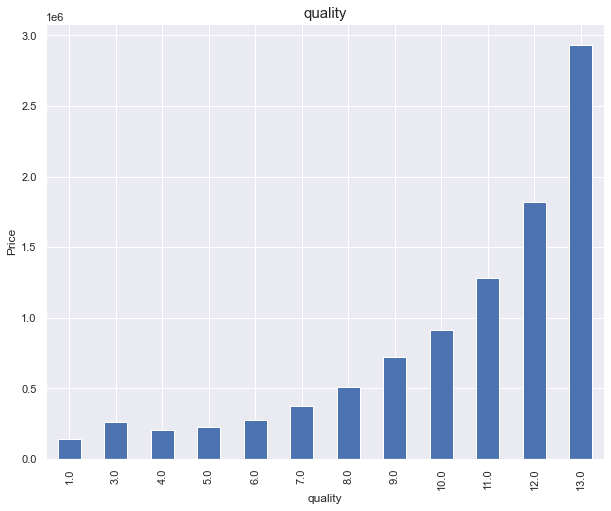

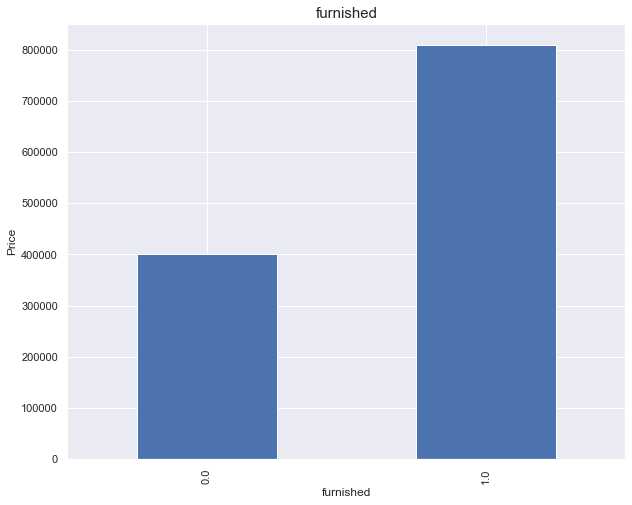

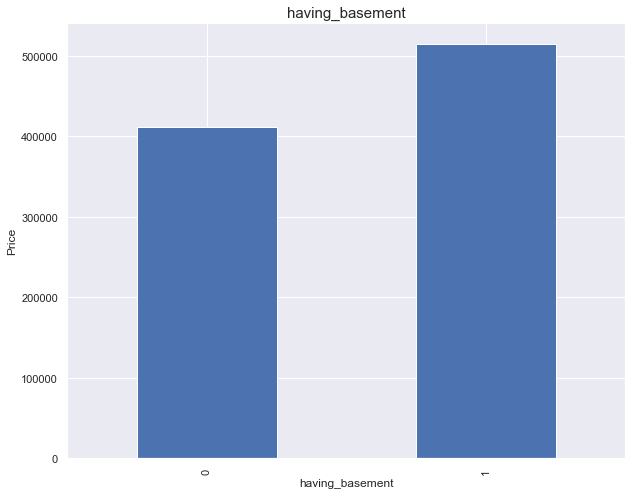

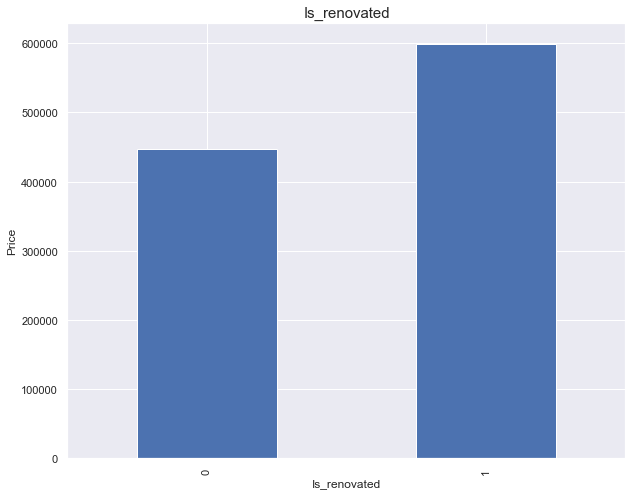

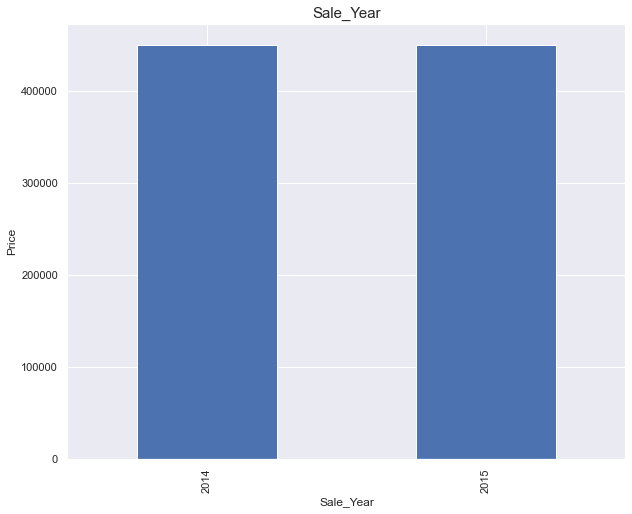

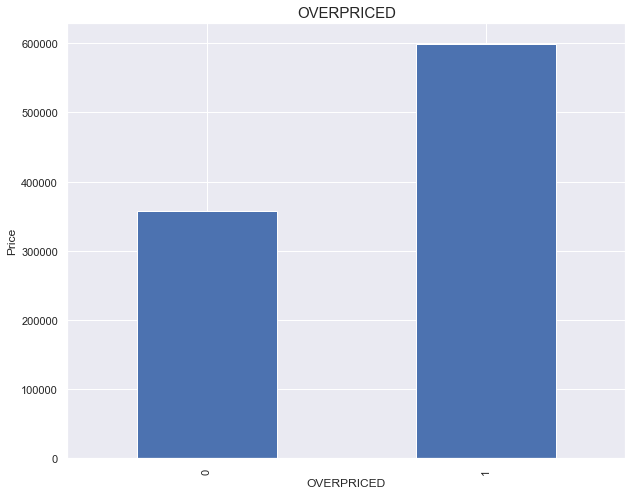

In [132]:
## Lets Find the relationship between discrete_feature and PRice

for feature in discrete_feature:
    data=House_price.copy()
    plt.figure(figsize=(10,8))
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature, size=15)
    plt.show()

In [133]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


In [134]:
continuous_feature

['cid',
 'dayhours',
 'price',
 'living_measure',
 'lot_measure',
 'ceil_measure',
 'basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'total_area',
 'AGE_AT_SALE',
 'PRICE_PER_LA',
 'MED_PRICE_ZIP']

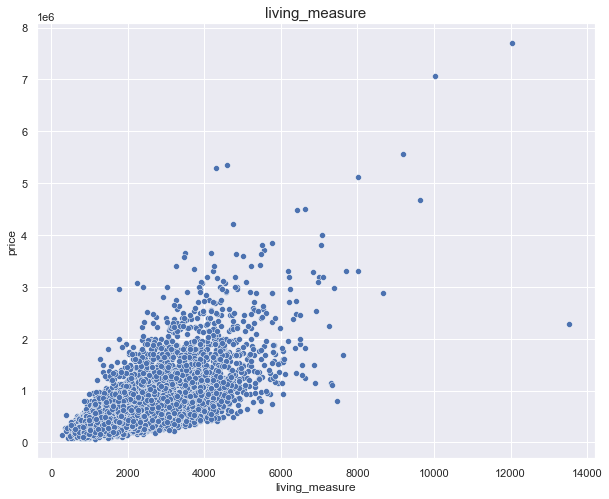

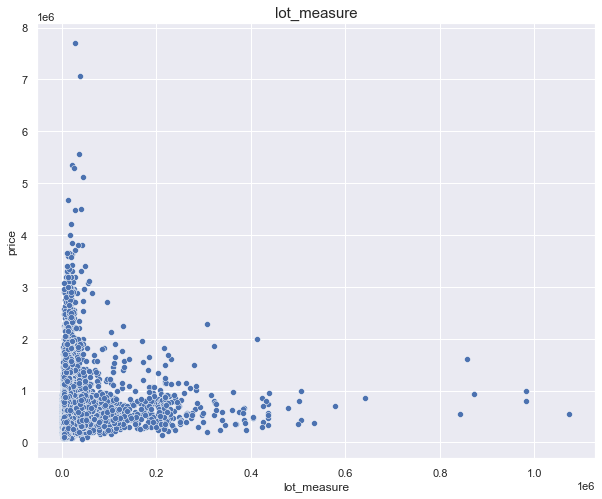

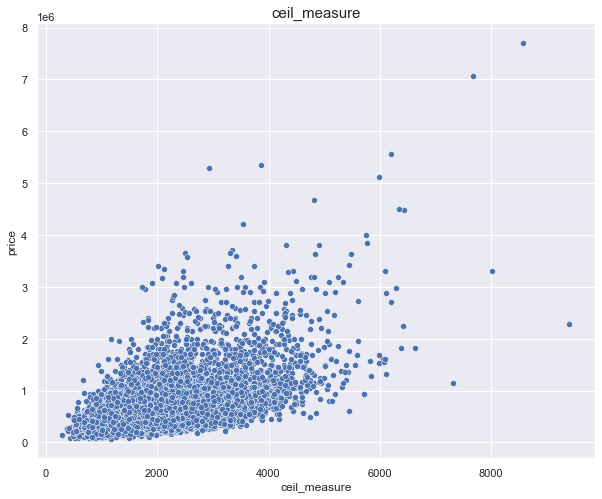

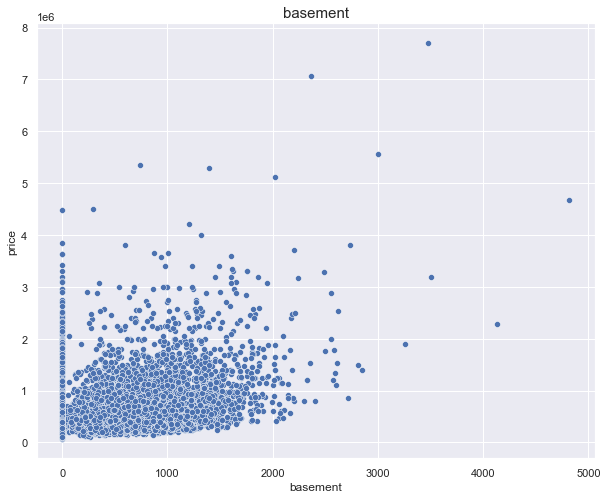

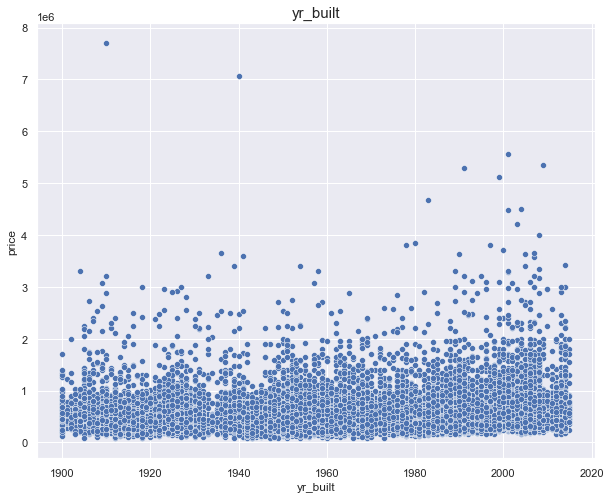

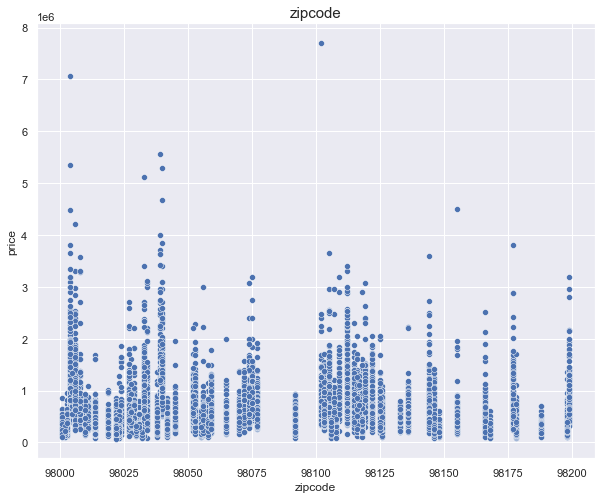

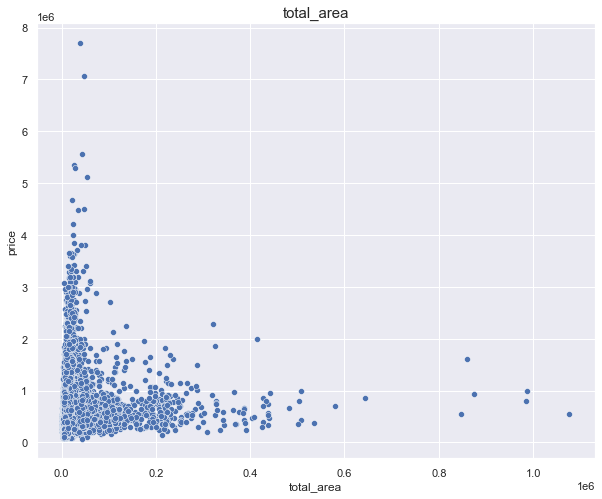

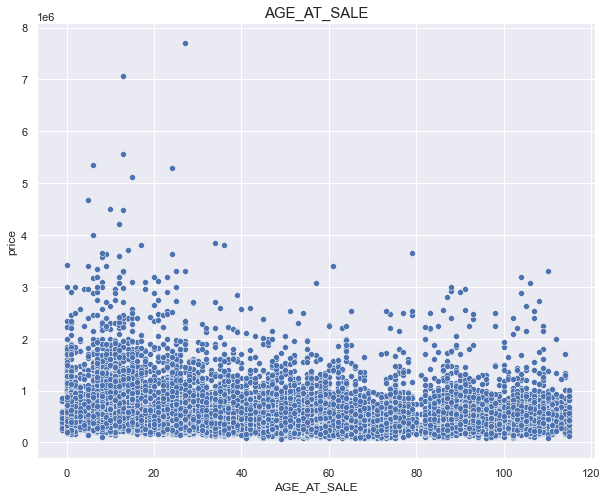

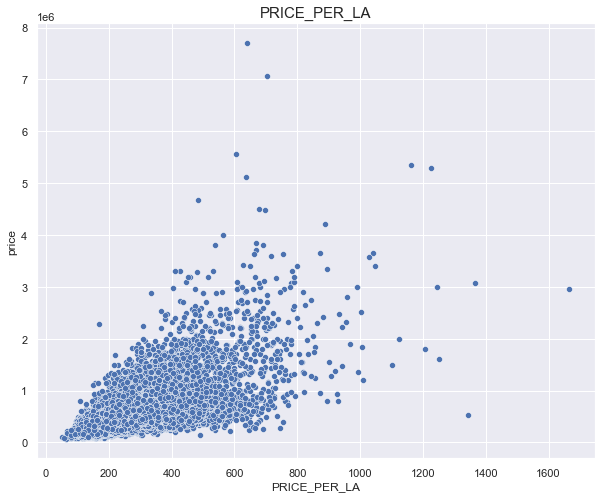

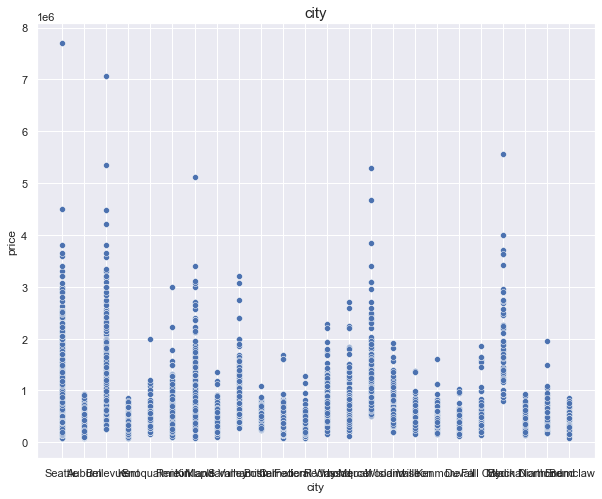

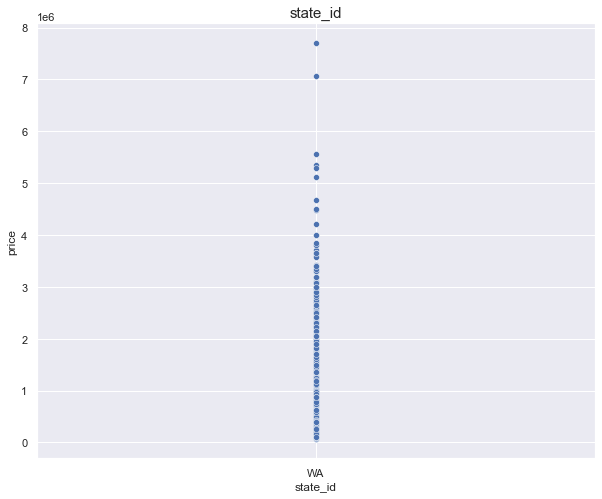

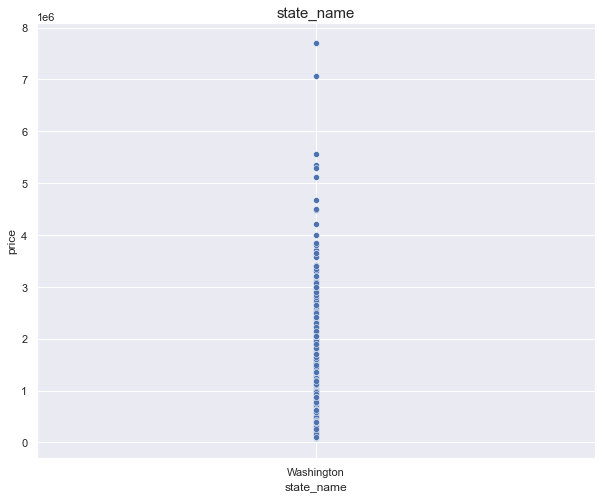

In [135]:
list1 = ['cid','dayhours','price','room_bed','ceil','coast', 'sight',
        'condition', 'quality', 'furnished','having_basement','Is_renovated','Sale_Year','room_bath','OVERPRICED','month_year','yr_renovated','lat','long','MED_PRICE_ZIP']
House_price_def = House_price.drop(columns=list1)
def scattered_plot():
    for i in House_price_def.columns:
        plt.figure(figsize=(10,8))
        sns.scatterplot(x=i,y='price', data=House_price, edgecolors="#000000", linewidths=0.5)
        plt.title(i, size=15)
        plt.show()
scattered_plot() 

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Price vs Living Measure')

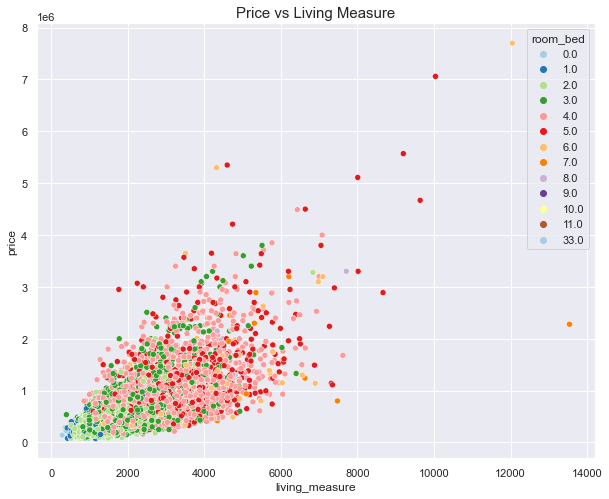

In [136]:
plt.figure(figsize=(10, 8))
print(sns.scatterplot(House_price['living_measure'],House_price['price'],hue=House_price['room_bed'],palette='Paired',legend='full'))
plt.title("Price vs Living Measure", size=15)

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Price vs Living Measure')

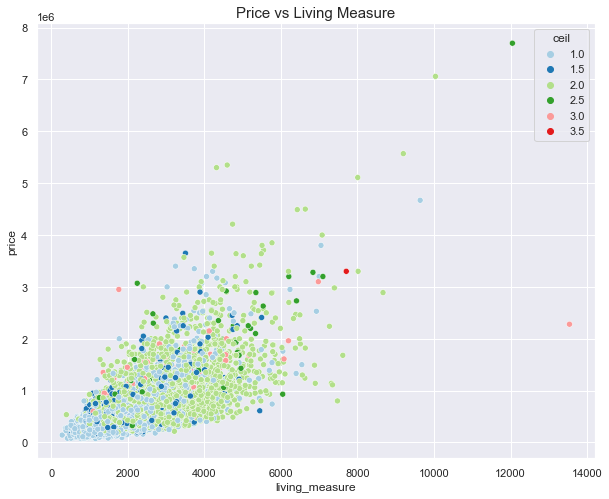

In [137]:
plt.figure(figsize=(10, 8))
print(sns.scatterplot(House_price['living_measure'],House_price['price'],hue=House_price['ceil'],palette='Paired',legend='full'))
plt.title("Price vs Living Measure", size=15)

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Price vs Living Measure')

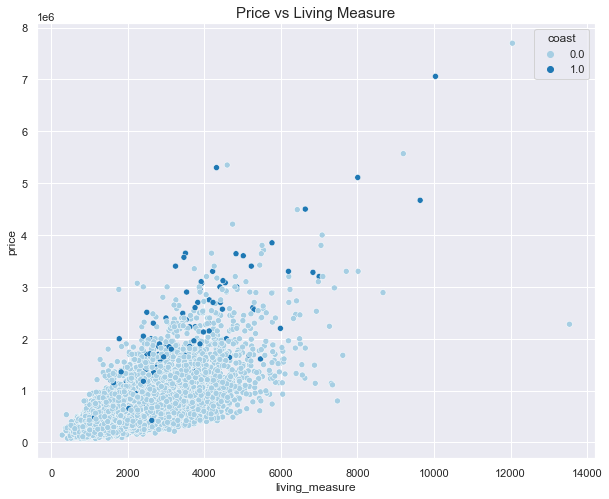

In [138]:
plt.figure(figsize=(10, 8))
print(sns.scatterplot(House_price['living_measure'],House_price['price'],hue=House_price['coast'],palette='Paired',legend='full'))
plt.title("Price vs Living Measure", size=15)

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Price vs Living Measure ')

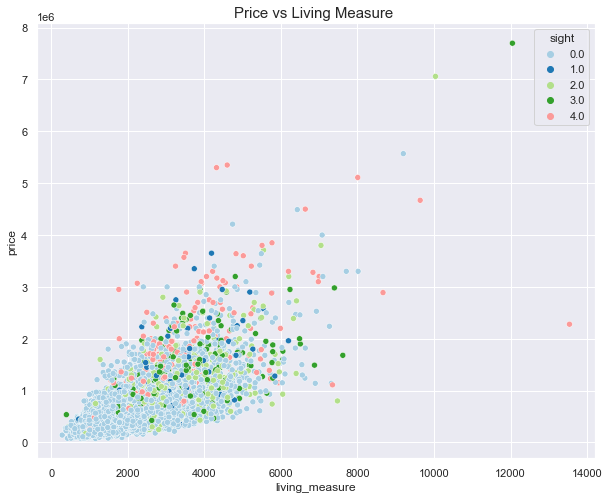

In [139]:
#Sight - Viewed in relation with price and living_measure
#Costlier houses with large living area are sighted more.
plt.figure(figsize=(10, 8))
print(sns.scatterplot(House_price['living_measure'],House_price['price'],hue=House_price['sight'],palette='Paired',legend='full'))
plt.title("Price vs Living Measure ", size=15)

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Price vs Living Measure')

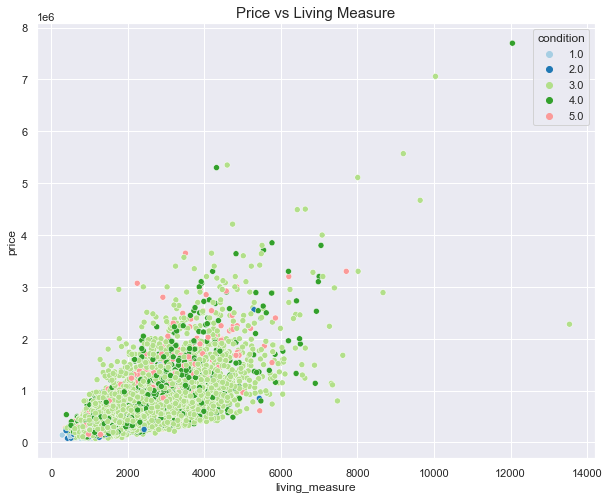

In [140]:
#Condition - Viewed in relation with price and living_measure. Most houses are rated as 3 or more. 
#We can see some outliers as well
plt.figure(figsize=(10, 8))
print(sns.scatterplot(House_price['living_measure'],House_price['price'],hue=House_price['condition'],palette='Paired',legend='full'))
plt.title("Price vs Living Measure", size=15)

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Price vs Living Measure')

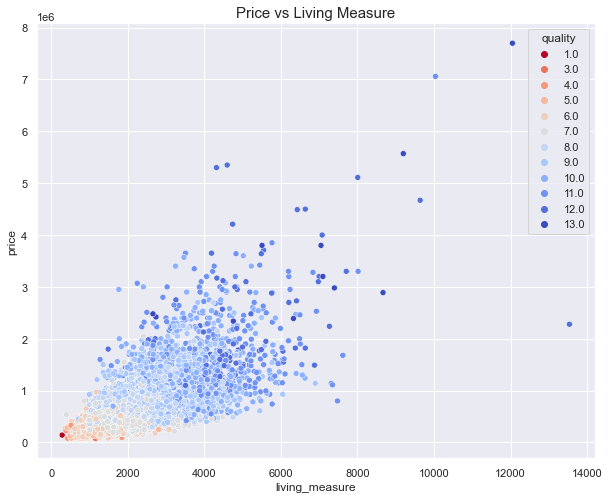

In [141]:
#quality - Viewed in relation with price and living_measure. Most houses are graded as 6 or more. 
#We can see some outliers as well
plt.figure(figsize=(10, 8))
print(sns.scatterplot(House_price['living_measure'],House_price['price'],hue=House_price['quality'],palette='coolwarm_r',legend='full'))
plt.title("Price vs Living Measure", size=15)

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Price vs Living Measure')

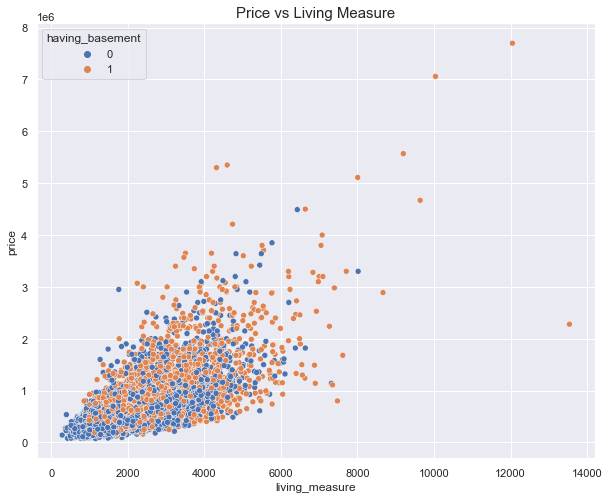

In [142]:
plt.figure(figsize=(10,8))
print(sns.scatterplot(House_price['living_measure'],House_price['price'],hue=House_price['having_basement']))
plt.title("Price vs Living Measure", size=15)

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Price vs Living Measure')

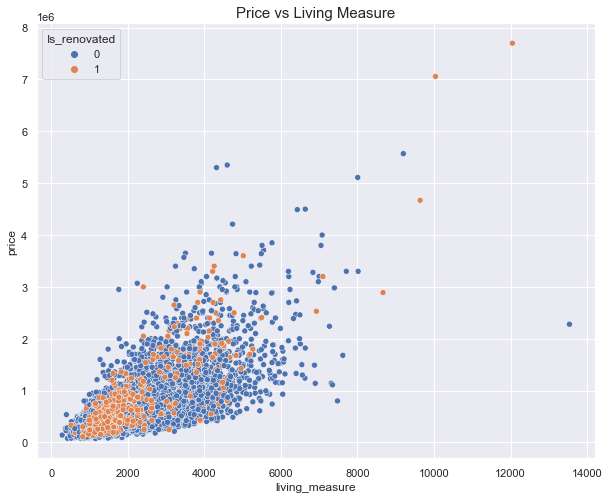

In [143]:

plt.figure(figsize=(10, 8))
print(sns.scatterplot(House_price['living_measure'],House_price['price'],hue=House_price['Is_renovated']))
plt.title("Price vs Living Measure", size=15)


Renovated properties have higher price than others with same living measure space.



AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Price vs Living Measure')

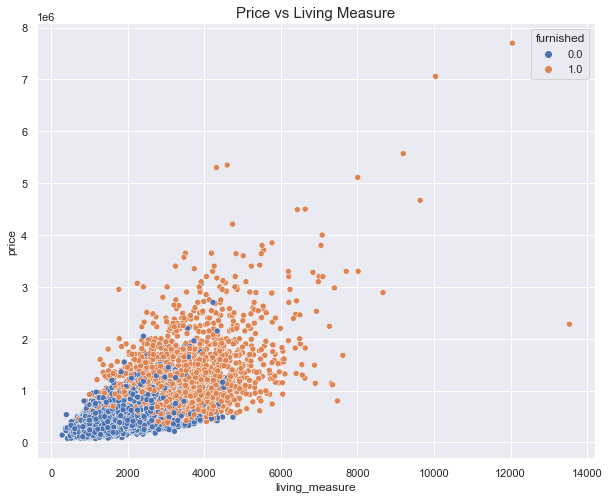

In [144]:
#furnished - Furnished has higher price value and has greater living_measure
plt.figure(figsize=(10, 8))
print(sns.scatterplot(House_price['living_measure'],House_price['price'],hue=House_price['furnished']))
plt.title("Price vs Living Measure", size=15)

AxesSubplot(0.125,0.125;0.775x0.755)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

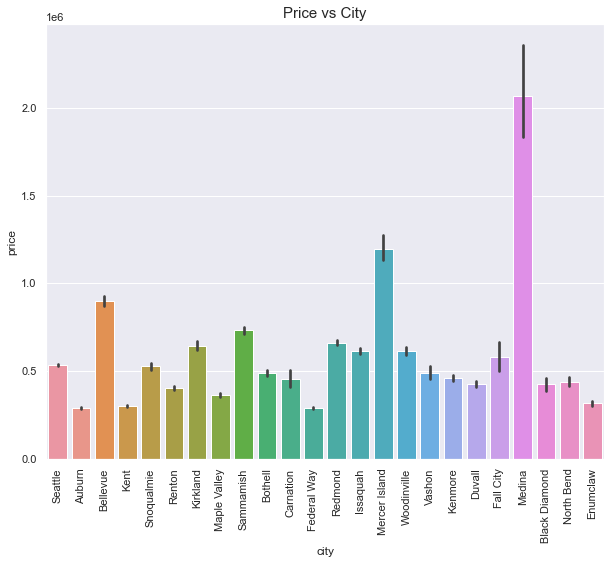

In [146]:
plt.figure(figsize=(10, 8))
print(sns.barplot(House_price['city'],House_price['price']))
plt.title("Price vs City", size=15)
plt.xticks(rotation=90)


In [147]:
BBbox = (House_price['long'].min(),House_price['long'].max(),House_price['lat'].min(),House_price['lat'].max())
BBbox

(-122.519, -121.315, 47.1559, 47.7776)

In [148]:
st_map = plt.imread('map.png')

Text(0.5, 1.0, 'Lat Long vs price Analysis')

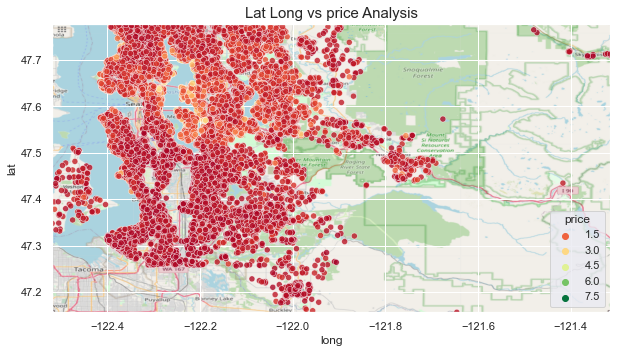

In [149]:
fig,axes = plt.subplots(figsize=(10,8))
sns.scatterplot(x='long',y='lat',data=House_price,alpha = 0.8,palette = 'RdYlGn', hue='price')
axes.set_title('Map Plot of all the properties')
axes.set_xlim(BBbox[0],BBbox[1])
axes.set_ylim(BBbox[2],BBbox[3])
axes.imshow(st_map, zorder=0, extent = BBbox, aspect= 'equal')
plt.title("Lat Long vs price Analysis", size=15)

Text(0.5, 1.0, 'Lat Long vs price Analysis')

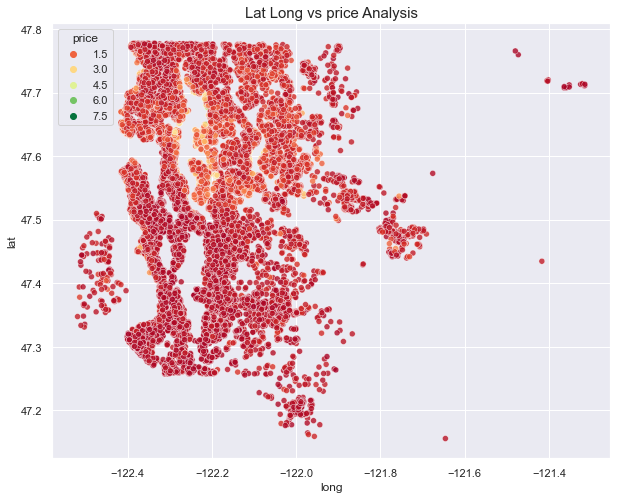

In [150]:
# let's try this one again
plt.figure(figsize=(10,8))
sns.scatterplot(x='long',y='lat',data=House_price,alpha = 0.8,palette = 'RdYlGn', hue='price')
plt.title("Lat Long vs price Analysis", size=15)

In [151]:
Data = House_price.copy()

In [152]:
data.head()

cid   dayhours    price  room_bed  room_bath  living_measure  \
0  7129303070 2014-08-20   735000       4.0       2.75          3040.0   
1  7338220280 2014-10-10   257000       3.0       2.50          1740.0   
2   510002519 2014-07-15   466000       2.0       1.50          1140.0   
3  1624059224 2014-06-18  1160000       4.0       3.50          4680.0   
4  5469503280 2014-07-21   449950       4.0       2.50          3100.0   

   lot_measure  ceil  coast  sight  condition  quality  ceil_measure  \
0       2415.0   2.0    1.0    4.0        3.0      8.0        3040.0   
1       3721.0   2.0    0.0    0.0        3.0      8.0        1740.0   
2       1058.0   3.0    0.0    0.0        3.0      7.0        1140.0   
3       9700.0   2.0    0.0    0.0        3.0     10.0        3360.0   
4      10000.0   2.0    0.0    0.0        3.0      9.0        3100.0   

   basement  yr_built  yr_renovated  zipcode      lat     long  furnished  \
0       0.0    1966.0             0    98118  47.5188 -122.256        0.0   
1       0.0    2009.0             0    98002  47.3363 -122.213        0.0   
2       0.0    2005.0             0    98103  47.6608 -122.333        0.0   
3    1320.0    2005.0             0    98006  47.5703 -122.165        1.0   
4       0.0    1978.0             0    98042  47.3741 -122.150        1.0   

   total_area  having_basement  Is_renovated  Sale_Year  AGE_AT_SALE  \
0      5455.0                0             0       2014         48.0   
1      5461.0                0             0       2014          5.0   
2      2198.0                0             0       2014          9.0   
3     14380.0                1             0       2014          9.0   
4     13100.0                0             0       2014         36.0   

   PRICE_PER_LA  MED_PRICE_ZIP  OVERPRICED    month_year      city state_id  \
0    241.776316       367500.0           1   August-2014   Seattle       WA   
1    147.701149       235000.0           1  October-2014    Auburn       WA   
2    408.771930       550000.0           0     July-2014   Seattle       WA   
3    247.863248       762684.5           1     June-2014  Bellevue       WA   
4    145.145161       292500.0           1     July-2014      Kent       WA   

   state_name  
0  Washington  
1  Washington  
2  Washington  
3  Washington  
4  Washington

In [153]:
#let's break date to years, months
Data['dayhours'] = pd.to_datetime(Data['dayhours'])
Data['month'] = Data['dayhours'].apply(lambda date:date.month)
Data['year'] = Data['dayhours'].apply(lambda date:date.year)
Data.head(5)

cid   dayhours    price  room_bed  room_bath  living_measure  \
0  7129303070 2014-08-20   735000       4.0       2.75          3040.0   
1  7338220280 2014-10-10   257000       3.0       2.50          1740.0   
2   510002519 2014-07-15   466000       2.0       1.50          1140.0   
3  1624059224 2014-06-18  1160000       4.0       3.50          4680.0   
4  5469503280 2014-07-21   449950       4.0       2.50          3100.0   

   lot_measure  ceil  coast  sight  condition  quality  ceil_measure  \
0       2415.0   2.0    1.0    4.0        3.0      8.0        3040.0   
1       3721.0   2.0    0.0    0.0        3.0      8.0        1740.0   
2       1058.0   3.0    0.0    0.0        3.0      7.0        1140.0   
3       9700.0   2.0    0.0    0.0        3.0     10.0        3360.0   
4      10000.0   2.0    0.0    0.0        3.0      9.0        3100.0   

   basement  yr_built  yr_renovated  zipcode      lat     long  furnished  \
0       0.0    1966.0             0    98118  47.5188 -122.256        0.0   
1       0.0    2009.0             0    98002  47.3363 -122.213        0.0   
2       0.0    2005.0             0    98103  47.6608 -122.333        0.0   
3    1320.0    2005.0             0    98006  47.5703 -122.165        1.0   
4       0.0    1978.0             0    98042  47.3741 -122.150        1.0   

   total_area  having_basement  Is_renovated  Sale_Year  AGE_AT_SALE  \
0      5455.0                0             0       2014         48.0   
1      5461.0                0             0       2014          5.0   
2      2198.0                0             0       2014          9.0   
3     14380.0                1             0       2014          9.0   
4     13100.0                0             0       2014         36.0   

   PRICE_PER_LA  MED_PRICE_ZIP  OVERPRICED    month_year      city state_id  \
0    241.776316       367500.0           1   August-2014   Seattle       WA   
1    147.701149       235000.0           1  October-2014    Auburn       WA   
2    408.771930       550000.0           0     July-2014   Seattle       WA   
3    247.863248       762684.5           1     June-2014  Bellevue       WA   
4    145.145161       292500.0           1     July-2014      Kent       WA   

   state_name  month  year  
0  Washington      8  2014  
1  Washington     10  2014  
2  Washington      7  2014  
3  Washington      6  2014  
4  Washington      7  2014

Text(0.5, 1.0, 'House Price vs Sale Month Analysis')

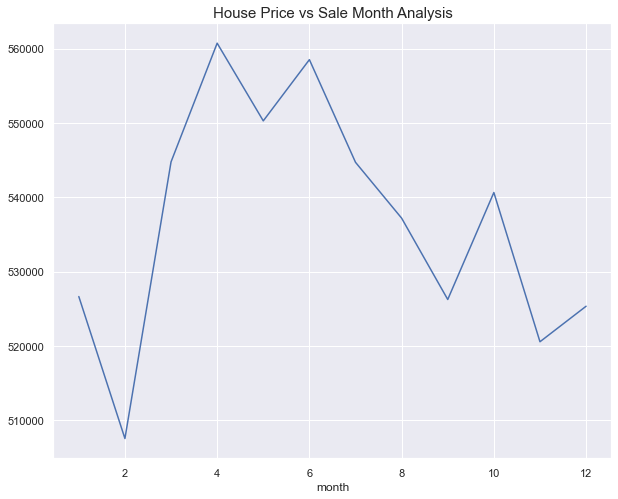

In [154]:
#data visualization house price vs months 
fig = plt.figure(figsize=(10,8))
Data.groupby('month').mean()['price'].plot()
plt.title("House Price vs Sale Month Analysis", size=15)

### DATA PROCESSING

### Outlier Treatment.

In [155]:
House_price.head()

cid   dayhours    price  room_bed  room_bath  living_measure  \
0  7129303070 2014-08-20   735000       4.0       2.75          3040.0   
1  7338220280 2014-10-10   257000       3.0       2.50          1740.0   
2   510002519 2014-07-15   466000       2.0       1.50          1140.0   
3  1624059224 2014-06-18  1160000       4.0       3.50          4680.0   
4  5469503280 2014-07-21   449950       4.0       2.50          3100.0   

   lot_measure  ceil  coast  sight  condition  quality  ceil_measure  \
0       2415.0   2.0    1.0    4.0        3.0      8.0        3040.0   
1       3721.0   2.0    0.0    0.0        3.0      8.0        1740.0   
2       1058.0   3.0    0.0    0.0        3.0      7.0        1140.0   
3       9700.0   2.0    0.0    0.0        3.0     10.0        3360.0   
4      10000.0   2.0    0.0    0.0        3.0      9.0        3100.0   

   basement  yr_built  yr_renovated  zipcode      lat     long  furnished  \
0       0.0    1966.0             0    98118  47.5188 -122.256        0.0   
1       0.0    2009.0             0    98002  47.3363 -122.213        0.0   
2       0.0    2005.0             0    98103  47.6608 -122.333        0.0   
3    1320.0    2005.0             0    98006  47.5703 -122.165        1.0   
4       0.0    1978.0             0    98042  47.3741 -122.150        1.0   

   total_area  having_basement  Is_renovated  Sale_Year  AGE_AT_SALE  \
0      5455.0                0             0       2014         48.0   
1      5461.0                0             0       2014          5.0   
2      2198.0                0             0       2014          9.0   
3     14380.0                1             0       2014          9.0   
4     13100.0                0             0       2014         36.0   

   PRICE_PER_LA  MED_PRICE_ZIP  OVERPRICED    month_year      city state_id  \
0    241.776316       367500.0           1   August-2014   Seattle       WA   
1    147.701149       235000.0           1  October-2014    Auburn       WA   
2    408.771930       550000.0           0     July-2014   Seattle       WA   
3    247.863248       762684.5           1     June-2014  Bellevue       WA   
4    145.145161       292500.0           1     July-2014      Kent       WA   

   state_name  
0  Washington  
1  Washington  
2  Washington  
3  Washington  
4  Washington

In [156]:
features = ['living_measure', 'lot_measure', 'ceil_measure', 'basement', 'total_area']
features

['living_measure', 'lot_measure', 'ceil_measure', 'basement', 'total_area']

In [157]:
import scipy.stats as stats

### Winsorizing outliers - Capping using Percentile method - 95%

In [163]:
House_price = House_price.copy()

In [164]:
def percentile_capping(df, cols, from_low_end, from_high_end):
    
    for col in cols:
        
#         lower_bound = df[col].quantile(from_low_end)
#         upper_bound = df[col].quantile(1-from_high_end)
        
#         df[col] = np.where(df[col]>upper_bound, upper_bound,
#                  np.where(df[col]<lower_bound, lower_bound, df[col]))

        stats.mstats.winsorize(a=df[col], limits=(from_low_end, from_high_end), inplace=True)

In [165]:
# fourth argument of 0.01 from right end is equivalent to saying
# 1-0.01 = 0.99 quantile from the left end
percentile_capping(House_price, features, 0.05, 0.05)

In [166]:
House_price.describe()

cid         price      room_bed     room_bath  living_measure  \
count  2.128800e+04  2.128800e+04  21288.000000  21288.000000    21288.000000   
mean   4.577499e+09  5.399826e+05      3.370678      2.114395     2026.484686   
std    2.876915e+09  3.656028e+05      0.930123      0.768666      731.451403   
min    1.000102e+06  7.500000e+04      0.000000      0.000000     1000.000000   
25%    2.122049e+09  3.210202e+05      3.000000      1.750000     1460.000000   
50%    3.904921e+09  4.500000e+05      3.000000      2.250000     1890.000000   
75%    7.305300e+09  6.450000e+05      4.000000      2.500000     2490.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000     3650.000000   

        lot_measure          ceil         coast         sight     condition  \
count  21288.000000  21288.000000  21288.000000  21288.000000  21288.000000   
mean   10325.813839      1.494927      0.007469      0.234216      3.409245   
std     9463.527338      0.540485      0.086102      0.765875      0.650538   
min     1831.000000      1.000000      0.000000      0.000000      1.000000   
25%     5086.000000      1.000000      0.000000      0.000000      3.000000   
50%     7628.000000      1.500000      0.000000      0.000000      3.000000   
75%    10450.000000      2.000000      0.000000      0.000000      4.000000   
max    41458.000000      3.500000      1.000000      4.000000      5.000000   

            quality  ceil_measure      basement      yr_built  yr_renovated  \
count  21288.000000  21288.000000  21288.000000  21288.000000  21288.000000   
mean       7.657976   1749.817254    264.670838   1971.034526     83.721768   
std        1.176386    690.693385    379.221593     29.388167    400.127640   
min        1.000000    860.000000      0.000000   1900.000000      0.000000   
25%        7.000000   1210.000000      0.000000   1951.000000      0.000000   
50%        7.000000   1570.000000      0.000000   1975.000000      0.000000   
75%        8.000000   2180.000000    540.000000   1997.000000      0.000000   
max       13.000000   3290.000000   1120.000000   2015.000000   2015.000000   

            zipcode           lat          long     furnished    total_area  \
count  21288.000000  21288.000000  21288.000000  21288.000000  21288.000000   
mean   98077.916808     47.559996   -122.213851      0.197059  12390.136368   
std       53.514731      0.138578      0.140867      0.397787   9772.743947   
min    98001.000000     47.155900   -122.519000      0.000000   3340.000000   
25%    98033.000000     47.470675   -122.328000      0.000000   7027.000000   
50%    98065.000000     47.571700   -122.230000      0.000000   9545.000000   
75%    98118.000000     47.677925   -122.125000      0.000000  12740.000000   
max    98199.000000     47.777600   -121.315000      1.000000  44213.000000   

       having_basement  Is_renovated     Sale_Year   AGE_AT_SALE  \
count     21288.000000  21288.000000  21288.000000  21288.000000   
mean          0.391911      0.041949   2014.323046     40.930101   
std           0.488188      0.200476      0.467651     28.838152   
min           0.000000      0.000000   2014.000000     -1.000000   
25%           0.000000      0.000000   2014.000000     15.000000   
50%           0.000000      0.000000   2014.000000     37.000000   
75%           1.000000      0.000000   2015.000000     60.000000   
max           1.000000      1.000000   2015.000000    115.000000   

       PRICE_PER_LA  MED_PRICE_ZIP    OVERPRICED  
count  21288.000000   2.128800e+04  21288.000000  
mean     265.258091   4.855110e+05      0.496477  
std      115.608330   1.967468e+05      0.499999  
min       51.351351   2.350000e+05      0.000000  
25%      182.260255   3.349750e+05      0.000000  
50%      244.467364   4.450000e+05      0.000000  
75%      318.707140   5.687500e+05      1.000000  
max     1666.666667   1.880000e+06      1.000000

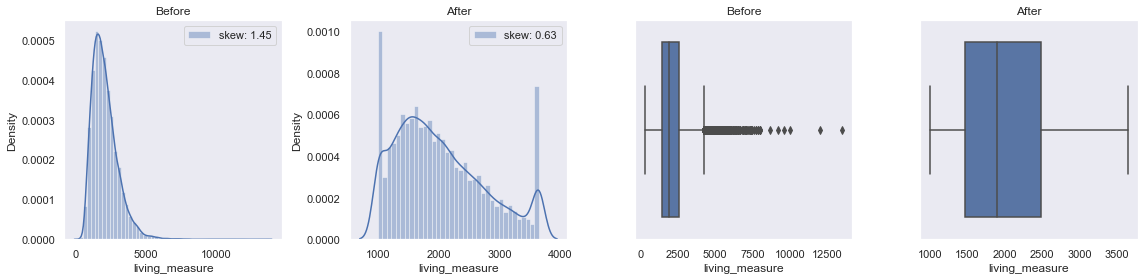

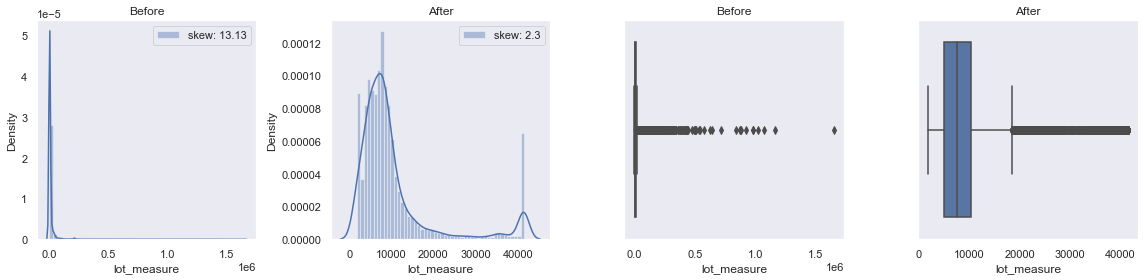

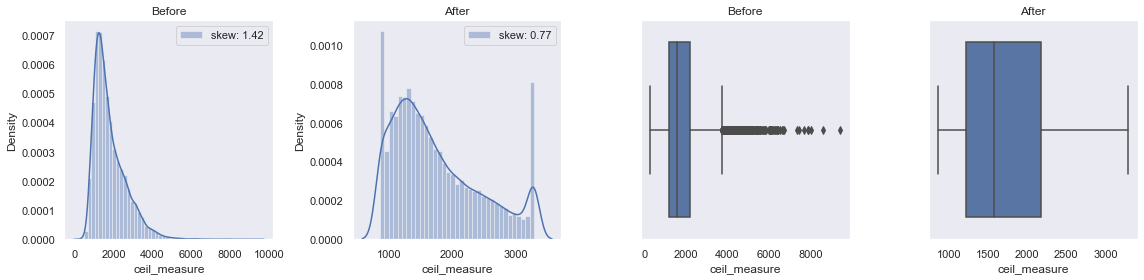

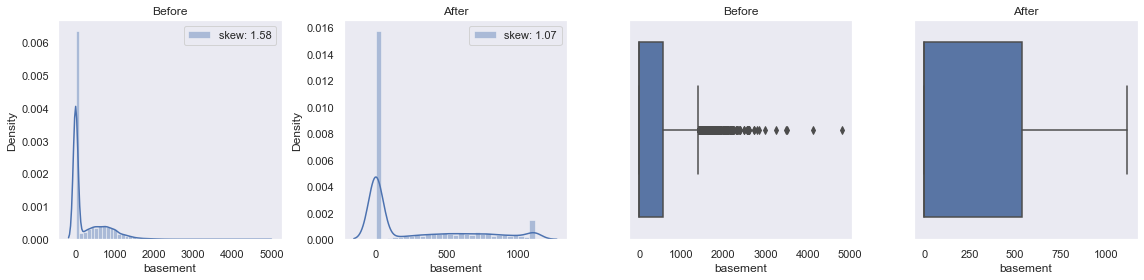

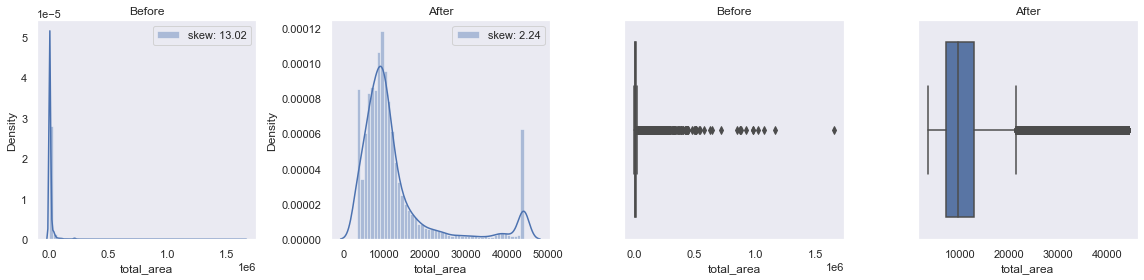

In [167]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(House_price[col], label="skew: " + str(np.round(House_price[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(House_price[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [168]:
House_price['basement'].unique()

array([   0.        , 1120.        ,  480.        , ...,  493.85185185,
        818.58657244,  508.36820084])

In [169]:
House_price.shape

(21288, 32)

In [170]:
House_price.shape

(21288, 32)

In [171]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range,upper_range

Using the above function, lets get the lowerbound and upperbound values

### checking outliers for Variable - room_bed

In [172]:
lower_range_bed,Upper_range_bed = outlier_treatment(House_price.room_bed)
print(lower_range_bed,Upper_range_bed)

1.5 5.5


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

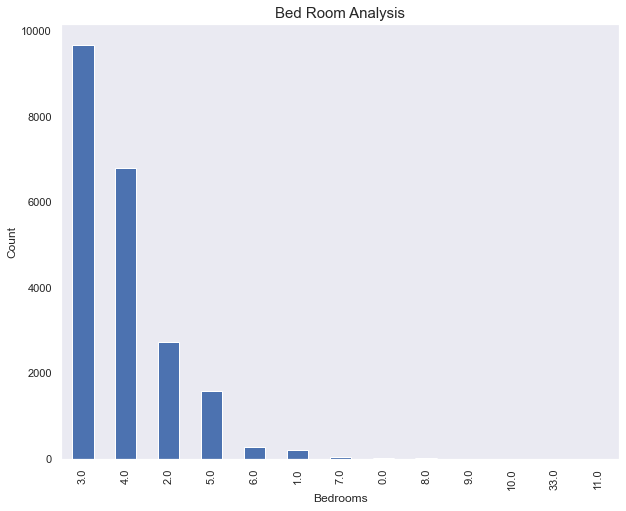

In [173]:
plt.figure(figsize=(10,8))
House_price['room_bed'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.title("Bed Room Analysis", size=15)
sns.despine

Basis Upper Bond & Lower Bond we can see that 1.5 to 5.5 is limit. Wheras as per box plot we can see that there are properties ranging from 1 bed rooms to 33 bed rooms. Lets see how many properties are there with above 6 bedrooms.

In [174]:
House_price[(House_price.room_bed > 8)].shape

(11, 32)

As There are 11 rows with more than 6 bedrooms. We will go ahead with them.

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

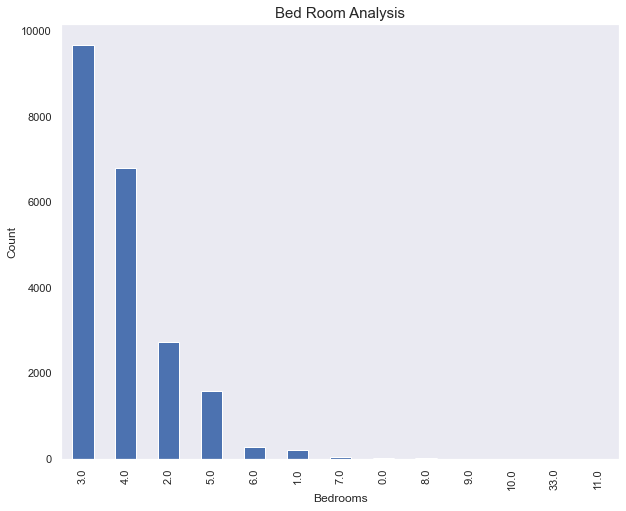

In [175]:
plt.figure(figsize=(10,8))
House_price['room_bed'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.title("Bed Room Analysis", size=15)
sns.despine

In [176]:
House_price.drop(House_price[ (House_price.room_bed > 6) ].index, inplace=True)

### checking outliers for Variable - room_bath

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

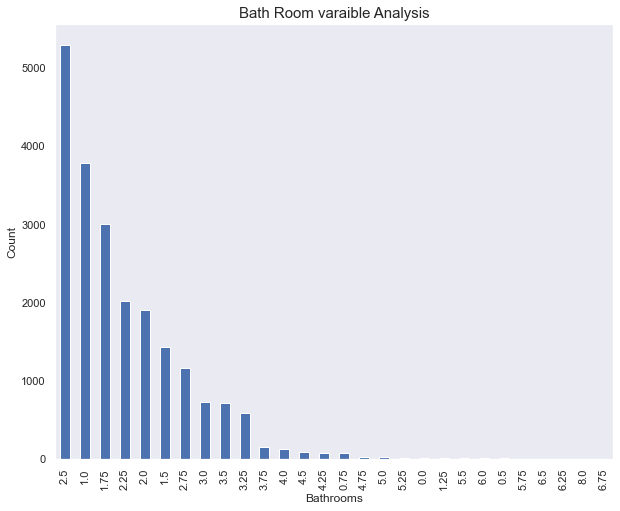

In [177]:
plt.figure(figsize=(10,8))
House_price['room_bath'].value_counts().plot(kind='bar')
plt.title('number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.title("Bath Room varaible Analysis", size=15)
sns.despine

In [178]:
House_price[(House_price.room_bath > 5)].shape

(34, 32)

we can see that there are 56 rows of data which have bath rooms above 4. And since we have highest 8 no of bath rooms. We will go ahead the way it is without treating / dropping varaibles. 

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

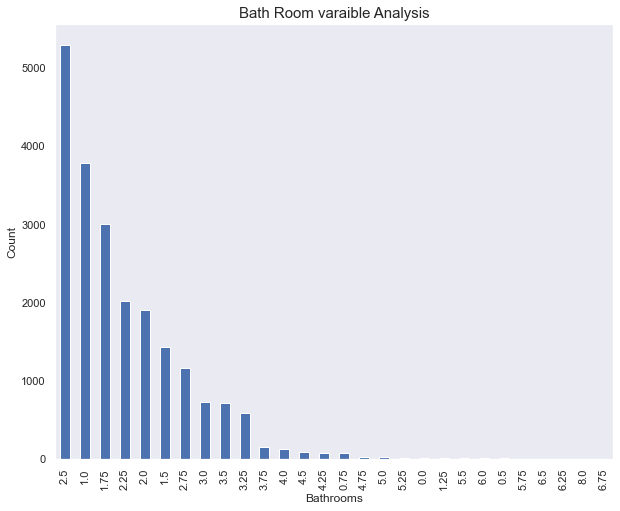

In [179]:
plt.figure(figsize=(10,8))
House_price['room_bath'].value_counts().plot(kind='bar')
plt.title('number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.title("Bath Room varaible Analysis", size=15)
sns.despine

In [180]:
House_price.shape

(21227, 32)

In [181]:
df.shape

(21288, 23)

In [182]:
(21193-17438)*100/21193

17.71811447175954

Post Cleaning the the dataset we have lost 17.71% of data. 

## Clustering

In [183]:
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
sns.set(color_codes=True)
%matplotlib inline 
sns.set_palette("deep")


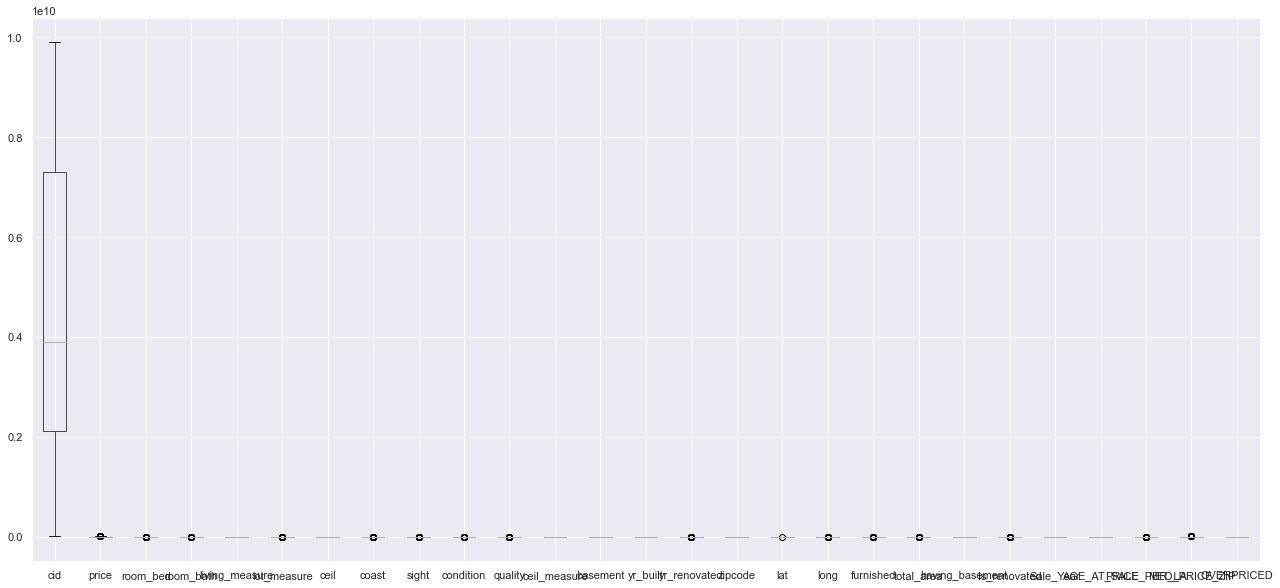

In [184]:
plt.figure(figsize=(22,10))
House_price.boxplot();

Post viewing the data it was identified that all the Variables are not on the same scale. We need to Scale the data.

In [185]:
from scipy.stats import zscore

In this step we are importing the Standard Scaler function to scale the data (Computing Z Scores) StandardScaler scales the data by subtracting the observation from the mean of the variable and dividing it by the standard deviation of the variable.

# z = $\frac{(x - \mu)}{\sigma}$

###### Note: All the symbols follow the usual nomeclature.

In [186]:
df_HP2 = House_price[['price', 'room_bed', 'living_measure', 'lot_measure', 'ceil','coast', 'sight', 'condition', 'quality', 'ceil_measure', 'basement',
      'zipcode','furnished', 'total_area','AGE_AT_SALE', 'room_bath', 'PRICE_PER_LA','OVERPRICED']]
df_HP2.head()

price  room_bed  living_measure  lot_measure  ceil  coast  sight  \
0   735000       4.0          3040.0       2415.0   2.0    1.0    4.0   
1   257000       3.0          1740.0       3721.0   2.0    0.0    0.0   
2   466000       2.0          1140.0       1831.0   3.0    0.0    0.0   
3  1160000       4.0          3650.0       9700.0   2.0    0.0    0.0   
4   449950       4.0          3100.0      10000.0   2.0    0.0    0.0   

   condition  quality  ceil_measure  basement  zipcode  furnished  total_area  \
0        3.0      8.0        3040.0       0.0    98118        0.0      5455.0   
1        3.0      8.0        1740.0       0.0    98002        0.0      5461.0   
2        3.0      7.0        1140.0       0.0    98103        0.0      3340.0   
3        3.0     10.0        3290.0    1120.0    98006        1.0     14380.0   
4        3.0      9.0        3100.0       0.0    98042        1.0     13100.0   

   AGE_AT_SALE  room_bath  PRICE_PER_LA  OVERPRICED  
0         48.0       2.75    241.776316           1  
1          5.0       2.50    147.701149           1  
2          9.0       1.50    408.771930           0  
3          9.0       3.50    247.863248           1  
4         36.0       2.50    145.145161           1

In [187]:
data_scaled = df_HP2.apply(zscore)
data_scaled.head()

price  room_bed  living_measure  lot_measure      ceil      coast  \
0  0.540012  0.731293        1.392868    -0.835686  0.936166  11.511001   
1 -0.775407 -0.406518       -0.388781    -0.697666  0.936166  -0.086873   
2 -0.200255 -1.544330       -1.211081    -0.897403  2.787047  -0.086873   
3  1.709579  0.731293        2.228872    -0.065800  0.936166  -0.086873   
4 -0.244423  0.731293        1.475098    -0.034096  0.936166  -0.086873   

      sight  condition   quality  ceil_measure  basement   zipcode  furnished  \
0  4.921702  -0.629003  0.292523      1.873454 -0.696689  0.749291  -0.494886   
1 -0.305475  -0.629003  0.292523     -0.011528 -0.696689 -1.417983  -0.494886   
2 -0.305475  -0.629003 -0.558544     -0.881521 -0.696689  0.469040  -0.494886   
3 -0.305475  -0.629003  1.994658      2.235951  2.263472 -1.343250   2.020667   
4 -0.305475  -0.629003  1.143591      1.960454 -0.696689 -0.670647   2.020667   

   total_area  AGE_AT_SALE  room_bath  PRICE_PER_LA  OVERPRICED  
0   -0.709052     0.246332   0.840025     -0.203131    1.008373  
1   -0.708438    -1.245731   0.511901     -1.017082    1.008373  
2   -0.925506    -1.106935  -0.800592      1.241738   -0.991696  
3    0.204351    -1.106935   1.824394     -0.150466    1.008373  
4    0.073353    -0.170058   0.511901     -1.039197    1.008373

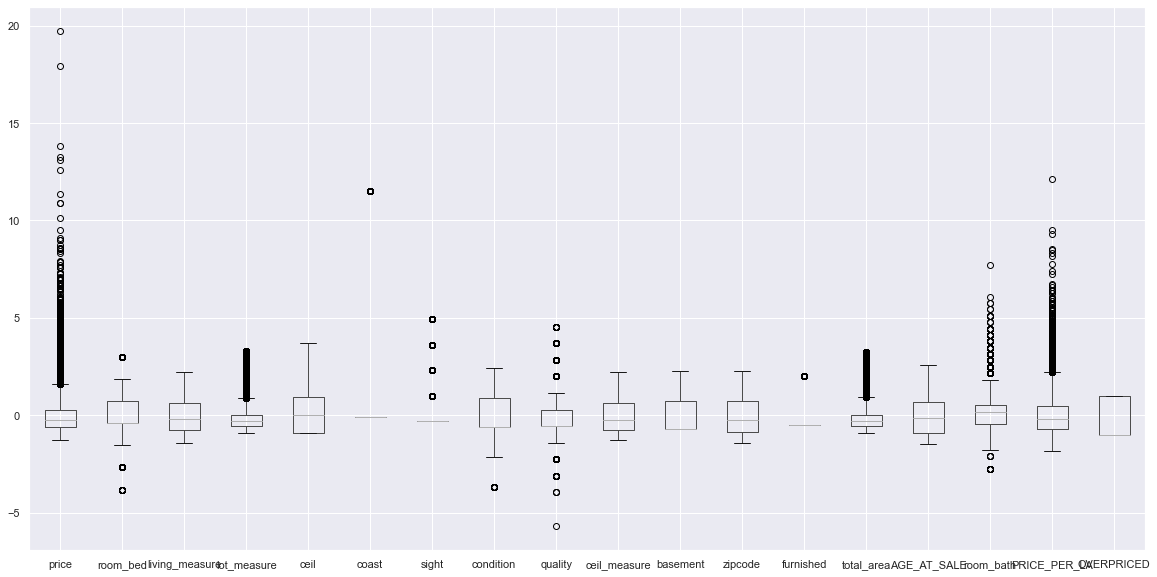

In [188]:
plt.figure(figsize=(20,10))
data_scaled.boxplot();

In K-Means Clustering we have to choose the value of 'K' very accurately by looking at the Within Sum of Squares (WSS).

Since we have already scaled the data above, let us go ahead and perform the K-Means Clustering.

Since we do not know the value of 'K' i.e. the opitmum number of clusters we will start with 2 clusters and check the Within Sum of Squares (WSS).

The 'inertia' gives us the Within Sum of Squares (WSS) for the number of clusters defined in the KMeans function inside the 'sklearn' library.


Let us now check the WSS for 2 clusters

In [189]:
k_means = KMeans(n_clusters = 2)
k_means.fit(data_scaled)
k_means.inertia_

297247.27674621035

Let us now check the WSS for 3 clusters.

In [190]:
k_means = KMeans(n_clusters = 3)
k_means.fit(data_scaled)
k_means.inertia_

267277.74857153586

In [191]:
k_means = KMeans(n_clusters = 4)
k_means.fit(data_scaled)
k_means.inertia_

243573.03569497092

Now, we see that the WSS is decreasing. But it is very cumbersome to manually compute for each value. So, we are going to pass the KMeans function through a loop to automate this process of manually calculating the 'inertia'.

Let us define an empty list to being the process of automating the calculation of 'inertia'.

In [192]:
wss = []
for i in range(2,11):
    km_model = KMeans(n_clusters= i )
    km_model.fit(data_scaled)
    wss.append(km_model.inertia_)
 

Now, let us print 'wss' and check the values.

In [193]:
for i in range(2,11):
    print('The wss value for',i,'clusters is',wss[i-2])

The wss value for 2 clusters is 297247.3545748135
The wss value for 3 clusters is 267277.4931432836
The wss value for 4 clusters is 242559.8920380564
The wss value for 5 clusters is 220914.65704970644
The wss value for 6 clusters is 199817.28986028375
The wss value for 7 clusters is 189007.91104370606
The wss value for 8 clusters is 178497.51293832815
The wss value for 9 clusters is 171844.38316811147
The wss value for 10 clusters is 163000.58121109568


There are some other techniques from which can be used to find the approximate or optimal value of k.

### Elbow method -

## It is most popular and well-known method to find the optimal no. of clusters or the value of k in the process of clustering.This method is based of plotting the value of cost function against different values of k. As the number of clusters (k) increase lesser number of points fall within clusters or around the centroids.Hence the average distortion decreases with the increase of number of clusters. The point where the distortion declines most is said to be the elbow pointand define the optimal number of clusters for dataset.

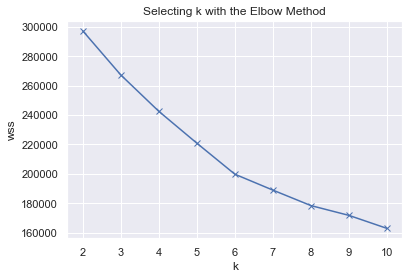

In [194]:
plt.plot(range(2,11), wss, 'bx-')
plt.xlabel('k')
plt.ylabel('wss')
plt.title('Selecting k with the Elbow Method');

The ideal 'WSS' plot has to have a sharp elbow like structure. The number of clusters corresponding to that elbow-like graph is considered to be the most optimum.

Insights - As it is clear from above figure, the distortion declines most at 2. Hence the optimal value of k will be 2 for performing the clustering. In other words, the plot looks as an arm with anelbow at k = 2. Having said that, here we will go for 4 clusters.

### Silhouette Method -

### Silhouette is a different method to determine optimal number of clusters for given dataset. It defines as a coefficient of measureof how similar an observation to its own cluster compared to that of other clusters. The range of silhouette coefficient varies between -1 to 1.1 value indicate that an observation is far from its neighbouring cluster and close to its own whereas -1 denotes that an observation is close to neighbouring cluster than its own cluster. The 0 value indicate the presence of observation on boundary of two clusters

In [195]:
from sklearn.metrics import silhouette_score

In [196]:
for i in range(2,11):
    km_model = KMeans(n_clusters= i,random_state = 42)
    y=km_model.fit_predict(data_scaled)     
    s =silhouette_score(data_scaled, y)
    print("silhouette =",s, "for i=", i)   

silhouette = 0.27267175094637164 for i= 2
silhouette = 0.1462437788602991 for i= 3
silhouette = 0.16677714877463035 for i= 4
silhouette = 0.17815824031100208 for i= 5
silhouette = 0.188178624099467 for i= 6
silhouette = 0.16346963146264443 for i= 7
silhouette = 0.1685756666304125 for i= 8
silhouette = 0.16575023491028323 for i= 9
silhouette = 0.16774440520644326 for i= 10


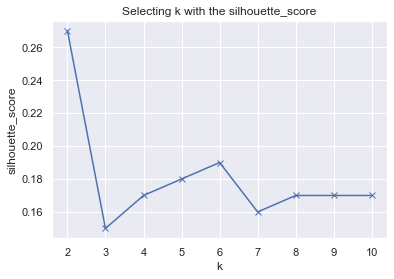

In [197]:
score = []

for i in range(2,11):
    km_model = KMeans(n_clusters= i,random_state = 42 )
    km_model.fit(data_scaled)
    score.append(round(silhouette_score(data_scaled, km_model.labels_),2))

plt.plot(range(2,11), score, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Selecting k with the silhouette_score');

Insights - From above Silhouette Method it was identified that 0.297 is highest Silhouette score for K=2. Whereas as per Elbow method the distortion declines most at 2. Hence, we will go ahead try with  3 or 4 clusters.

In [198]:
k_means = KMeans(n_clusters = 2)
k_means.fit(data_scaled)
labels = k_means.labels_

In [199]:
df_HP2["Clus_kmeans"] = labels
df_HP2.head()

price  room_bed  living_measure  lot_measure  ceil  coast  sight  \
0   735000       4.0          3040.0       2415.0   2.0    1.0    4.0   
1   257000       3.0          1740.0       3721.0   2.0    0.0    0.0   
2   466000       2.0          1140.0       1831.0   3.0    0.0    0.0   
3  1160000       4.0          3650.0       9700.0   2.0    0.0    0.0   
4   449950       4.0          3100.0      10000.0   2.0    0.0    0.0   

   condition  quality  ceil_measure  basement  zipcode  furnished  total_area  \
0        3.0      8.0        3040.0       0.0    98118        0.0      5455.0   
1        3.0      8.0        1740.0       0.0    98002        0.0      5461.0   
2        3.0      7.0        1140.0       0.0    98103        0.0      3340.0   
3        3.0     10.0        3290.0    1120.0    98006        1.0     14380.0   
4        3.0      9.0        3100.0       0.0    98042        1.0     13100.0   

   AGE_AT_SALE  room_bath  PRICE_PER_LA  OVERPRICED  Clus_kmeans  
0         48.0       2.75    241.776316           1            0  
1          5.0       2.50    147.701149           1            1  
2          9.0       1.50    408.771930           0            1  
3          9.0       3.50    247.863248           1            0  
4         36.0       2.50    145.145161           1            0

In [200]:
df_clust = df_HP2.groupby('Clus_kmeans').mean()
df_clust = df_clust.reset_index()
df_clust

Clus_kmeans          price  room_bed  living_measure   lot_measure  \
0            0  847449.206603  3.906015     2877.333279  15279.466002   
1            1  413777.099477  3.135085     1678.013171   8315.485737   

       ceil     coast     sight  condition   quality  ceil_measure  \
0  1.848562  0.021576  0.534161   3.255639  8.977771   2561.826824   
1  1.350718  0.001787  0.112119   3.471242  7.121186   1418.392618   

     basement       zipcode  furnished    total_area  AGE_AT_SALE  room_bath  \
0  291.014833  98060.581890   0.666721  18228.578620    22.972703   2.800384   
1  252.495706  98084.906016   0.006420  10016.347938    48.160500   1.830416   

   PRICE_PER_LA  OVERPRICED  
0    284.079504    0.911572  
1    257.630927    0.327487

In [201]:
cluster_freq = df_HP2['Clus_kmeans'].value_counts().sort_index()
cluster_freq

0     6118
1    15109
Name: Clus_kmeans, dtype: int64

In [202]:
df_clust['Frequency'] = cluster_freq.values
round(df_clust,0)

Clus_kmeans     price  room_bed  living_measure  lot_measure  ceil  coast  \
0            0  847449.0       4.0          2877.0      15279.0   2.0    0.0   
1            1  413777.0       3.0          1678.0       8315.0   1.0    0.0   

   sight  condition  quality  ceil_measure  basement  zipcode  furnished  \
0    1.0        3.0      9.0        2562.0     291.0  98061.0        1.0   
1    0.0        3.0      7.0        1418.0     252.0  98085.0        0.0   

   total_area  AGE_AT_SALE  room_bath  PRICE_PER_LA  OVERPRICED  Frequency  
0     18229.0         23.0        3.0         284.0         1.0       6118  
1     10016.0         48.0        2.0         258.0         0.0      15109

### Silhouette Score
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

### Silhouette Width / Silhouette Sample
the silhouette width is also an estimate of the average distance between clusters. Its value is comprised between 1 and -1 with a value of 1 indicating a very good cluster.

In [203]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [204]:
silhouette_score(data_scaled,k_means.labels_)

0.2723901118331976

In [205]:
sil_width = silhouette_samples(data_scaled,labels)

In [206]:
df_HP2["sil_width"] = sil_width
df_HP2.head()

price  room_bed  living_measure  lot_measure  ceil  coast  sight  \
0   735000       4.0          3040.0       2415.0   2.0    1.0    4.0   
1   257000       3.0          1740.0       3721.0   2.0    0.0    0.0   
2   466000       2.0          1140.0       1831.0   3.0    0.0    0.0   
3  1160000       4.0          3650.0       9700.0   2.0    0.0    0.0   
4   449950       4.0          3100.0      10000.0   2.0    0.0    0.0   

   condition  quality  ceil_measure  basement  zipcode  furnished  total_area  \
0        3.0      8.0        3040.0       0.0    98118        0.0      5455.0   
1        3.0      8.0        1740.0       0.0    98002        0.0      5461.0   
2        3.0      7.0        1140.0       0.0    98103        0.0      3340.0   
3        3.0     10.0        3290.0    1120.0    98006        1.0     14380.0   
4        3.0      9.0        3100.0       0.0    98042        1.0     13100.0   

   AGE_AT_SALE  room_bath  PRICE_PER_LA  OVERPRICED  Clus_kmeans  sil_width  
0         48.0       2.75    241.776316           1            0   0.024802  
1          5.0       2.50    147.701149           1            1   0.203221  
2          9.0       1.50    408.771930           0            1   0.302764  
3          9.0       3.50    247.863248           1            0   0.291796  
4         36.0       2.50    145.145161           1            0   0.228763

In [207]:
silhouette_samples(data_scaled,labels).min()

-0.1284531699144635

In [208]:
silhouette_samples(data_scaled,labels).max()

0.49243250994404464

In [209]:
Df_Cluster_names = round(df_clust,0).rename(index={0: "Emerging Micro-Market", 1: "Established Micro market"})
Df_Cluster_names


Clus_kmeans     price  room_bed  living_measure  \
Emerging Micro-Market               0  847449.0       4.0          2877.0   
Established Micro market            1  413777.0       3.0          1678.0   

                          lot_measure  ceil  coast  sight  condition  quality  \
Emerging Micro-Market         15279.0   2.0    0.0    1.0        3.0      9.0   
Established Micro market       8315.0   1.0    0.0    0.0        3.0      7.0   

                          ceil_measure  basement  zipcode  furnished  \
Emerging Micro-Market           2562.0     291.0  98061.0        1.0   
Established Micro market        1418.0     252.0  98085.0        0.0   

                          total_area  AGE_AT_SALE  room_bath  PRICE_PER_LA  \
Emerging Micro-Market        18229.0         23.0        3.0         284.0   
Established Micro market     10016.0         48.0        2.0         258.0   

                          OVERPRICED  Frequency  
Emerging Micro-Market            1.0       6118  
Established Micro market         0.0      15109

In [210]:
mapper = {0 : 'Emerging Micro Market', 1 : 'Established Micro market'}
df_HP2['Clus_kmeans'] = df_HP2['Clus_kmeans'].map(mapper)
df_HP2.head()

price  room_bed  living_measure  lot_measure  ceil  coast  sight  \
0   735000       4.0          3040.0       2415.0   2.0    1.0    4.0   
1   257000       3.0          1740.0       3721.0   2.0    0.0    0.0   
2   466000       2.0          1140.0       1831.0   3.0    0.0    0.0   
3  1160000       4.0          3650.0       9700.0   2.0    0.0    0.0   
4   449950       4.0          3100.0      10000.0   2.0    0.0    0.0   

   condition  quality  ceil_measure  basement  zipcode  furnished  total_area  \
0        3.0      8.0        3040.0       0.0    98118        0.0      5455.0   
1        3.0      8.0        1740.0       0.0    98002        0.0      5461.0   
2        3.0      7.0        1140.0       0.0    98103        0.0      3340.0   
3        3.0     10.0        3290.0    1120.0    98006        1.0     14380.0   
4        3.0      9.0        3100.0       0.0    98042        1.0     13100.0   

   AGE_AT_SALE  room_bath  PRICE_PER_LA  OVERPRICED               Clus_kmeans  \
0         48.0       2.75    241.776316           1     Emerging Micro Market   
1          5.0       2.50    147.701149           1  Established Micro market   
2          9.0       1.50    408.771930           0  Established Micro market   
3          9.0       3.50    247.863248           1     Emerging Micro Market   
4         36.0       2.50    145.145161           1     Emerging Micro Market   

   sil_width  
0   0.024802  
1   0.203221  
2   0.302764  
3   0.291796  
4   0.228763

Text(0.5, 1.0, 'Micro-Market vs Price')

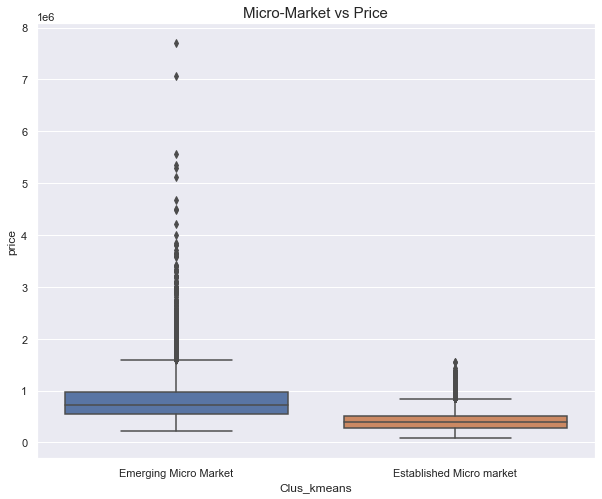

In [211]:
fig,axes = plt.subplots(figsize=(10,8))
sns.boxplot(x='Clus_kmeans',y='price',data=df_HP2)
plt.title("Micro-Market vs Price", size=15)



Text(0.5, 1.0, 'Micro-Market vs living_measure')

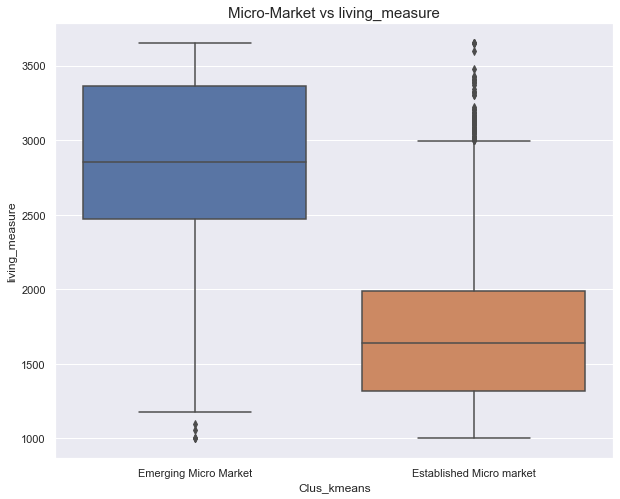

In [212]:
fig,axes = plt.subplots(figsize=(10,8))
sns.boxplot(x='Clus_kmeans',y='living_measure',data=df_HP2)
plt.title("Micro-Market vs living_measure", size=15)


Text(0.5, 1.0, 'Micro-Market vs Quality')

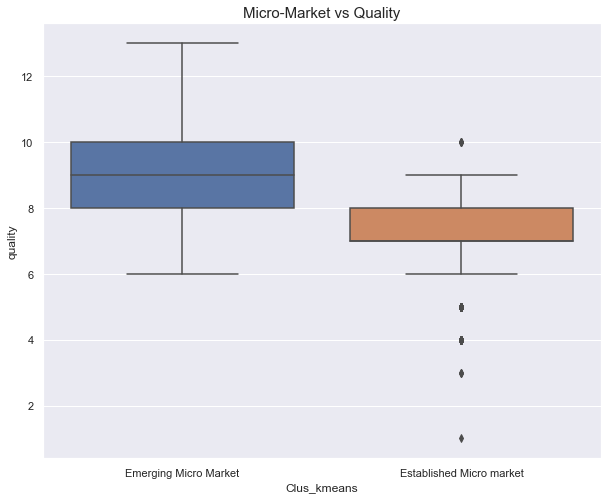

In [213]:
fig,axes = plt.subplots(figsize=(10,8))
sns.boxplot(x='Clus_kmeans',y='quality',data=df_HP2)
plt.title("Micro-Market vs Quality", size=15)


Text(0.5, 1.0, 'Micro-Market vs Number of bathrooms')

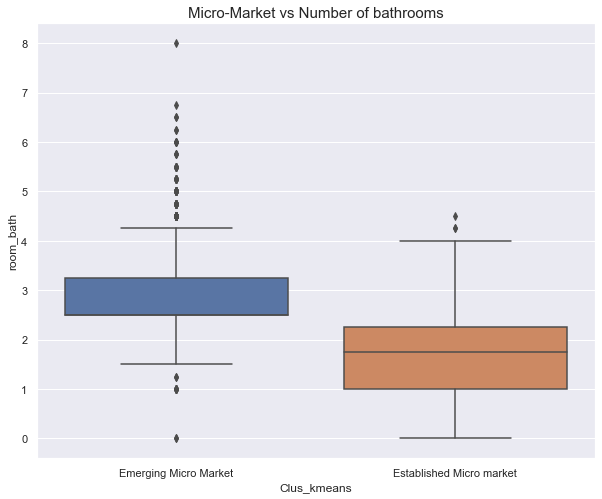

In [214]:
fig,axes = plt.subplots(figsize=(10,8))
sns.boxplot(x='Clus_kmeans',y='room_bath',data=df_HP2)
plt.title("Micro-Market vs Number of bathrooms", size=15)


Since the smallest value of silhouette width is -0.20844 this indicates that some observation are  incorrectly mapped to a cluster. Since Some silhoutte width scores are negative. Hence we can say that not all the clusters are correctly mapped.

### Silhouette width can be interpreted as follow:

•	Observations with a large Si (almost 1) are very well clustered.

•	A small Si (around 0) means that the observation lies between two clusters.

•	Observations with a negative Si are probably placed in the wrong cluster.



## Linear Regression

In [215]:
House_price.head()

cid   dayhours    price  room_bed  room_bath  living_measure  \
0  7129303070 2014-08-20   735000       4.0       2.75          3040.0   
1  7338220280 2014-10-10   257000       3.0       2.50          1740.0   
2   510002519 2014-07-15   466000       2.0       1.50          1140.0   
3  1624059224 2014-06-18  1160000       4.0       3.50          3650.0   
4  5469503280 2014-07-21   449950       4.0       2.50          3100.0   

   lot_measure  ceil  coast  sight  condition  quality  ceil_measure  \
0       2415.0   2.0    1.0    4.0        3.0      8.0        3040.0   
1       3721.0   2.0    0.0    0.0        3.0      8.0        1740.0   
2       1831.0   3.0    0.0    0.0        3.0      7.0        1140.0   
3       9700.0   2.0    0.0    0.0        3.0     10.0        3290.0   
4      10000.0   2.0    0.0    0.0        3.0      9.0        3100.0   

   basement  yr_built  yr_renovated  zipcode      lat     long  furnished  \
0       0.0    1966.0             0    98118  47.5188 -122.256        0.0   
1       0.0    2009.0             0    98002  47.3363 -122.213        0.0   
2       0.0    2005.0             0    98103  47.6608 -122.333        0.0   
3    1120.0    2005.0             0    98006  47.5703 -122.165        1.0   
4       0.0    1978.0             0    98042  47.3741 -122.150        1.0   

   total_area  having_basement  Is_renovated  Sale_Year  AGE_AT_SALE  \
0      5455.0                0             0       2014         48.0   
1      5461.0                0             0       2014          5.0   
2      3340.0                0             0       2014          9.0   
3     14380.0                1             0       2014          9.0   
4     13100.0                0             0       2014         36.0   

   PRICE_PER_LA  MED_PRICE_ZIP  OVERPRICED    month_year      city state_id  \
0    241.776316       367500.0           1   August-2014   Seattle       WA   
1    147.701149       235000.0           1  October-2014    Auburn       WA   
2    408.771930       550000.0           0     July-2014   Seattle       WA   
3    247.863248       762684.5           1     June-2014  Bellevue       WA   
4    145.145161       292500.0           1     July-2014      Kent       WA   

   state_name  
0  Washington  
1  Washington  
2  Washington  
3  Washington  
4  Washington

In [216]:
House_price.tail(5)

cid   dayhours    price  room_bed  room_bath  living_measure  \
21283  6151800300 2015-02-13   625000       3.0       1.75          2260.0   
21284  6738700205 2015-05-05  1120000       4.0       3.50          2340.0   
21285  7663700030 2015-05-03  1180000       2.0       2.50          2410.0   
21286  1823069046 2015-04-20   250000       3.0       1.50          2430.0   
21287  1953400045 2015-04-23   385000       4.0       3.00          1786.0   

       lot_measure  ceil  coast  sight  condition  quality  ceil_measure  \
21283      17494.0   1.0    0.0    0.0        4.0      7.0   1766.148148   
21284       4000.0   1.5    0.0    0.0        3.0      7.0   1521.413428   
21285      10476.0   2.0    1.0    4.0        3.0      8.0   2410.000000   
21286      23958.0   1.0    0.0    0.0        2.0      7.0   1921.631799   
21287       9052.0   2.0    0.0    0.0        3.0      7.0   1786.000000   

         basement  yr_built  yr_renovated  zipcode      lat     long  \
21283  493.851852    1948.0          1983    98010  47.3397 -122.048   
21284  818.586572    1919.0          2014    98144  47.5842 -122.292   
21285    0.000000    1957.0          2004    98155  47.7345 -122.285   
21286  508.368201    1938.0          1968    98059  47.4754 -122.090   
21287    0.000000    1957.0          2014    98198  47.3935 -122.300   

       furnished  total_area  having_basement  Is_renovated  Sale_Year  \
21283        0.0     19754.0                1             1       2015   
21284        0.0      6340.0                1             1       2015   
21285        0.0     12886.0                0             1       2015   
21286        0.0     26388.0                1             1       2015   
21287        0.0     10838.0                0             1       2015   

       AGE_AT_SALE  PRICE_PER_LA  MED_PRICE_ZIP  OVERPRICED     month_year  \
21283         32.0    276.548673       360000.0           1  February-2015   
21284          1.0    478.632479       450000.0           1       May-2015   
21285         11.0    489.626556       375250.0           1       May-2015   
21286         47.0    102.880658       435000.0           0     April-2015   
21287          1.0    215.565510       265000.0           1     April-2015   

                city state_id  state_name  
21283  Black Diamond       WA  Washington  
21284        Seattle       WA  Washington  
21285        Seattle       WA  Washington  
21286         Renton       WA  Washington  
21287        Seattle       WA  Washington

### Logarithmic Transformation of Price varaible

In [217]:
House_price["price"] = np.log(House_price["price"])

In [218]:
House_price.shape

(21227, 32)

In [219]:
House_price.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'furnished', 'total_area', 'having_basement',
       'Is_renovated', 'Sale_Year', 'AGE_AT_SALE', 'PRICE_PER_LA',
       'MED_PRICE_ZIP', 'OVERPRICED', 'month_year', 'city', 'state_id',
       'state_name'],
      dtype='object')

As we already have this information in other features. We will drop the unwanted columns from new copied dataframe instance : cid, dayhours, yr_built, yr_renovated, zipcode, lat, long, state_id, state_name, state_id, month_year   type

In [220]:
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt 

In [221]:
plt.rcParams['font.size']=14
plt.rcParams['axes.grid']=True
plt.rcParams['figure.figsize'] = (5,5)

In [222]:
House_Price_LR = House_price[['price', 'room_bed', 'living_measure', 'lot_measure', 'ceil','coast', 'sight', 'condition', 'quality', 'ceil_measure', 'basement'
      ,'furnished', 'total_area', 'having_basement', 'Is_renovated','AGE_AT_SALE', 'room_bath']]
House_Price_LR.head()

price  room_bed  living_measure  lot_measure  ceil  coast  sight  \
0  13.507626       4.0          3040.0       2415.0   2.0    1.0    4.0   
1  12.456831       3.0          1740.0       3721.0   2.0    0.0    0.0   
2  13.051941       2.0          1140.0       1831.0   3.0    0.0    0.0   
3  13.963931       4.0          3650.0       9700.0   2.0    0.0    0.0   
4  13.016892       4.0          3100.0      10000.0   2.0    0.0    0.0   

   condition  quality  ceil_measure  basement  furnished  total_area  \
0        3.0      8.0        3040.0       0.0        0.0      5455.0   
1        3.0      8.0        1740.0       0.0        0.0      5461.0   
2        3.0      7.0        1140.0       0.0        0.0      3340.0   
3        3.0     10.0        3290.0    1120.0        1.0     14380.0   
4        3.0      9.0        3100.0       0.0        1.0     13100.0   

   having_basement  Is_renovated  AGE_AT_SALE  room_bath  
0                0             0         48.0       2.75  
1                0             0          5.0       2.50  
2                0             0          9.0       1.50  
3                1             0          9.0       3.50  
4                0             0         36.0       2.50

In [223]:
House_Price_LR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21227 entries, 0 to 21287
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            21227 non-null  float64
 1   room_bed         21227 non-null  float64
 2   living_measure   21227 non-null  float64
 3   lot_measure      21227 non-null  float64
 4   ceil             21227 non-null  float64
 5   coast            21227 non-null  float64
 6   sight            21227 non-null  float64
 7   condition        21227 non-null  float64
 8   quality          21227 non-null  float64
 9   ceil_measure     21227 non-null  float64
 10  basement         21227 non-null  float64
 11  furnished        21227 non-null  float64
 12  total_area       21227 non-null  float64
 13  having_basement  21227 non-null  int64  
 14  Is_renovated     21227 non-null  int64  
 15  AGE_AT_SALE      21227 non-null  float64
 16  room_bath        21227 non-null  float64
dtypes: float64(1

In [224]:
House_Price_LR.describe()

price      room_bed  living_measure   lot_measure          ceil  \
count  21227.000000  21227.000000    21227.000000  21227.000000  21227.000000   
mean      13.046196      3.357281     2023.678617  10322.629057      1.494205   
std        0.525721      0.878901      729.678356   9462.667038      0.540296   
min       11.225243      0.000000     1000.000000   1831.000000      1.000000   
25%       12.677013      3.000000     1460.000000   5086.500000      1.000000   
50%       13.017003      3.000000     1890.000000   7625.000000      1.500000   
75%       13.372694      4.000000     2490.000000  10442.000000      2.000000   
max       15.856731      6.000000     3650.000000  41458.000000      3.500000   

              coast         sight     condition       quality  ceil_measure  \
count  21227.000000  21227.000000  21227.000000  21227.000000  21227.000000   
mean       0.007490      0.233759      3.409102      7.656287   1747.950750   
std        0.086225      0.765249      0.650412      1.175022    689.677646   
min        0.000000      0.000000      1.000000      1.000000    860.000000   
25%        0.000000      0.000000      3.000000      7.000000   1210.000000   
50%        0.000000      0.000000      3.000000      7.000000   1570.000000   
75%        0.000000      0.000000      4.000000      8.000000   2170.000000   
max        1.000000      4.000000      5.000000     13.000000   3290.000000   

           basement     furnished    total_area  having_basement  \
count  21227.000000  21227.000000  21227.000000     21227.000000   
mean     263.597605      0.196731  12383.259292         0.391059   
std      378.366777      0.397536   9771.382179         0.487999   
min        0.000000      0.000000   3340.000000         0.000000   
25%        0.000000      0.000000   7020.000000         0.000000   
50%        0.000000      0.000000   9540.000000         0.000000   
75%      540.000000      0.000000  12725.000000         1.000000   
max     1120.000000      1.000000  44213.000000         1.000000   

       Is_renovated   AGE_AT_SALE     room_bath  
count  21227.000000  21227.000000  21227.000000  
mean       0.041786     40.900928      2.109978  
std        0.200105     28.819834      0.761927  
min        0.000000     -1.000000      0.000000  
25%        0.000000     15.000000      1.750000  
50%        0.000000     37.000000      2.250000  
75%        0.000000     60.000000      2.500000  
max        1.000000    115.000000      8.000000

In [225]:
House_Price_allvar = pd.get_dummies(House_Price_LR, drop_first=True)
House_Price_allvar.head()

price  room_bed  living_measure  lot_measure  ceil  coast  sight  \
0  13.507626       4.0          3040.0       2415.0   2.0    1.0    4.0   
1  12.456831       3.0          1740.0       3721.0   2.0    0.0    0.0   
2  13.051941       2.0          1140.0       1831.0   3.0    0.0    0.0   
3  13.963931       4.0          3650.0       9700.0   2.0    0.0    0.0   
4  13.016892       4.0          3100.0      10000.0   2.0    0.0    0.0   

   condition  quality  ceil_measure  basement  furnished  total_area  \
0        3.0      8.0        3040.0       0.0        0.0      5455.0   
1        3.0      8.0        1740.0       0.0        0.0      5461.0   
2        3.0      7.0        1140.0       0.0        0.0      3340.0   
3        3.0     10.0        3290.0    1120.0        1.0     14380.0   
4        3.0      9.0        3100.0       0.0        1.0     13100.0   

   having_basement  Is_renovated  AGE_AT_SALE  room_bath  
0                0             0         48.0       2.75  
1                0             0          5.0       2.50  
2                0             0          9.0       1.50  
3                1             0          9.0       3.50  
4                0             0         36.0       2.50

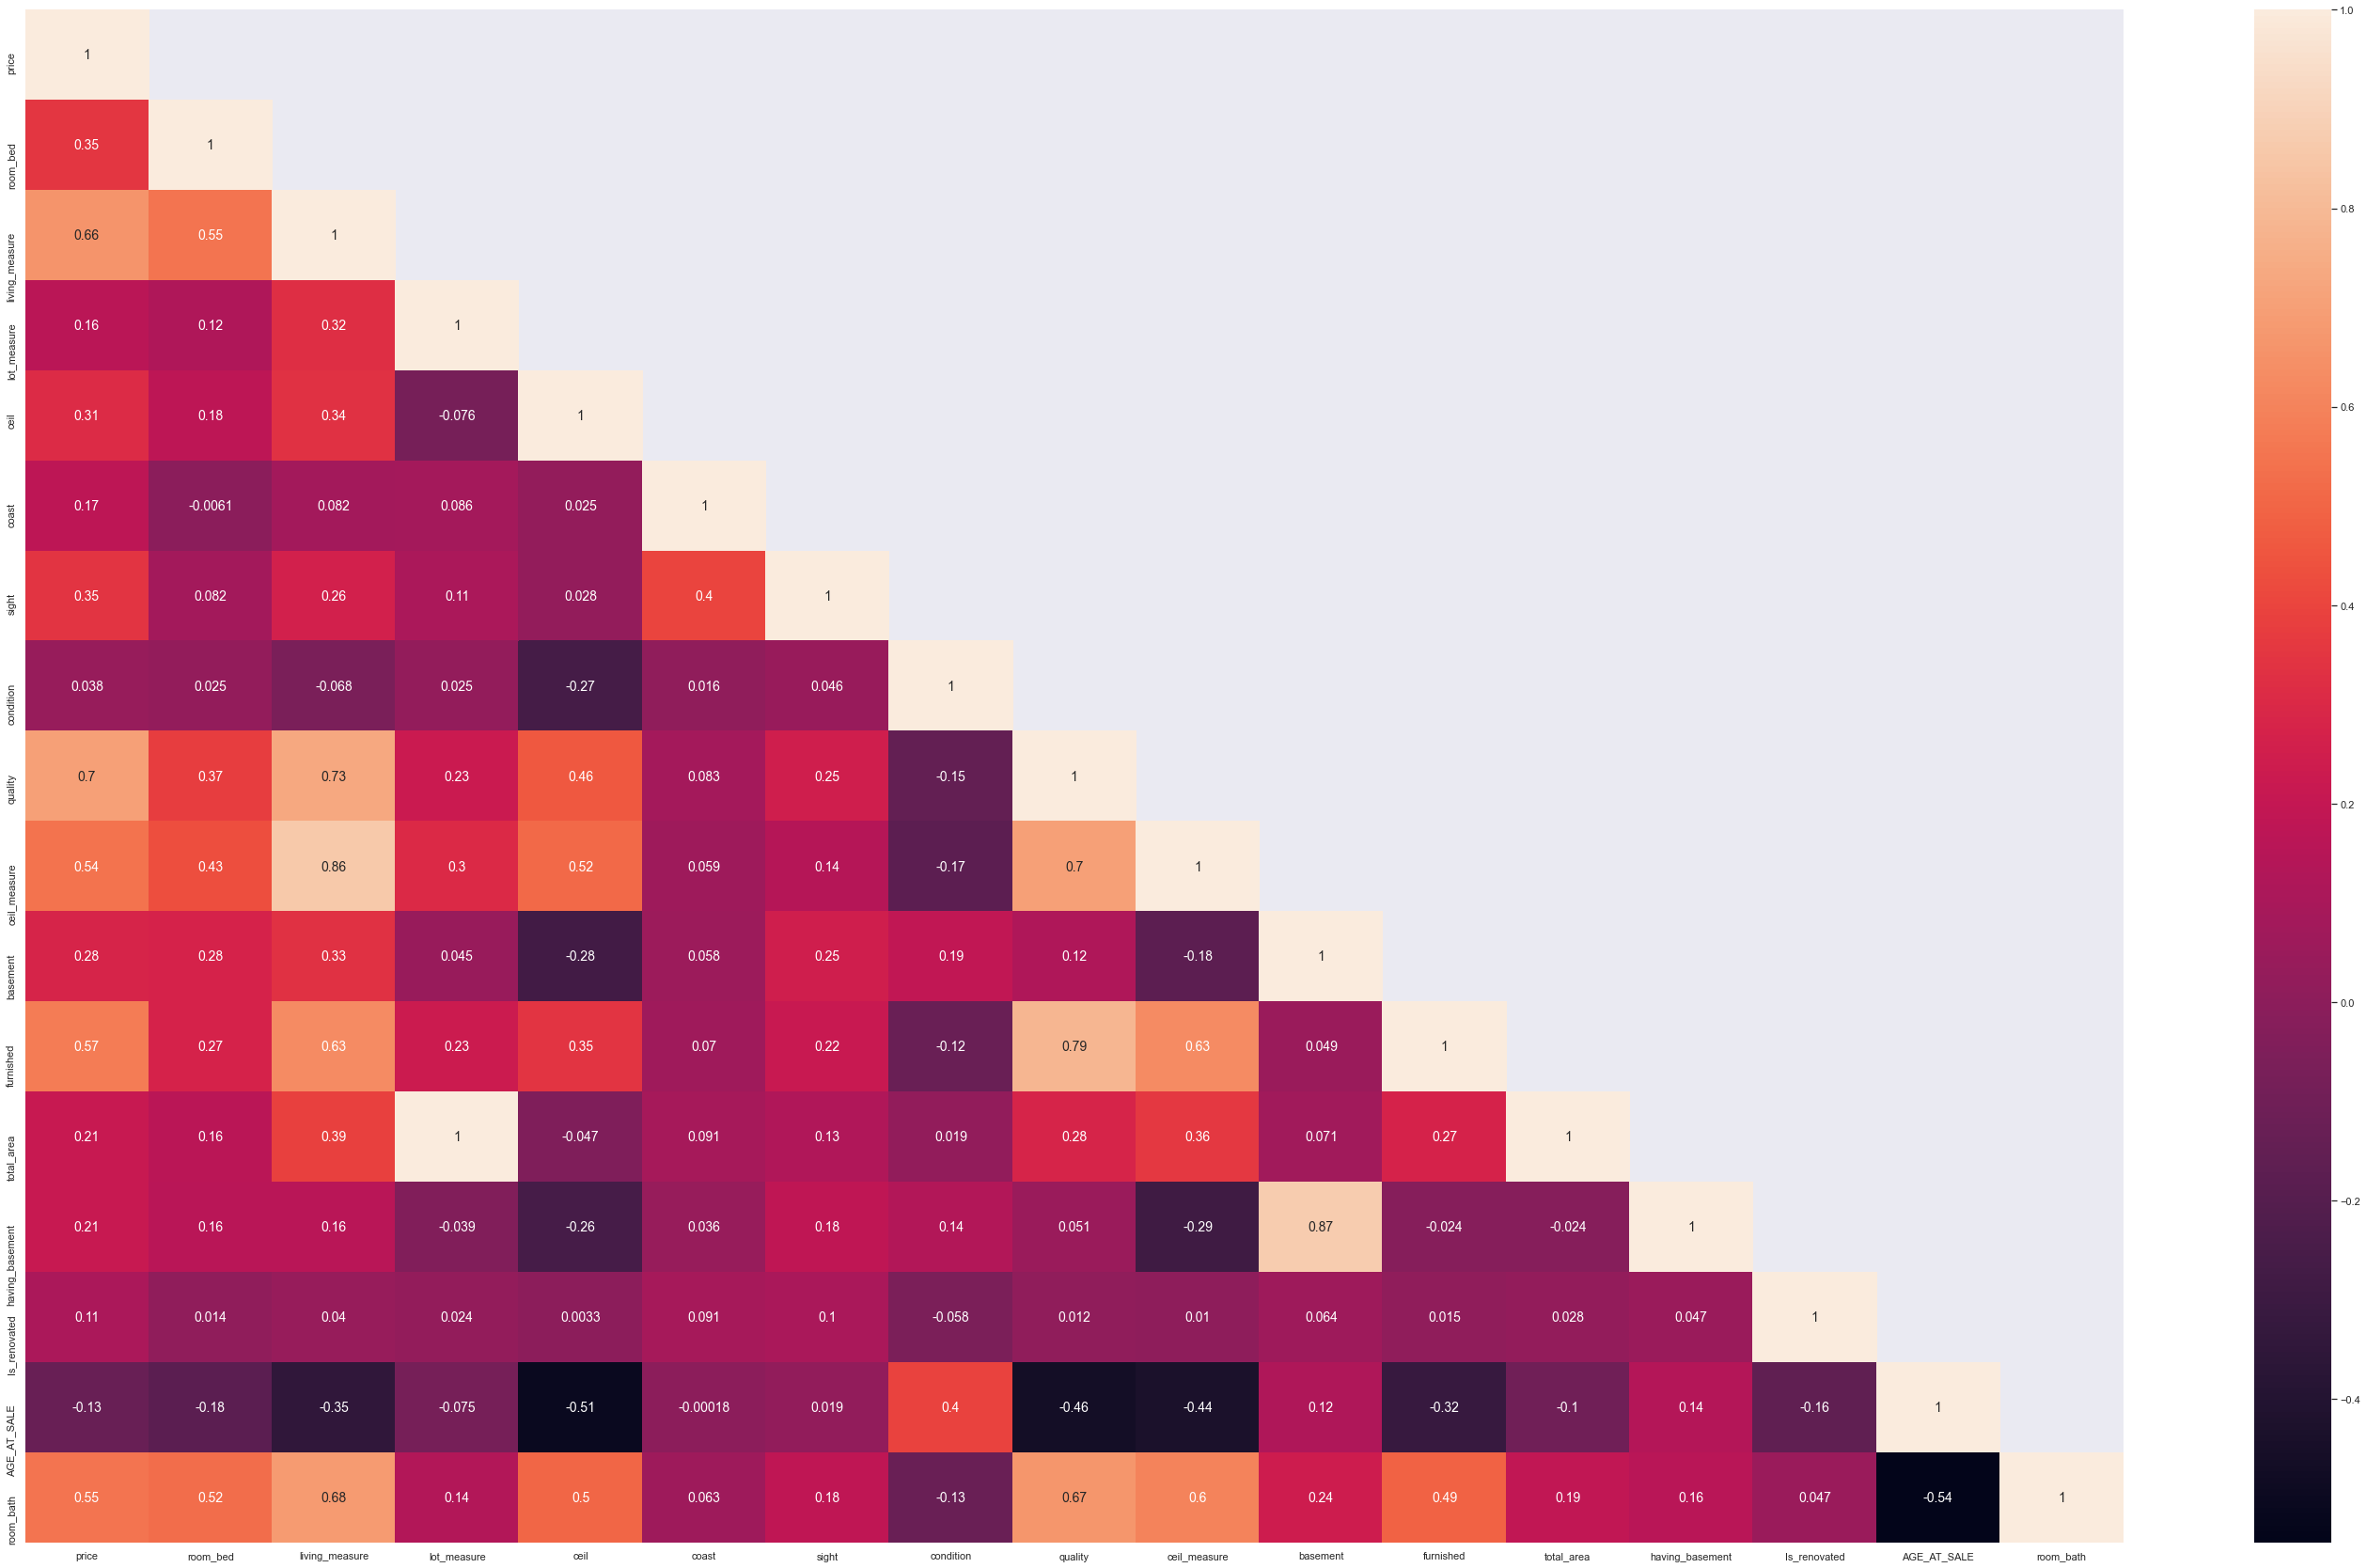

In [226]:
plt.figure(figsize=(50,30))
sns.heatmap(House_Price_allvar.corr(), annot=True, mask=np.triu(House_Price_allvar.corr(),1))
plt.show()

In [227]:
House_Price_allvar.columns

Index(['price', 'room_bed', 'living_measure', 'lot_measure', 'ceil', 'coast',
       'sight', 'condition', 'quality', 'ceil_measure', 'basement',
       'furnished', 'total_area', 'having_basement', 'Is_renovated',
       'AGE_AT_SALE', 'room_bath'],
      dtype='object')

Text(0.5, 1.0, 'Correlation with Price Variable')

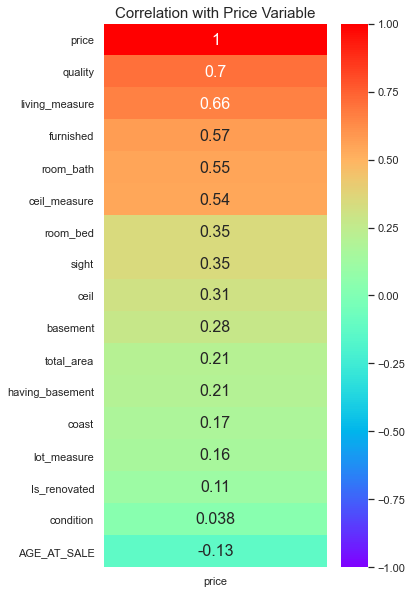

In [228]:
top_features = House_Price_allvar.corr()[['price']].sort_values(by=['price'],ascending=False).head(30)
plt.figure(figsize=(5,10))
sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=-1)
plt.title("Correlation with Price Variable", size=15)

In [229]:
House_Price_allvar.corrwith(House_Price_LR.price)

price              1.000000
room_bed           0.349552
living_measure     0.659220
lot_measure        0.164023
ceil               0.309070
coast              0.174477
sight              0.345366
condition          0.037501
quality            0.703307
ceil_measure       0.543497
basement           0.280028
furnished          0.573683
total_area         0.212470
having_basement    0.209671
Is_renovated       0.111349
AGE_AT_SALE       -0.132478
room_bath          0.549731
dtype: float64

In [230]:
House_Price_allvar.columns

Index(['price', 'room_bed', 'living_measure', 'lot_measure', 'ceil', 'coast',
       'sight', 'condition', 'quality', 'ceil_measure', 'basement',
       'furnished', 'total_area', 'having_basement', 'Is_renovated',
       'AGE_AT_SALE', 'room_bath'],
      dtype='object')

In [231]:
House_Price_allvar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21227 entries, 0 to 21287
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            21227 non-null  float64
 1   room_bed         21227 non-null  float64
 2   living_measure   21227 non-null  float64
 3   lot_measure      21227 non-null  float64
 4   ceil             21227 non-null  float64
 5   coast            21227 non-null  float64
 6   sight            21227 non-null  float64
 7   condition        21227 non-null  float64
 8   quality          21227 non-null  float64
 9   ceil_measure     21227 non-null  float64
 10  basement         21227 non-null  float64
 11  furnished        21227 non-null  float64
 12  total_area       21227 non-null  float64
 13  having_basement  21227 non-null  int64  
 14  Is_renovated     21227 non-null  int64  
 15  AGE_AT_SALE      21227 non-null  float64
 16  room_bath        21227 non-null  float64
dtypes: float64(1

In [232]:
import statsmodels.formula.api as SM

## Model Considering All Variables

In [233]:
House_Price_allvar.columns

Index(['price', 'room_bed', 'living_measure', 'lot_measure', 'ceil', 'coast',
       'sight', 'condition', 'quality', 'ceil_measure', 'basement',
       'furnished', 'total_area', 'having_basement', 'Is_renovated',
       'AGE_AT_SALE', 'room_bath'],
      dtype='object')

In [234]:
f_1 = 'price~room_bed+living_measure+lot_measure+ceil+coast+sight+condition+quality+ceil_measure+basement+furnished+total_area+having_basement+Is_renovated+AGE_AT_SALE+room_bath'

In [235]:
model_1 = SM.ols(f_1,data=House_Price_allvar).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     2476.
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:06:20   Log-Likelihood:                -5289.9
No. Observations:               21227   AIC:                         1.061e+04
Df Residuals:                   21210   BIC:                         1.075e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.2270      0.028    361.816      0.000      10.172      10.282
room_bed           -0.0189      0.003     -6.148      0.000      -0.025      -0.013
living_measure      0.0001   1.98e-05      6.420      0.000    8.85e-05       0.000
lot_measure     -9.447e-05   8.43e-06    -11.213      0.000      -0.000    -7.8e-05
ceil                0.0972      0.006     17.337      0.000       0.086       0.108
coast               0.3544      0.027     13.057      0.000       0.301       0.408
sight               0.0461      0.003     14.095      0.000       0.040       0.053
condition           0.0431      0.004     11.807      0.000       0.036       0.050
quality             0.2279      0.004     60.544      0.000       0.220       0.235
ceil_measure    -3.169e-05   2.09e-05     -1.516      0.129   -7.27e-05    9.27e-06
basement        -9.435e-05   2.41e-05     -3.907      0.000      -0.000    -4.7e-05
furnished           0.0115      0.009      1.273      0.203      -0.006       0.029
total_area       9.227e-05   8.38e-06     11.014      0.000    7.58e-05       0.000
having_basement     0.1274      0.009     13.469      0.000       0.109       0.146
Is_renovated        0.3300      0.011     29.992      0.000       0.308       0.352
AGE_AT_SALE         0.0055      0.000     52.671      0.000       0.005       0.006
room_bath           0.0928      0.005     18.725      0.000       0.083       0.102
==============================================================================
Omnibus:                       64.570   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.852
Skew:                          -0.070   Prob(JB):                     2.05e-17
Kurtosis:                       3.259   Cond. No.                     2.88e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now, let us check and treat the multicollinearity problem if it is present.¶

In [236]:
model_name = []
model_perf = []

model_name.append('All Variables')
model_perf.append(model_1.rsquared_adj)

- ### Variance Inflation Factor (VIF) regresses the dependent variables amongst themselves and then calculates the VIF values based on the ${R^2}$ of each such regression.

- ### The formula for VIF calculation is :
- # \begin{equation*} VIF  =  \frac{1}{1 - {R^2}} \end{equation*} 
- ### VIF threshold value of 10 is commonly used to leave out columns. Sometimes 2 or 5 are also considered as VIF threshold values
- ### A VIF value of 10 means that we can choose to drop a predictor variable whose 80% variation is being explained by the other predictor variables.
---

In [237]:
def vif_cal(input_data):
    x_vars = input_data
    xvar_names = input_data.columns
    for i in range(len(xvar_names)):
        y = x_vars[xvar_names[i]] 
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif = round(1/(1-rsq), 2)
        print (xvar_names[i], " VIF = " , vif)

In [238]:
vif_cal(input_data= House_Price_allvar.drop('price', axis=1))

room_bed  VIF =  1.61
living_measure  VIF =  46.14
lot_measure  VIF =  1398.77
ceil  VIF =  2.02
coast  VIF =  1.21
sight  VIF =  1.38
condition  VIF =  1.24
quality  VIF =  4.3
ceil_measure  VIF =  45.71
basement  VIF =  18.37
furnished  VIF =  2.83
total_area  VIF =  1474.51
having_basement  VIF =  4.69
Is_renovated  VIF =  1.07
AGE_AT_SALE  VIF =  2.01
room_bath  VIF =  3.14


#### The above values corroborates our understanding of vif. Since there was a presence of multicollinearity we see that the vif values are very high in living_measure, lot_measure, ceil_measure, basement & total_area . 

####  If variables are decided to be dropped on the basis of vif, we will drop them one by one. After one variable is dropped we are going to run the regression model and the vif function. Then if needed we will drop more variables. 

#### Dropping variables means losing out on information. That can hamper the predictive as well as the descriptive power of the model.

## Model With Droping high infinity vif values (i.e lot_measure)

In [239]:
House_Price_allvar.head()

price  room_bed  living_measure  lot_measure  ceil  coast  sight  \
0  13.507626       4.0          3040.0       2415.0   2.0    1.0    4.0   
1  12.456831       3.0          1740.0       3721.0   2.0    0.0    0.0   
2  13.051941       2.0          1140.0       1831.0   3.0    0.0    0.0   
3  13.963931       4.0          3650.0       9700.0   2.0    0.0    0.0   
4  13.016892       4.0          3100.0      10000.0   2.0    0.0    0.0   

   condition  quality  ceil_measure  basement  furnished  total_area  \
0        3.0      8.0        3040.0       0.0        0.0      5455.0   
1        3.0      8.0        1740.0       0.0        0.0      5461.0   
2        3.0      7.0        1140.0       0.0        0.0      3340.0   
3        3.0     10.0        3290.0    1120.0        1.0     14380.0   
4        3.0      9.0        3100.0       0.0        1.0     13100.0   

   having_basement  Is_renovated  AGE_AT_SALE  room_bath  
0                0             0         48.0       2.75  
1                0             0          5.0       2.50  
2                0             0          9.0       1.50  
3                1             0          9.0       3.50  
4                0             0         36.0       2.50

In [240]:
House_Price_allvar.columns

Index(['price', 'room_bed', 'living_measure', 'lot_measure', 'ceil', 'coast',
       'sight', 'condition', 'quality', 'ceil_measure', 'basement',
       'furnished', 'total_area', 'having_basement', 'Is_renovated',
       'AGE_AT_SALE', 'room_bath'],
      dtype='object')

In [241]:
House_Price_Drop_lot_measure = House_Price_allvar[['price', 'room_bed','living_measure', 'ceil','coast', 'sight', 'condition', 'quality', 'ceil_measure','basement' 
      ,'furnished', 'total_area','having_basement','Is_renovated','AGE_AT_SALE', 'room_bath']]
House_Price_Drop_lot_measure.head()

price  room_bed  living_measure  ceil  coast  sight  condition  \
0  13.507626       4.0          3040.0   2.0    1.0    4.0        3.0   
1  12.456831       3.0          1740.0   2.0    0.0    0.0        3.0   
2  13.051941       2.0          1140.0   3.0    0.0    0.0        3.0   
3  13.963931       4.0          3650.0   2.0    0.0    0.0        3.0   
4  13.016892       4.0          3100.0   2.0    0.0    0.0        3.0   

   quality  ceil_measure  basement  furnished  total_area  having_basement  \
0      8.0        3040.0       0.0        0.0      5455.0                0   
1      8.0        1740.0       0.0        0.0      5461.0                0   
2      7.0        1140.0       0.0        0.0      3340.0                0   
3     10.0        3290.0    1120.0        1.0     14380.0                1   
4      9.0        3100.0       0.0        1.0     13100.0                0   

   Is_renovated  AGE_AT_SALE  room_bath  
0             0         48.0       2.75  
1             0          5.0       2.50  
2             0          9.0       1.50  
3             0          9.0       3.50  
4             0         36.0       2.50

In [242]:
f_2 = 'price~room_bed+living_measure+ceil+coast+sight+condition+quality+ceil_measure+basement+furnished+total_area+having_basement+Is_renovated+AGE_AT_SALE+room_bath'

In [243]:
model_2 = SM.ols(f_2,data=House_Price_Drop_lot_measure).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     2617.
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:07:08   Log-Likelihood:                -5352.7
No. Observations:               21227   AIC:                         1.074e+04
Df Residuals:                   21211   BIC:                         1.086e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.2026      0.028    360.971      0.000      10.147      10.258
room_bed           -0.0192      0.003     -6.208      0.000      -0.025      -0.013
living_measure      0.0002   1.98e-05      7.691      0.000       0.000       0.000
ceil                0.0992      0.006     17.664      0.000       0.088       0.110
coast               0.3576      0.027     13.139      0.000       0.304       0.411
sight               0.0489      0.003     14.938      0.000       0.042       0.055
condition           0.0427      0.004     11.647      0.000       0.035       0.050
quality             0.2314      0.004     61.521      0.000       0.224       0.239
ceil_measure     3.245e-05   2.02e-05      1.610      0.107   -7.06e-06     7.2e-05
basement        -2.092e-05   2.33e-05     -0.897      0.370   -6.66e-05    2.48e-05
furnished           0.0076      0.009      0.844      0.399      -0.010       0.025
total_area       -1.62e-06   2.48e-07     -6.526      0.000   -2.11e-06   -1.13e-06
having_basement     0.1220      0.009     12.873      0.000       0.103       0.141
Is_renovated        0.3314      0.011     30.033      0.000       0.310       0.353
AGE_AT_SALE         0.0055      0.000     52.525      0.000       0.005       0.006
room_bath           0.0950      0.005     19.140      0.000       0.085       0.105
==============================================================================
Omnibus:                       65.624   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.641
Skew:                          -0.059   Prob(JB):                     3.08e-18
Kurtosis:                       3.278   Cond. No.                     2.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [244]:
model_name.append('Dropping lot_measure Variable')
model_perf.append(model_2.rsquared_adj)

In [245]:
vif_cal(input_data= House_Price_Drop_lot_measure.drop('price', axis=1))

room_bed  VIF =  1.61
living_measure  VIF =  45.57
ceil  VIF =  2.02
coast  VIF =  1.2
sight  VIF =  1.37
condition  VIF =  1.24
quality  VIF =  4.27
ceil_measure  VIF =  42.29
basement  VIF =  17.02
furnished  VIF =  2.83
total_area  VIF =  1.29
having_basement  VIF =  4.68
Is_renovated  VIF =  1.07
AGE_AT_SALE  VIF =  2.01
room_bath  VIF =  3.13


## Model With Droping high infinity vif values (i.e lot_measure & Basement)

In [246]:
House_Price_Drop_lot_measure.head()

price  room_bed  living_measure  ceil  coast  sight  condition  \
0  13.507626       4.0          3040.0   2.0    1.0    4.0        3.0   
1  12.456831       3.0          1740.0   2.0    0.0    0.0        3.0   
2  13.051941       2.0          1140.0   3.0    0.0    0.0        3.0   
3  13.963931       4.0          3650.0   2.0    0.0    0.0        3.0   
4  13.016892       4.0          3100.0   2.0    0.0    0.0        3.0   

   quality  ceil_measure  basement  furnished  total_area  having_basement  \
0      8.0        3040.0       0.0        0.0      5455.0                0   
1      8.0        1740.0       0.0        0.0      5461.0                0   
2      7.0        1140.0       0.0        0.0      3340.0                0   
3     10.0        3290.0    1120.0        1.0     14380.0                1   
4      9.0        3100.0       0.0        1.0     13100.0                0   

   Is_renovated  AGE_AT_SALE  room_bath  
0             0         48.0       2.75  
1             0          5.0       2.50  
2             0          9.0       1.50  
3             0          9.0       3.50  
4             0         36.0       2.50

In [247]:
House_Price_Drop_basement = House_Price_allvar[['price', 'room_bed','living_measure', 'ceil','coast', 'sight', 'condition', 'quality', 'ceil_measure', 
      'furnished', 'total_area','having_basement','Is_renovated','AGE_AT_SALE', 'room_bath']]
House_Price_Drop_basement.head()

price  room_bed  living_measure  ceil  coast  sight  condition  \
0  13.507626       4.0          3040.0   2.0    1.0    4.0        3.0   
1  12.456831       3.0          1740.0   2.0    0.0    0.0        3.0   
2  13.051941       2.0          1140.0   3.0    0.0    0.0        3.0   
3  13.963931       4.0          3650.0   2.0    0.0    0.0        3.0   
4  13.016892       4.0          3100.0   2.0    0.0    0.0        3.0   

   quality  ceil_measure  furnished  total_area  having_basement  \
0      8.0        3040.0        0.0      5455.0                0   
1      8.0        1740.0        0.0      5461.0                0   
2      7.0        1140.0        0.0      3340.0                0   
3     10.0        3290.0        1.0     14380.0                1   
4      9.0        3100.0        1.0     13100.0                0   

   Is_renovated  AGE_AT_SALE  room_bath  
0             0         48.0       2.75  
1             0          5.0       2.50  
2             0          9.0       1.50  
3             0          9.0       3.50  
4             0         36.0       2.50

In [248]:
f_3 = 'price~room_bed+living_measure+ceil+coast+sight+condition+quality+ceil_measure+furnished+total_area+having_basement+Is_renovated+AGE_AT_SALE+room_bath'

In [249]:
model_3 = SM.ols(f_3,data=House_Price_Drop_basement).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     2804.
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:07:47   Log-Likelihood:                -5353.1
No. Observations:               21227   AIC:                         1.074e+04
Df Residuals:                   21212   BIC:                         1.086e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.2044      0.028    362.024      0.000      10.149      10.260
room_bed           -0.0194      0.003     -6.286      0.000      -0.025      -0.013
living_measure      0.0001   1.08e-05     12.729      0.000       0.000       0.000
ceil                0.0994      0.006     17.709      0.000       0.088       0.110
coast               0.3574      0.027     13.131      0.000       0.304       0.411
sight               0.0487      0.003     14.912      0.000       0.042       0.055
condition           0.0425      0.004     11.618      0.000       0.035       0.050
quality             0.2315      0.004     61.548      0.000       0.224       0.239
ceil_measure     4.713e-05   1.18e-05      4.005      0.000    2.41e-05    7.02e-05
furnished           0.0079      0.009      0.868      0.385      -0.010       0.026
total_area      -1.617e-06   2.48e-07     -6.515      0.000    -2.1e-06   -1.13e-06
having_basement     0.1177      0.008     14.438      0.000       0.102       0.134
Is_renovated        0.3311      0.011     30.020      0.000       0.309       0.353
AGE_AT_SALE         0.0055      0.000     52.520      0.000       0.005       0.006
room_bath           0.0947      0.005     19.128      0.000       0.085       0.104
==============================================================================
Omnibus:                       65.576   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.568
Skew:                          -0.059   Prob(JB):                     3.20e-18
Kurtosis:                       3.278   Cond. No.                     2.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [250]:
model_name.append('Dropping lot_measure & basement')
model_perf.append(model_3.rsquared_adj)

In [251]:
vif_cal(input_data= House_Price_Drop_basement.drop('price', axis=1))

room_bed  VIF =  1.61
living_measure  VIF =  13.54
ceil  VIF =  2.01
coast  VIF =  1.2
sight  VIF =  1.36
condition  VIF =  1.24
quality  VIF =  4.27
ceil_measure  VIF =  14.41
furnished  VIF =  2.83
total_area  VIF =  1.29
having_basement  VIF =  3.46
Is_renovated  VIF =  1.07
AGE_AT_SALE  VIF =  2.01
room_bath  VIF =  3.11


## Model With Droping high infinity vif values lot_measure,  Basement & ceil_measure)

In [252]:
House_Price_Drop_basement.head()

price  room_bed  living_measure  ceil  coast  sight  condition  \
0  13.507626       4.0          3040.0   2.0    1.0    4.0        3.0   
1  12.456831       3.0          1740.0   2.0    0.0    0.0        3.0   
2  13.051941       2.0          1140.0   3.0    0.0    0.0        3.0   
3  13.963931       4.0          3650.0   2.0    0.0    0.0        3.0   
4  13.016892       4.0          3100.0   2.0    0.0    0.0        3.0   

   quality  ceil_measure  furnished  total_area  having_basement  \
0      8.0        3040.0        0.0      5455.0                0   
1      8.0        1740.0        0.0      5461.0                0   
2      7.0        1140.0        0.0      3340.0                0   
3     10.0        3290.0        1.0     14380.0                1   
4      9.0        3100.0        1.0     13100.0                0   

   Is_renovated  AGE_AT_SALE  room_bath  
0             0         48.0       2.75  
1             0          5.0       2.50  
2             0          9.0       1.50  
3             0          9.0       3.50  
4             0         36.0       2.50

In [253]:
House_Price_Drop_basement.columns

Index(['price', 'room_bed', 'living_measure', 'ceil', 'coast', 'sight',
       'condition', 'quality', 'ceil_measure', 'furnished', 'total_area',
       'having_basement', 'Is_renovated', 'AGE_AT_SALE', 'room_bath'],
      dtype='object')

In [254]:
House_Price_Drop_ceil_measure = House_Price_allvar[['price', 'room_bed', 'living_measure', 'ceil', 'coast', 'sight',
       'condition', 'quality', 'furnished', 'total_area',
       'having_basement', 'Is_renovated', 'AGE_AT_SALE', 'room_bath']]
House_Price_Drop_ceil_measure.head()

price  room_bed  living_measure  ceil  coast  sight  condition  \
0  13.507626       4.0          3040.0   2.0    1.0    4.0        3.0   
1  12.456831       3.0          1740.0   2.0    0.0    0.0        3.0   
2  13.051941       2.0          1140.0   3.0    0.0    0.0        3.0   
3  13.963931       4.0          3650.0   2.0    0.0    0.0        3.0   
4  13.016892       4.0          3100.0   2.0    0.0    0.0        3.0   

   quality  furnished  total_area  having_basement  Is_renovated  AGE_AT_SALE  \
0      8.0        0.0      5455.0                0             0         48.0   
1      8.0        0.0      5461.0                0             0          5.0   
2      7.0        0.0      3340.0                0             0          9.0   
3     10.0        1.0     14380.0                1             0          9.0   
4      9.0        1.0     13100.0                0             0         36.0   

   room_bath  
0       2.75  
1       2.50  
2       1.50  
3       3.50  
4       2.50

In [255]:
f_4 = 'price~room_bed+living_measure+ceil+coast+sight+condition+quality+furnished+total_area+having_basement+Is_renovated+AGE_AT_SALE+room_bath'

In [256]:
model_4 = SM.ols(f_4,data=House_Price_Drop_ceil_measure).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     3016.
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:08:27   Log-Likelihood:                -5361.1
No. Observations:               21227   AIC:                         1.075e+04
Df Residuals:                   21213   BIC:                         1.086e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.2074      0.028    362.126      0.000      10.152      10.263
room_bed           -0.0197      0.003     -6.396      0.000      -0.026      -0.014
living_measure      0.0002   5.31e-06     32.953      0.000       0.000       0.000
ceil                0.1056      0.005     19.553      0.000       0.095       0.116
coast               0.3596      0.027     13.211      0.000       0.306       0.413
sight               0.0476      0.003     14.625      0.000       0.041       0.054
condition           0.0411      0.004     11.280      0.000       0.034       0.048
quality             0.2328      0.004     62.104      0.000       0.225       0.240
furnished           0.0095      0.009      1.055      0.291      -0.008       0.027
total_area      -1.573e-06   2.48e-07     -6.339      0.000   -2.06e-06   -1.09e-06
having_basement     0.0921      0.005     18.158      0.000       0.082       0.102
Is_renovated        0.3301      0.011     29.929      0.000       0.308       0.352
AGE_AT_SALE         0.0055      0.000     52.510      0.000       0.005       0.006
room_bath           0.0944      0.005     19.070      0.000       0.085       0.104
==============================================================================
Omnibus:                       66.403   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.961
Skew:                          -0.058   Prob(JB):                     1.59e-18
Kurtosis:                       3.282   Cond. No.                     2.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [257]:
model_name.append('Dropping having_basement, basement & lot_measure Variable')
model_perf.append(model_4.rsquared_adj)

In [258]:
vif_cal(input_data= House_Price_Drop_ceil_measure.drop('price', axis=1))

room_bed  VIF =  1.61
living_measure  VIF =  3.28
ceil  VIF =  1.86
coast  VIF =  1.2
sight  VIF =  1.35
condition  VIF =  1.23
quality  VIF =  4.24
furnished  VIF =  2.82
total_area  VIF =  1.28
having_basement  VIF =  1.34
Is_renovated  VIF =  1.06
AGE_AT_SALE  VIF =  2.01
room_bath  VIF =  3.11


Basis dropping lot_measure, basement & ceil_measure. The vif values of total_area & living_measure vif values have dropped. Further we will cehck the p values and drop the varaibles.

Considering the threshold as 5. We will keep the varaibles that are below 10 as that varaibles seems to important variables.

From above values we can see that by dropping the lot_measure, total_area & basement the multicollinearity in the living_measure & ceil_measure has been removed.

### Dropping features based on high P Value

- For the $\underline{t-statistic}$ for every co-efficient of the Linear Regression the null and alternate Hypothesis is as follows:

- #### ${H_0}$ : The variable is significant.
- #### ${H_1}$:  The variable is not significant.

Lower the p-value for the t-statistic more significant are the variables.

## Model With Droping high infinity vif values lot_measure,  Basement, ceil_measure & furnished)

In [259]:
House_Price_Drop_ceil_measure.columns

Index(['price', 'room_bed', 'living_measure', 'ceil', 'coast', 'sight',
       'condition', 'quality', 'furnished', 'total_area', 'having_basement',
       'Is_renovated', 'AGE_AT_SALE', 'room_bath'],
      dtype='object')

In [260]:
House_Price_Drop_ceil_measure.columns

Index(['price', 'room_bed', 'living_measure', 'ceil', 'coast', 'sight',
       'condition', 'quality', 'furnished', 'total_area', 'having_basement',
       'Is_renovated', 'AGE_AT_SALE', 'room_bath'],
      dtype='object')

In [261]:
House_Price_Drop_furnished = House_Price_allvar[['price', 'room_bed', 'living_measure', 'ceil', 'coast', 'sight',
       'condition', 'quality', 'total_area', 'having_basement',
       'Is_renovated', 'AGE_AT_SALE', 'room_bath']]
House_Price_Drop_furnished.head()

price  room_bed  living_measure  ceil  coast  sight  condition  \
0  13.507626       4.0          3040.0   2.0    1.0    4.0        3.0   
1  12.456831       3.0          1740.0   2.0    0.0    0.0        3.0   
2  13.051941       2.0          1140.0   3.0    0.0    0.0        3.0   
3  13.963931       4.0          3650.0   2.0    0.0    0.0        3.0   
4  13.016892       4.0          3100.0   2.0    0.0    0.0        3.0   

   quality  total_area  having_basement  Is_renovated  AGE_AT_SALE  room_bath  
0      8.0      5455.0                0             0         48.0       2.75  
1      8.0      5461.0                0             0          5.0       2.50  
2      7.0      3340.0                0             0          9.0       1.50  
3     10.0     14380.0                1             0          9.0       3.50  
4      9.0     13100.0                0             0         36.0       2.50

In [262]:
f_5 = 'price~room_bed+living_measure+ceil+coast+sight+condition+quality+total_area+having_basement+Is_renovated+AGE_AT_SALE+room_bath'

In [263]:
model_5 = SM.ols(f_5,data=House_Price_Drop_furnished).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     3267.
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:08:29   Log-Likelihood:                -5361.6
No. Observations:               21227   AIC:                         1.075e+04
Df Residuals:                   21214   BIC:                         1.085e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.1908      0.023    435.995      0.000      10.145      10.237
room_bed           -0.0199      0.003     -6.477      0.000      -0.026      -0.014
living_measure      0.0002   5.23e-06     33.637      0.000       0.000       0.000
ceil                0.1056      0.005     19.545      0.000       0.095       0.116
coast               0.3592      0.027     13.197      0.000       0.306       0.413
sight               0.0477      0.003     14.655      0.000       0.041       0.054
condition           0.0409      0.004     11.246      0.000       0.034       0.048
quality             0.2351      0.003     78.762      0.000       0.229       0.241
total_area      -1.566e-06   2.48e-07     -6.315      0.000   -2.05e-06   -1.08e-06
having_basement     0.0915      0.005     18.164      0.000       0.082       0.101
Is_renovated        0.3304      0.011     29.963      0.000       0.309       0.352
AGE_AT_SALE         0.0055      0.000     52.773      0.000       0.005       0.006
room_bath           0.0941      0.005     19.041      0.000       0.084       0.104
==============================================================================
Omnibus:                       66.622   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.444
Skew:                          -0.057   Prob(JB):                     1.25e-18
Kurtosis:                       3.283   Cond. No.                     2.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [264]:
model_name.append('Dropping having_basement, basement, lot_measure & ceil_measure variable')
model_perf.append(model_5.rsquared_adj)

In [265]:
vif_cal(input_data= House_Price_Drop_furnished.drop('price', axis=1))

room_bed  VIF =  1.6
living_measure  VIF =  3.18
ceil  VIF =  1.86
coast  VIF =  1.2
sight  VIF =  1.35
condition  VIF =  1.23
quality  VIF =  2.69
total_area  VIF =  1.28
having_basement  VIF =  1.32
Is_renovated  VIF =  1.06
AGE_AT_SALE  VIF =  2.0
room_bath  VIF =  3.1


In [266]:
House_Price_Drop_furnished.columns

Index(['price', 'room_bed', 'living_measure', 'ceil', 'coast', 'sight',
       'condition', 'quality', 'total_area', 'having_basement', 'Is_renovated',
       'AGE_AT_SALE', 'room_bath'],
      dtype='object')

In [267]:
model_eval = pd.DataFrame({'model_name': model_name, 'model_perf': model_perf})
model_eval

model_name  model_perf
0                                      All Variables    0.651002
1                      Dropping lot_measure Variable    0.648950
2                    Dropping lot_measure & basement    0.648953
3  Dropping having_basement, basement & lot_measu...    0.648704
4  Dropping having_basement, basement, lot_measur...    0.648703

In [268]:
model_MLR_1_pred = model_1.fittedvalues
model_MLR_5_pred = model_5.fittedvalues
model_MLR_5_pred

0        13.926285
1        12.906368
2        12.622587
3        13.886233
4        13.520268
           ...    
21283    13.176310
21284    13.196418
21285    13.945833
21286    13.173424
21287    13.006250
Length: 21227, dtype: float64

In [269]:
model_MLR_5_pred

0        13.926285
1        12.906368
2        12.622587
3        13.886233
4        13.520268
           ...    
21283    13.176310
21284    13.196418
21285    13.945833
21286    13.173424
21287    13.006250
Length: 21227, dtype: float64

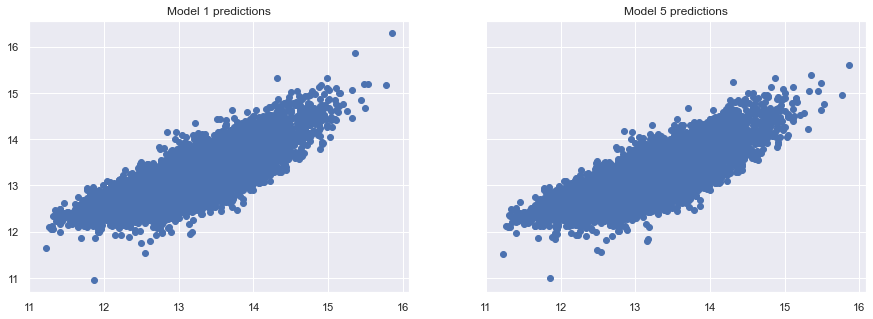

In [270]:
f, (ax1, ax2) =  plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharey=True)

ax1.scatter(House_Price_allvar['price'], model_MLR_1_pred)
ax1.set_title('Model 1 predictions')


ax2.scatter(House_Price_Drop_furnished['price'],model_MLR_5_pred)
ax2.set_title('Model 5 predictions')
plt.show()

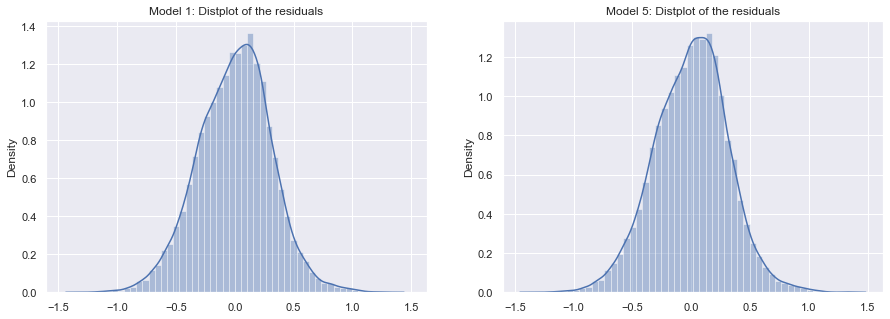

In [271]:
f,a =  plt.subplots(1,2, sharex=True, sharey=False, squeeze=False, figsize=(15,5))

#Plotting the distplot and the boxplot of the residuals for model 8

plot_0 = sns.distplot(model_1.resid, ax=a[0][0], kde=True)
a[0][0].set_title('Model 1: Distplot of the residuals')

plot_1 = sns.distplot(model_5.resid, ax=a[0][1], kde=True)
a[0][1].set_title('Model 5: Distplot of the residuals')
plt.show()


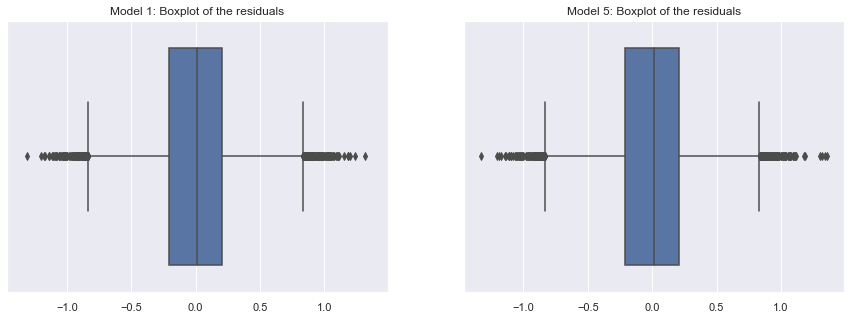

In [272]:
f,a =  plt.subplots(1,2, sharex=True, sharey=False, squeeze=False, figsize=(15,5))

#Plotting the distplot and the boxplot of the residuals for model 6 & 7

plot_0 = sns.boxplot(x= model_1.resid, ax=a[0][0])
a[0][0].set_title('Model 1: Boxplot of the residuals')

plot_1 = sns.boxplot(x = model_5.resid, ax=a[0][1])
a[0][1].set_title('Model 5: Boxplot of the residuals')
plt.show()


In [273]:
from sklearn import metrics

## Model 1 - RMSE

In [274]:
metrics.mean_squared_error(House_Price_allvar['price'], model_MLR_1_pred,squared=False)

0.31045050807531316

## Model 5 - RMSE

In [275]:
metrics.mean_squared_error(House_Price_Drop_furnished['price'], model_MLR_5_pred,squared=False)

0.3115010389557964

### Regression Analysis

In [276]:
df = House_Price_Drop_furnished.copy()

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21227 entries, 0 to 21287
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            21227 non-null  float64
 1   room_bed         21227 non-null  float64
 2   living_measure   21227 non-null  float64
 3   ceil             21227 non-null  float64
 4   coast            21227 non-null  float64
 5   sight            21227 non-null  float64
 6   condition        21227 non-null  float64
 7   quality          21227 non-null  float64
 8   total_area       21227 non-null  float64
 9   having_basement  21227 non-null  int64  
 10  Is_renovated     21227 non-null  int64  
 11  AGE_AT_SALE      21227 non-null  float64
 12  room_bath        21227 non-null  float64
dtypes: float64(11), int64(2)
memory usage: 2.8 MB


In [278]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sn
#from statsmodels.stats.outliers_influence import variance_inflation_factor

In [279]:
X = df.drop('price',axis=1)
Y = df['price']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

In [280]:
X_train_LM = sn.add_constant(X_train)
X_test_LM = sn.add_constant(X_test)
vars_used = ['const','room_bed', 'living_measure', 'ceil', 'coast', 'sight',
       'condition', 'quality', 'total_area', 'having_basement', 'Is_renovated',
       'AGE_AT_SALE', 'room_bath']
model = sn.OLS(np.log(Y_train),X_train_LM[vars_used]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     2200.
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:08:39   Log-Likelihood:                 34335.
No. Observations:               14858   AIC:                        -6.864e+04
Df Residuals:                   14845   BIC:                        -6.855e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.3491      0.002   10

In [281]:
r2_score(np.log(Y_test),model.predict(X_test_LM[vars_used]))

0.6424362092784167

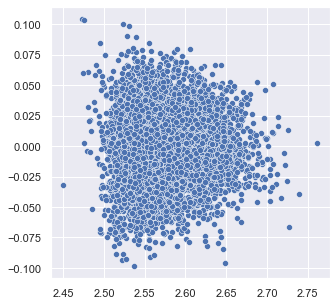

In [282]:
sns.scatterplot(x = model.fittedvalues,y =model.resid)

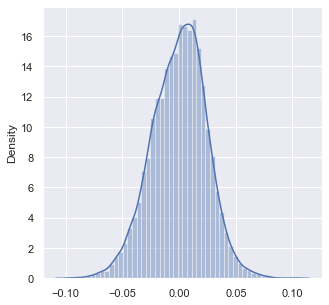

In [283]:
sns.distplot(model.resid,kde=True)

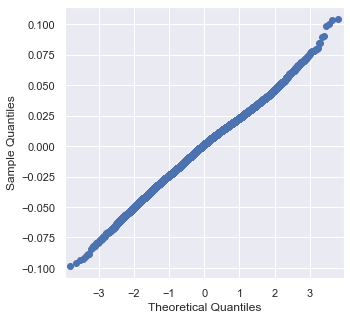

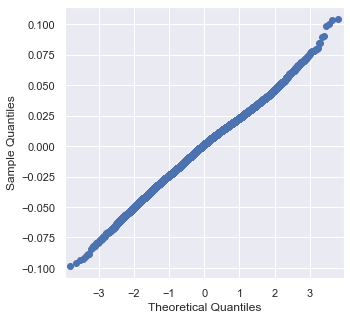

In [284]:
sn.qqplot(model.resid)

### ML Models

In [285]:
House_price.head()

cid   dayhours      price  room_bed  room_bath  living_measure  \
0  7129303070 2014-08-20  13.507626       4.0       2.75          3040.0   
1  7338220280 2014-10-10  12.456831       3.0       2.50          1740.0   
2   510002519 2014-07-15  13.051941       2.0       1.50          1140.0   
3  1624059224 2014-06-18  13.963931       4.0       3.50          3650.0   
4  5469503280 2014-07-21  13.016892       4.0       2.50          3100.0   

   lot_measure  ceil  coast  sight  condition  quality  ceil_measure  \
0       2415.0   2.0    1.0    4.0        3.0      8.0        3040.0   
1       3721.0   2.0    0.0    0.0        3.0      8.0        1740.0   
2       1831.0   3.0    0.0    0.0        3.0      7.0        1140.0   
3       9700.0   2.0    0.0    0.0        3.0     10.0        3290.0   
4      10000.0   2.0    0.0    0.0        3.0      9.0        3100.0   

   basement  yr_built  yr_renovated  zipcode      lat     long  furnished  \
0       0.0    1966.0             0    98118  47.5188 -122.256        0.0   
1       0.0    2009.0             0    98002  47.3363 -122.213        0.0   
2       0.0    2005.0             0    98103  47.6608 -122.333        0.0   
3    1120.0    2005.0             0    98006  47.5703 -122.165        1.0   
4       0.0    1978.0             0    98042  47.3741 -122.150        1.0   

   total_area  having_basement  Is_renovated  Sale_Year  AGE_AT_SALE  \
0      5455.0                0             0       2014         48.0   
1      5461.0                0             0       2014          5.0   
2      3340.0                0             0       2014          9.0   
3     14380.0                1             0       2014          9.0   
4     13100.0                0             0       2014         36.0   

   PRICE_PER_LA  MED_PRICE_ZIP  OVERPRICED    month_year      city state_id  \
0    241.776316       367500.0           1   August-2014   Seattle       WA   
1    147.701149       235000.0           1  October-2014    Auburn       WA   
2    408.771930       550000.0           0     July-2014   Seattle       WA   
3    247.863248       762684.5           1     June-2014  Bellevue       WA   
4    145.145161       292500.0           1     July-2014      Kent       WA   

   state_name  
0  Washington  
1  Washington  
2  Washington  
3  Washington  
4  Washington

In [286]:
House_price.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'furnished', 'total_area', 'having_basement',
       'Is_renovated', 'Sale_Year', 'AGE_AT_SALE', 'PRICE_PER_LA',
       'MED_PRICE_ZIP', 'OVERPRICED', 'month_year', 'city', 'state_id',
       'state_name'],
      dtype='object')

In [287]:
House_price.drop(['state_id','state_name','month_year','lat','long','zipcode','cid','dayhours','yr_built','yr_renovated','Sale_Year','PRICE_PER_LA','OVERPRICED','city',],axis=1,inplace=True)

In [288]:
House_price.drop(['MED_PRICE_ZIP'],axis=1,inplace=True)

In [289]:
House_price.head()

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  13.507626       4.0       2.75          3040.0       2415.0   2.0    1.0   
1  12.456831       3.0       2.50          1740.0       3721.0   2.0    0.0   
2  13.051941       2.0       1.50          1140.0       1831.0   3.0    0.0   
3  13.963931       4.0       3.50          3650.0       9700.0   2.0    0.0   
4  13.016892       4.0       2.50          3100.0      10000.0   2.0    0.0   

   sight  condition  quality  ceil_measure  basement  furnished  total_area  \
0    4.0        3.0      8.0        3040.0       0.0        0.0      5455.0   
1    0.0        3.0      8.0        1740.0       0.0        0.0      5461.0   
2    0.0        3.0      7.0        1140.0       0.0        0.0      3340.0   
3    0.0        3.0     10.0        3290.0    1120.0        1.0     14380.0   
4    0.0        3.0      9.0        3100.0       0.0        1.0     13100.0   

   having_basement  Is_renovated  AGE_AT_SALE  
0                0             0         48.0  
1                0             0          5.0  
2                0             0          9.0  
3                1             0          9.0  
4                0             0         36.0

In [290]:
House_price.shape

(21227, 17)

In [291]:
# Copy all the predictor variables into X dataframe
X = House_price.drop('price', axis=1)

# Copy target into the y dataframe. 
y = House_price[['price']]

In [292]:
#Splitting the dataset into the traing set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

For KNN Scaling the data.

In [293]:
from sklearn.preprocessing import StandardScaler

In [294]:
ss = StandardScaler()
X_train_Scaled = ss.fit_transform(X_train)
X_test_Scaled = ss.transform(X_test)

In [295]:
# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import Ridge  # Linear Regression + L2 regularization
from sklearn.linear_model import Lasso  # Linear Regression + L1 regularization
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_percentage_error

#import xgboost
from xgboost import XGBRegressor
from xgboost import plot_importance  # to plot feature importance


### Model- Random Forest Regression

In [296]:
%%time
tuned_params = {
        'n_estimators': [400, 500, 600, 700, 800,1000],
    'max_features': [4,5,6,7],
    'min_samples_split': [2, 5, 10, 12, 13],
    'min_samples_leaf': [3, 4, 5],
    'max_depth': [3, 7, 9, 11, 13],
}

rf_model = RandomizedSearchCV(RandomForestRegressor(), tuned_params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)

rf_model.fit(X_train, y_train)

Wall time: 3min 26s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 7, 9, 11, 13],
                                        'max_features': [4, 5, 6, 7],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [2, 5, 10, 12, 13],
                                        'n_estimators': [400, 500, 600, 700,
                                                         800, 1000]},
                   scoring='neg_mean_absolute_error')

In [297]:
rf_model.best_estimator_

RandomForestRegressor(max_depth=13, max_features=6, min_samples_leaf=3,
                      min_samples_split=13, n_estimators=700)

In [298]:
## Predict Train results
y_train_pred = rf_model.predict(X_train)

In [299]:
## Predict Test results
y_pred = rf_model.predict(X_test)

In [300]:
from math import sqrt
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

In [301]:
#entering metrics score to the metics dataframe
RF_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False)
RF_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
RF_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 

print("Train Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))




Train Results for Random Forest Regression:
*******************************
Root mean squared error:  0.24479037725323788
R-squared:  0.782462562932207
Mean Absolute Percentage Error:  0.014862274162504848


In [302]:
results_train = pd.DataFrame([['Random Forest Train', RF_RMSE_Train, RF_R2_Train, RF_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])
results_train


Model     RMSE  Adjusted_r_2      MAPE
0  Random Forest Train  0.24479      0.782463  0.014862

In [303]:
#entering metrics score to the metics dataframe
RF_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False)
RF_R2_Test = metrics.r2_score(y_test, y_pred) 
RF_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))


Test Results for Random Forest Regression:
*******************************
Root mean squared error:  0.29503805614600354
R-squared:  0.6872148106220106
Mean Absolute Percentage Error:  0.017682432482260615


In [304]:
results_test = pd.DataFrame([['Random Forest Test', RF_RMSE_Test, RF_R2_Test, RF_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])
results_test

Model      RMSE  Adjusted_r_2      MAPE
0  Random Forest Test  0.295038      0.687215  0.017682

### Feature Importance 

In [305]:
## Building the model again with the best hyperparameters
rf_model = RandomForestRegressor(min_samples_split=10, n_estimators=700)
rf_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=10, n_estimators=700)

In [306]:
importance = rf_model.feature_importances_
importance

array([0.01312504, 0.03156609, 0.08527487, 0.04854916, 0.00743385,
       0.00343531, 0.01546052, 0.0136099 , 0.38131417, 0.03638059,
       0.01888819, 0.16558922, 0.04072801, 0.00109823, 0.01581814,
       0.12172872])

In [307]:
pd.Series(rf_model.feature_importances_,index=X_train.columns).sort_values(ascending=False)

quality            0.381314
furnished          0.165589
AGE_AT_SALE        0.121729
living_measure     0.085275
lot_measure        0.048549
total_area         0.040728
ceil_measure       0.036381
room_bath          0.031566
basement           0.018888
Is_renovated       0.015818
sight              0.015461
condition          0.013610
room_bed           0.013125
ceil               0.007434
coast              0.003435
having_basement    0.001098
dtype: float64

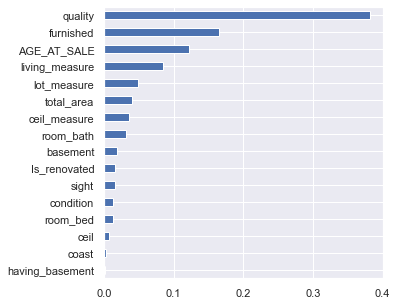

In [308]:
(pd.Series(importance, index=X.columns)
   .nlargest(17)
   .plot(kind='barh').invert_yaxis())  


In [309]:
indices = np.argsort(-rf_model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
quality
furnished
AGE_AT_SALE
living_measure
lot_measure
total_area
ceil_measure
room_bath
basement
Is_renovated
sight
condition
room_bed
ceil
coast
having_basement


In [310]:

from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances

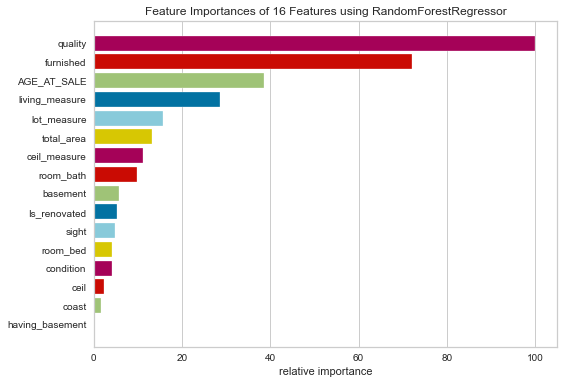

In [311]:
rf_model = RandomForestRegressor(min_samples_split=10, n_estimators=700)
viz = FeatureImportances(rf_model)
viz.fit(X, y)
viz.show()

### Model- Descision Tree Regression

In [312]:
%%time
tuned_params = {
    'min_samples_split': [2, 3, 4, 5, 7, 9 , 11], 
    'min_samples_leaf': [4, 6, 9, 10], 
    'max_depth': [3, 7, 9, 11, 13]
}

dt_model = GridSearchCV(DecisionTreeRegressor(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)

dt_model.fit(X_train, y_train)

Wall time: 1min 15s


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 7, 9, 11, 13],
                         'min_samples_leaf': [4, 6, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 7, 9, 11]},
             scoring='neg_mean_absolute_error')

In [313]:

dt_model.best_estimator_

DecisionTreeRegressor(max_depth=9, min_samples_leaf=6, min_samples_split=3)

In [314]:
## Predict Train results
y_train_pred = dt_model.predict(X_train)

In [315]:
## Predict Test results
y_pred = dt_model.predict(X_test)

In [316]:
#entering metrics score to the metics dataframe
DT_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
DT_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
DT_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 


print("Train Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))


Train Results for Decision Tree Regression:
*******************************
Root mean squared error:  0.2891018143873433
R-squared:  0.6965780753087656
Mean Absolute Percentage Error:  0.017523233062358742


In [317]:
model_results = pd.DataFrame([['Decision Tree Train', DT_RMSE_Train, DT_R2_Train, DT_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
print(results_train)

                 Model      RMSE  Adjusted_r_2      MAPE
0  Random Forest Train  0.244790      0.782463  0.014862
1  Decision Tree Train  0.289102      0.696578  0.017523


In [318]:
#entering metrics score to the metics dataframe
DT_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False)
DT_R2_Test = metrics.r2_score(y_test, y_pred) 
DT_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))





Test Results for Decision Tree Regression:
*******************************
Root mean squared error:  0.31840914738277404
R-squared:  0.6356983181174256
Mean Absolute Percentage Error:  0.019118825921543812


In [319]:
model_results = pd.DataFrame([['Decision Tree Test', DT_RMSE_Test, DT_R2_Test, DT_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_test = results_test.append(model_results, ignore_index = True)
print(results_test)

                Model      RMSE  Adjusted_r_2      MAPE
0  Random Forest Test  0.295038      0.687215  0.017682
1  Decision Tree Test  0.318409      0.635698  0.019119


### Feature Importance of Decision Tree Model

In [320]:
## Building the model again with the best hyperparameters
dt_model = DecisionTreeRegressor(max_depth=11, min_samples_leaf=9, min_samples_split=4, random_state =1)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=11, min_samples_leaf=9, min_samples_split=4,
                      random_state=1)

In [321]:
importance = dt_model.feature_importances_
importance

array([0.00299571, 0.02141162, 0.07368994, 0.02516551, 0.0016588 ,
       0.00144966, 0.01550695, 0.00753724, 0.69496582, 0.01101688,
       0.00760754, 0.        , 0.0119069 , 0.        , 0.01735495,
       0.10773247])

In [322]:
pd.Series(dt_model.feature_importances_,index=X_train.columns).sort_values(ascending=False)

quality            0.694966
AGE_AT_SALE        0.107732
living_measure     0.073690
lot_measure        0.025166
room_bath          0.021412
Is_renovated       0.017355
sight              0.015507
total_area         0.011907
ceil_measure       0.011017
basement           0.007608
condition          0.007537
room_bed           0.002996
ceil               0.001659
coast              0.001450
furnished          0.000000
having_basement    0.000000
dtype: float64

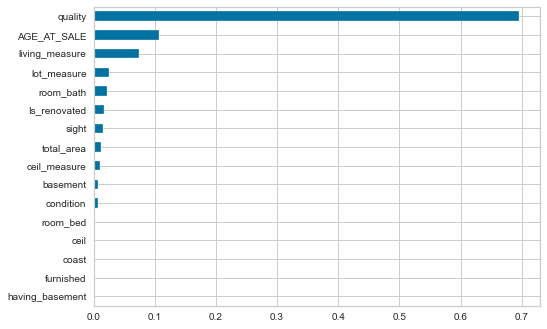

In [323]:
(pd.Series(importance, index=X.columns)
   .nlargest(17)
   .plot(kind='barh').invert_yaxis())  



In [324]:
indices = np.argsort(-dt_model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
quality
AGE_AT_SALE
living_measure
lot_measure
room_bath
Is_renovated
sight
total_area
ceil_measure
basement
condition
room_bed
ceil
coast
furnished
having_basement


In [325]:
from yellowbrick.model_selection import FeatureImportances

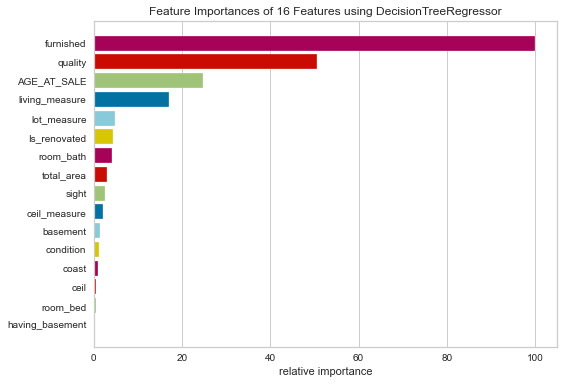

In [326]:
dt_model = DecisionTreeRegressor(max_depth=11, min_samples_leaf=9, min_samples_split=4,random_state =1)
viz = FeatureImportances(dt_model)
viz.fit(X, y)
viz.show()

### Model- XGBoost Regression¶

In [327]:
%%time
tuned_params = {
    'max_depth': [4, 5, 7, 9, 11, 13], 
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [800, 1000, 1100, 1200], 
    'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0],
    'min_child_weight' : [2, 3, 4, 5],
}

xgb_model = RandomizedSearchCV(XGBRegressor(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)

xgb_model.fit(X_train, y_train)

Wall time: 23min 38s


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_wei

In [328]:
xgb_model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=100.0, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [329]:
y_train_pred = xgb_model.predict(X_train)

In [330]:
y_pred = xgb_model.predict(X_test)

In [331]:
#entering metrics score to the metics dataframe
XGB_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
XGB_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
XGB_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 

print("Train Results for XG Boost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))



Train Results for XG Boost Regression:
*******************************
Root mean squared error:  0.24295079873649858
R-squared:  0.7857198277951427
Mean Absolute Percentage Error:  0.014666851726093959


In [332]:
model_results = pd.DataFrame([['XG Boost Train', XGB_RMSE_Train, XGB_R2_Train, XGB_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
print(results_train)

                 Model      RMSE  Adjusted_r_2      MAPE
0  Random Forest Train  0.244790      0.782463  0.014862
1  Decision Tree Train  0.289102      0.696578  0.017523
2       XG Boost Train  0.242951      0.785720  0.014667


In [333]:

#entering metrics score to the metics dataframe
XGB_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False) 
XGB_R2_Test = metrics.r2_score(y_test, y_pred) 
XGB_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for XG Boost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))



Test Results for XG Boost Regression:
*******************************
Root mean squared error:  0.2928540487065301
R-squared:  0.6918284308851175
Mean Absolute Percentage Error:  0.01754686825072764


In [334]:
model_results = pd.DataFrame([['XG Boost Test', XGB_RMSE_Test, XGB_R2_Test, XGB_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_test = results_test.append(model_results, ignore_index = True)
print(results_test)

                Model      RMSE  Adjusted_r_2      MAPE
0  Random Forest Test  0.295038      0.687215  0.017682
1  Decision Tree Test  0.318409      0.635698  0.019119
2       XG Boost Test  0.292854      0.691828  0.017547


### Feature Importance¶

In [335]:
## Building the model again with the best hyperparameters
xgb_model = XGBRegressor(max_depth=4,learning_rate=0.1,n_estimators=400, reg_lambda=1.0,random_state =1)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [336]:
## Function to include figsize parameter
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

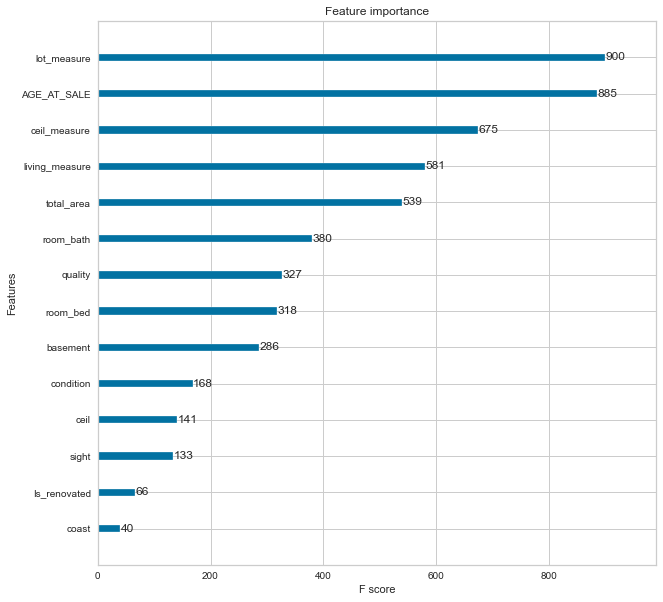

In [337]:

my_plot_importance(xgb_model, (10,10))

### Model- KNN Regression

In [338]:
from sklearn.model_selection import cross_val_score

In [339]:
from sklearn.model_selection import KFold

In [340]:
%%time

# creating odd list of K for KNN
neighbors = list(range(1,50,2))
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train_Scaled, y_train, cv=10, scoring='neg_mean_absolute_error')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 13.
Wall time: 5min 56s


In [341]:
knn_model = KNeighborsRegressor(n_neighbors = optimal_k)
knn_model.fit(X_train_Scaled, y_train)

KNeighborsRegressor(n_neighbors=13)

In [342]:
## Predict Train results
y_train_pred = knn_model.predict(X_train_Scaled)

In [343]:
## Predict Test results
y_pred = knn_model.predict(X_test_Scaled)

In [344]:
#entering metrics score to the metics dataframe
KNN_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
KNN_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
KNN_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 

print("Train Results for KN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))



Train Results for KN Regression:
*******************************
Root mean squared error:  0.28679014465260994
R-squared:  0.7014110233498647
Mean Absolute Percentage Error:  0.017234165814609258


In [345]:
model_results = pd.DataFrame([['KNN Train', KNN_RMSE_Train, KNN_R2_Train, KNN_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
print(results_train)

                 Model      RMSE  Adjusted_r_2      MAPE
0  Random Forest Train  0.244790      0.782463  0.014862
1  Decision Tree Train  0.289102      0.696578  0.017523
2       XG Boost Train  0.242951      0.785720  0.014667
3            KNN Train  0.286790      0.701411  0.017234


In [346]:
#entering metrics score to the metics dataframe
KNN_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False)
KNN_R2_Test = metrics.r2_score(y_test, y_pred) 
KNN_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for KN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))



Test Results for KN Regression:
*******************************
Root mean squared error:  0.31030354247554154
R-squared:  0.6540099800491781
Mean Absolute Percentage Error:  0.018619680601927348


In [347]:
model_results = pd.DataFrame([['KNN Test', KNN_RMSE_Test, KNN_R2_Test, KNN_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_test = results_test.append(model_results, ignore_index = True)
print(results_test)

                Model      RMSE  Adjusted_r_2      MAPE
0  Random Forest Test  0.295038      0.687215  0.017682
1  Decision Tree Test  0.318409      0.635698  0.019119
2       XG Boost Test  0.292854      0.691828  0.017547
3            KNN Test  0.310304      0.654010  0.018620


### Model -  Lasso Regression

In [348]:
from sklearn.linear_model import Lasso

In [349]:
%%time
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
Lassso_model = RandomizedSearchCV(Lasso(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
Lassso_model.fit(X_train, y_train)

Wall time: 2min 5s


RandomizedSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100, 1000, 10000,
                                                  100000]},
                   scoring='neg_mean_absolute_error')

In [350]:
Lassso_model.best_estimator_

Lasso(alpha=0.0001)

In [351]:
## Predict Train results
y_train_pred = Lassso_model.predict(X_train)

In [352]:
## Predict Test results
y_pred = Lassso_model.predict(X_test)

In [353]:
#entering metrics score to the metics dataframe
Lasso_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
Lasso_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
Lasso_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 


print("Train Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))



Train Results for Lasso Regression:
*******************************
Root mean squared error:  0.31045996666716497
R-squared:  0.650089852494405
Mean Absolute Percentage Error:  0.01900304498367203


In [354]:
model_results = pd.DataFrame([['Lasso Train', Lasso_RMSE_Train, Lasso_R2_Train, Lasso_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
print(results_train)

                 Model      RMSE  Adjusted_r_2      MAPE
0  Random Forest Train  0.244790      0.782463  0.014862
1  Decision Tree Train  0.289102      0.696578  0.017523
2       XG Boost Train  0.242951      0.785720  0.014667
3            KNN Train  0.286790      0.701411  0.017234
4          Lasso Train  0.310460      0.650090  0.019003


In [355]:
#entering metrics score to the metics dataframe
Lasso_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False)
Lasso_R2_Test = metrics.r2_score(y_test, y_pred) 
Lasso_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))


Test Results for Lasso Regression:
*******************************
Root mean squared error:  0.3114824926816195
R-squared:  0.6513759147853497
Mean Absolute Percentage Error:  0.018862445169028512


In [356]:
model_results = pd.DataFrame([['Lasso Test', Lasso_RMSE_Test, Lasso_R2_Test, Lasso_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_test = results_test.append(model_results, ignore_index = True)
print(results_test)

                Model      RMSE  Adjusted_r_2      MAPE
0  Random Forest Test  0.295038      0.687215  0.017682
1  Decision Tree Test  0.318409      0.635698  0.019119
2       XG Boost Test  0.292854      0.691828  0.017547
3            KNN Test  0.310304      0.654010  0.018620
4          Lasso Test  0.311482      0.651376  0.018862


### Model-Ridge Regression

In [357]:
tuned_paramss = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
Ridge_model = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
Ridge_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [358]:
Ridge_model.best_estimator_


Ridge(alpha=0.0001)

In [359]:
## Predict Train results
y_train_pred = Ridge_model.predict(X_train)

In [360]:
## Predict Test results
y_pred = Ridge_model.predict(X_test)

In [361]:
#entering metrics score to the metics dataframe
Ridge_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
Ridge_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
Ridge_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 


print("Train Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))



Train Results for Ridge Regression:
*******************************
Root mean squared error:  0.3101696396672427
R-squared:  0.6507439842603744
Mean Absolute Percentage Error:  0.019000403058980278


In [362]:
model_results = pd.DataFrame([['Ridge Train', Ridge_RMSE_Train, Ridge_R2_Train, Ridge_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
print(results_train)

                 Model      RMSE  Adjusted_r_2      MAPE
0  Random Forest Train  0.244790      0.782463  0.014862
1  Decision Tree Train  0.289102      0.696578  0.017523
2       XG Boost Train  0.242951      0.785720  0.014667
3            KNN Train  0.286790      0.701411  0.017234
4          Lasso Train  0.310460      0.650090  0.019003
5          Ridge Train  0.310170      0.650744  0.019000


In [363]:
#entering metrics score to the metics dataframe
Ridge_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False)
Ridge_R2_Test = metrics.r2_score(y_test, y_pred) 
Ridge_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))


model_results = pd.DataFrame([['Ridge Test', Ridge_RMSE_Test, Ridge_R2_Test, Ridge_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])



Test Results for Ridge Regression:
*******************************
Root mean squared error:  0.3112775253587619
R-squared:  0.6518345796319887
Mean Absolute Percentage Error:  0.01886406437340542


In [364]:
results_test = results_test.append(model_results, ignore_index = True)
print(results_test)

                Model      RMSE  Adjusted_r_2      MAPE
0  Random Forest Test  0.295038      0.687215  0.017682
1  Decision Tree Test  0.318409      0.635698  0.019119
2       XG Boost Test  0.292854      0.691828  0.017547
3            KNN Test  0.310304      0.654010  0.018620
4          Lasso Test  0.311482      0.651376  0.018862
5          Ridge Test  0.311278      0.651835  0.018864


### Model - Ensembling 

In [365]:
## Ensembling Code
# Ensembling rf_model, xgb_model,dt_model - avoided KNN as that involves scaling 

from sklearn.ensemble import VotingRegressor
estim = [('RF',rf_model),('XG',xgb_model),('DT',dt_model)]
vot = VotingRegressor(estim,weights=[1,3,1])
vot.fit(X_train,y_train)
y_train_pred = vot.predict(X_train)
y_test_pred = vot.predict(X_test)

# After these predictions are done compute RMSE, Rsquared and MAPE as earlier

In [366]:
Ensembling_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
Ensembling_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
Ensembling_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 


print("Train Results for Ensembling:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))


Train Results for Ensembling:
*******************************
Root mean squared error:  0.2361082231945157
R-squared:  0.7976200192486314
Mean Absolute Percentage Error:  0.014337487454031047


In [367]:

model_results = pd.DataFrame([['Ensembling Train', Ensembling_RMSE_Train, Ensembling_R2_Train, Ensembling_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
print(results_train)


                 Model      RMSE  Adjusted_r_2      MAPE
0  Random Forest Train  0.244790      0.782463  0.014862
1  Decision Tree Train  0.289102      0.696578  0.017523
2       XG Boost Train  0.242951      0.785720  0.014667
3            KNN Train  0.286790      0.701411  0.017234
4          Lasso Train  0.310460      0.650090  0.019003
5          Ridge Train  0.310170      0.650744  0.019000
6     Ensembling Train  0.236108      0.797620  0.014337


In [368]:
#entering metrics score to the metics dataframe
Ensembling_RMSE_Test = metrics.mean_squared_error(y_test, y_test_pred,squared=False)
Ensembling_R2_Test = metrics.r2_score(y_test, y_test_pred) 
Ensembling_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_test_pred) 


print("Test Results for :Ensembling")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_test_pred))


model_results = pd.DataFrame([['Ensembling Test', Ensembling_RMSE_Test, Ensembling_R2_Test, Ensembling_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])


Test Results for :Ensembling
*******************************
Root mean squared error:  0.2917294338089991
R-squared:  0.6941907604050253
Mean Absolute Percentage Error:  0.017469721037059505


In [369]:
results_test = results_test.append(model_results, ignore_index = True)
print(results_test)

                Model      RMSE  Adjusted_r_2      MAPE
0  Random Forest Test  0.295038      0.687215  0.017682
1  Decision Tree Test  0.318409      0.635698  0.019119
2       XG Boost Test  0.292854      0.691828  0.017547
3            KNN Test  0.310304      0.654010  0.018620
4          Lasso Test  0.311482      0.651376  0.018862
5          Ridge Test  0.311278      0.651835  0.018864
6     Ensembling Test  0.291729      0.694191  0.017470


### Comparing RMSE

In [370]:
index=['Train_RMSE','Test_RMSE']
columns=['RF','DT','XGB','KNN', 'Lasso', 'Ridge','Ensembling']
train = [RF_RMSE_Train,DT_RMSE_Train,XGB_RMSE_Train,KNN_RMSE_Train,Lasso_RMSE_Train,Ridge_RMSE_Train,Ensembling_RMSE_Train]
test = [RF_RMSE_Test,DT_RMSE_Test,XGB_RMSE_Test,KNN_RMSE_Test,Lasso_RMSE_Test,Ridge_RMSE_Test,Ensembling_RMSE_Test]
#
data = pd.DataFrame([train,test],index=index,columns=columns)
round(data,3)

RF     DT    XGB    KNN  Lasso  Ridge  Ensembling
Train_RMSE  0.245  0.289  0.243  0.287  0.310  0.310       0.236
Test_RMSE   0.295  0.318  0.293  0.310  0.311  0.311       0.292

### Comparing Adjusted R_2

In [371]:
index=['Train_Adjusted_R_Square','Test_Adjusted_R_Square']
columns=['RF','DT','XGB','KNN', 'Lasso', 'Ridge','Emsebling']
train = [RF_R2_Train,DT_R2_Train,XGB_R2_Train,KNN_R2_Train,Lasso_R2_Train,Ridge_R2_Train,Ensembling_R2_Train]
test = [RF_R2_Test,DT_R2_Test,XGB_R2_Test,KNN_R2_Test,Lasso_R2_Test,Ridge_R2_Test,Ensembling_R2_Test]
#
data = pd.DataFrame([train,test],index=index,columns=columns)
round(data,3)

RF     DT    XGB    KNN  Lasso  Ridge  Emsebling
Train_Adjusted_R_Square  0.782  0.697  0.786  0.701  0.650  0.651      0.798
Test_Adjusted_R_Square   0.687  0.636  0.692  0.654  0.651  0.652      0.694

### Comparing MAPE

In [372]:
index=['Train_MAPE','Test_MAPE']
columns=['RF','DT','XGB','KNN', 'Lasso', 'Ridge','Ensembling_MAPE_Train']
train = [RF_MAPE_Train,DT_MAPE_Train,XGB_MAPE_Train,KNN_MAPE_Train,Lasso_MAPE_Train,Ridge_MAPE_Train,Ensembling_MAPE_Train]
test = [RF_MAPE_Test,DT_MAPE_Test,XGB_MAPE_Test,KNN_MAPE_Test,Lasso_MAPE_Test,Ridge_MAPE_Test,Ensembling_MAPE_Test]
#
data = pd.DataFrame([train,test],index=index,columns=columns)
round(data,3)

RF     DT    XGB    KNN  Lasso  Ridge  Ensembling_MAPE_Train
Train_MAPE  0.015  0.018  0.015  0.017  0.019  0.019                  0.014
Test_MAPE   0.018  0.019  0.018  0.019  0.019  0.019                  0.017

In [373]:
index=['RMSE', 'Adjusted_R_Square', 'MAPE']
data = pd.DataFrame({'Random Forest Train':[RF_RMSE_Train,RF_R2_Train,RF_MAPE_Train],
        'Random Forest Test':[RF_RMSE_Test,RF_R2_Test,RF_MAPE_Test],
       'Decision Tree Train':[DT_RMSE_Train,DT_R2_Train,DT_MAPE_Train],
        'Decision Tree Test':[DT_RMSE_Test,DT_R2_Test,DT_MAPE_Test],            
       'XG Boost Train':[XGB_RMSE_Train,XGB_R2_Train,XGB_MAPE_Train],
        'XG Boost Test':[XGB_RMSE_Test,XGB_R2_Test,XGB_MAPE_Test],
       'KNN Train':[KNN_RMSE_Train,KNN_R2_Train,KNN_MAPE_Train],
        'KNN Test':[KNN_RMSE_Test,KNN_R2_Test,KNN_MAPE_Test],
        'Lasso Regression Train':[Lasso_RMSE_Train,Lasso_R2_Train,Lasso_MAPE_Train],
        'Lasso Regression Test':[Lasso_RMSE_Test,Lasso_R2_Test,Lasso_MAPE_Test],
       'Ridge Train':[Ridge_RMSE_Train,Ridge_R2_Train,Ridge_MAPE_Train],
        'Ridge Test':[Ridge_RMSE_Test,Ridge_R2_Test,Ridge_MAPE_Test],
        'Emsembling Train':[Ensembling_RMSE_Train,Ensembling_R2_Train,Ensembling_MAPE_Train],
        'Emsembling Test':[Ensembling_RMSE_Test,Ensembling_R2_Test,Ensembling_MAPE_Test]},index=index)
round(data,2)

Random Forest Train  Random Forest Test  \
RMSE                              0.24                0.30   
Adjusted_R_Square                 0.78                0.69   
MAPE                              0.01                0.02   

                   Decision Tree Train  Decision Tree Test  XG Boost Train  \
RMSE                              0.29                0.32            0.24   
Adjusted_R_Square                 0.70                0.64            0.79   
MAPE                              0.02                0.02            0.01   

                   XG Boost Test  KNN Train  KNN Test  Lasso Regression Train  \
RMSE                        0.29       0.29      0.31                    0.31   
Adjusted_R_Square           0.69       0.70      0.65                    0.65   
MAPE                        0.02       0.02      0.02                    0.02   

                   Lasso Regression Test  Ridge Train  Ridge Test  \
RMSE                                0.31         0.31        0.31   
Adjusted_R_Square                   0.65         0.65        0.65   
MAPE                                0.02         0.02        0.02   

                   Emsembling Train  Emsembling Test  
RMSE                           0.24             0.29  
Adjusted_R_Square              0.80             0.69  
MAPE                           0.01             0.02

In [374]:
index=['RMSE', 'Adjusted_R_Square', 'MAPE']
data = pd.DataFrame({'Random Forest Test':[RF_RMSE_Test,RF_R2_Test,RF_MAPE_Test],
        'Decision Tree Test':[DT_RMSE_Test,DT_R2_Test,DT_MAPE_Test],         
              'XG Boost Test':[XGB_RMSE_Test,XGB_R2_Test,XGB_MAPE_Test],
               'KNN Test':[KNN_RMSE_Test,KNN_R2_Test,KNN_MAPE_Test], 
        'Lasso Regression Test':[Lasso_RMSE_Test,Lasso_R2_Test,Lasso_MAPE_Test],
        'Ridge Test':[Ridge_RMSE_Test,Ridge_R2_Test,Ridge_MAPE_Test],
        'Emsembling Test':[Ensembling_RMSE_Test,Ensembling_R2_Test,Ensembling_MAPE_Test]},index=index)
round(data,2)

Random Forest Test  Decision Tree Test  XG Boost Test  \
RMSE                             0.30                0.32           0.29   
Adjusted_R_Square                0.69                0.64           0.69   
MAPE                             0.02                0.02           0.02   

                   KNN Test  Lasso Regression Test  Ridge Test  \
RMSE                   0.31                   0.31        0.31   
Adjusted_R_Square      0.65                   0.65        0.65   
MAPE                   0.02                   0.02        0.02   

                   Emsembling Test  
RMSE                          0.29  
Adjusted_R_Square             0.69  
MAPE                          0.02

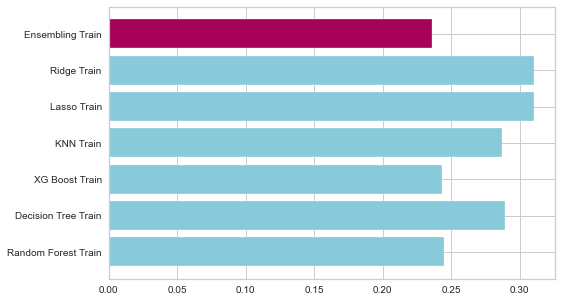

In [375]:
#plot a horizontal bar plot for the metrics of different regressor
plt.figure(figsize=(8,5))
min_RMSE_index= results_train.RMSE.argmin()
plt.barh(results_train.Model, results_train.RMSE, color='c')
plt.barh(results_train.Model[min_RMSE_index], results_train.RMSE[min_RMSE_index], color='m')
plt.show()

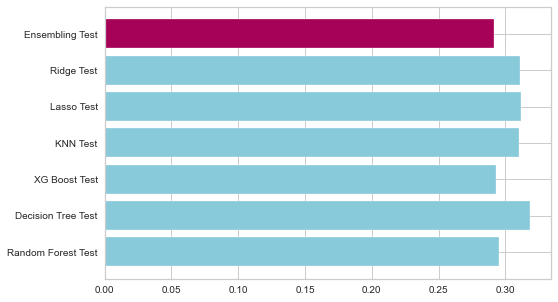

In [376]:
#plot a horizontal bar plot for the metrics of different regressor
plt.figure(figsize=(8,5))
min_RMSE_index= results_test.RMSE.argmin()
plt.barh(results_test.Model, results_test.RMSE, color='c')
plt.barh(results_test.Model[min_RMSE_index], results_test.RMSE[min_RMSE_index], color='m')
plt.show()

### According to the Mean Absolute Error (MAE), Ensemble model is the best performing model.

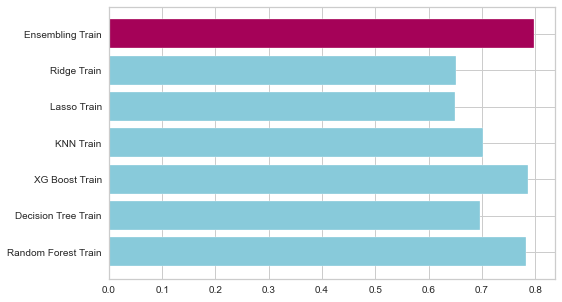

In [377]:
#plot a horizontal bar plot for the metrics of different regressor
plt.figure(figsize=(8,5))
max_Adjusted_r_2_index= results_train.Adjusted_r_2.argmax()
plt.barh(results_train.Model, results_train.Adjusted_r_2, color='c')
plt.barh(results_train.Model[max_Adjusted_r_2_index], results_train.Adjusted_r_2[max_Adjusted_r_2_index], color='m')
plt.show()

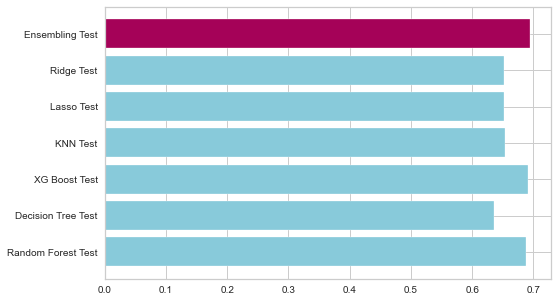

In [378]:
#plot a horizontal bar plot for the metrics of different regressor
plt.figure(figsize=(8,5))
max_Adjusted_r_2_index= results_test.Adjusted_r_2.argmax()
plt.barh(results_test.Model, results_test.Adjusted_r_2, color='c')
plt.barh(results_test.Model[max_Adjusted_r_2_index], results_test.Adjusted_r_2[max_Adjusted_r_2_index], color='m')
plt.show()

### According to the r2_score, Ensemble  model is the best performing model.

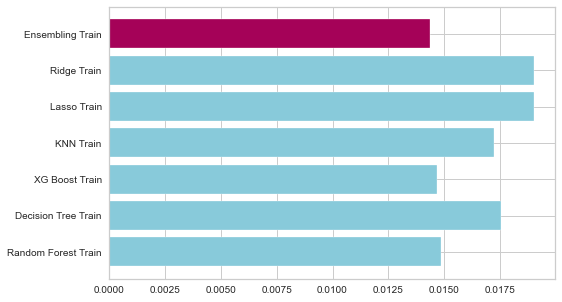

In [379]:
#plot a horizontal bar plot for the metrics of different regressor
plt.figure(figsize=(8,5))
min_MAPE_index= results_train.MAPE.argmin()
plt.barh(results_train.Model, results_train.MAPE, color='c')
plt.barh(results_train.Model[min_MAPE_index], results_train.MAPE[min_MAPE_index], color='m')
plt.show()

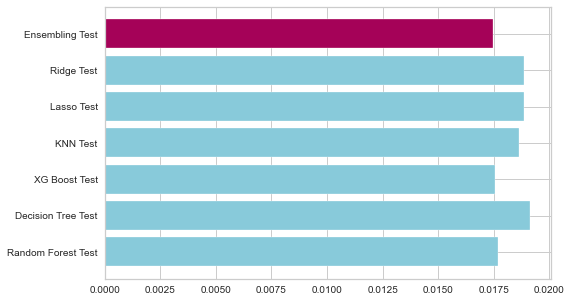

In [380]:
#plot a horizontal bar plot for the metrics of different regressor
plt.figure(figsize=(8,5))
min_MAPE_index= results_test.MAPE.argmin()
plt.barh(results_test.Model, results_test.MAPE, color='c')
plt.barh(results_test.Model[min_MAPE_index], results_test.MAPE[min_MAPE_index], color='m')
plt.show()

### According to the Mean absolute percentage error (MAPE), Ensemble model is the best performing model. All of the mertics suggest that Ensemble model  is the better performing model for this dataset.